##### Copyright 2021 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Generate music with an RNN

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/audio/music_generation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/audio/music_generation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial shows you how to generate musical notes using a simple recurrent neural network (RNN). You will train a model using a collection of piano MIDI files from the [MAESTRO dataset](https://magenta.tensorflow.org/datasets/maestro). Given a sequence of notes, your model will learn to predict the next note in the sequence. You can generate longer sequences of notes by calling the model repeatedly.

This tutorial contains complete code to parse and create MIDI files. You can learn more about how RNNs work by visiting the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial.

## Setup

This tutorial uses the [`pretty_midi`](https://github.com/craffel/pretty-midi) library to create and parse MIDI files, and [`pyfluidsynth`](https://github.com/nwhitehead/pyfluidsynth) for generating audio playback in Colab.

In [2]:
!sudo apt install -y fluidsynth

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fluid-soundfont-gm libdouble-conversion3 libfluidsynth2 libinstpatch-1.0-2
  libpcre2-16-0 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5
  libqt5widgets5 libsdl2-2.0-0 qsynth qt5-gtk-platformtheme
  qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity qt5-image-formats-plugins qtwayland5 jackd
  musescore


The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libdouble-conversion3 libfluidsynth2
  libinstpatch-1.0-2 libpcre2-16-0 libqt5core5a libqt5dbus5 libqt5gui5


  libqt5network5 libqt5svg5 libqt5widgets5 libsdl2-2.0-0 qsynth
  qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont


0 upgraded, 17 newly installed, 0 to remove and 75 not upgraded.
Need to get 136 MB of archives.
After this operation, 202 MB of additional disk space will be used.


0% [Working]

Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libdouble-conversion3 amd64 3.1.5-4ubuntu1 [37.9 kB]
Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libpcre2-16-0 amd64 10.34-7ubuntu0.1 [181 kB]
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5core5a amd64 5.12.8+dfsg-0ubuntu2.1 [2006 kB]
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5dbus5 amd64 5.12.8+dfsg-0ubuntu2.1 [208 kB]
Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5network5 amd64 5.12.8+dfsg-0ubuntu2.1 [673 kB]
Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5gui5 amd64 5.12.8+dfsg-0ubuntu2.1 [2971 kB]
8% [6 libqt5gui5 36.3 kB/2971 kB 1%]

Get:7 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5widgets5 amd64 5.12.8+dfsg-0ubuntu2.1 [2295 kB]
Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libqt5svg5 amd64 5.12.8-0ubuntu1 [131 kB]
14% [Waiting for headers]

Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
14% [9 fluid-soundfont-gm 12.2 kB/119 MB 0%]

17% [9 fluid-soundfont-gm 4964 kB/119 MB 4%]

28% [9 fluid-soundfont-gm 22.7 MB/119 MB 19%]

41% [9 fluid-soundfont-gm 45.2 MB/119 MB 38%]

56% [9 fluid-soundfont-gm 70.3 MB/119 MB 59%]

70% [9 fluid-soundfont-gm 94.5 MB/119 MB 79%]

84% [9 fluid-soundfont-gm 119 MB/119 MB 100%]

Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]
Get:12 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5420 kB]
89% [12 timgm6mb-soundfont 31.2 kB/5420 kB 1%]

93% [Waiting for headers]

Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [198 kB]
94% [Waiting for headers]

Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 fluidsynth amd64 2.1.1-2 [25.6 kB]
95% [Waiting for headers]

Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 qsynth amd64 0.6.1-1build1 [245 kB]
95% [15 qsynth 2414 B/245 kB 1%]

Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 qt5-gtk-platformtheme amd64 5.12.8+dfsg-0ubuntu2.1 [124 kB]
98% [Waiting for headers]

Get:17 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 qttranslations5-l10n all 5.12.8-0ubuntu1 [1486 kB]
Fetched 136 MB in 4s (32.9 MB/s)



78Selecting previously unselected package libdouble-conversion3:amd64.


(Reading database ... 141618 files and directories currently installed.)
Preparing to unpack .../00-libdouble-conversion3_3.1.5-4ubuntu1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  1%] [..........................................................] 8Unpacking libdouble-conversion3:amd64 (3.1.5-4ubuntu1) ...
7Progress: [  3%] [#.........................................................] 8

Selecting previously unselected package libpcre2-16-0:amd64.
Preparing to unpack .../01-libpcre2-16-0_10.34-7ubuntu0.1_amd64.deb ...
7Progress: [  4%] [##........................................................] 8Unpacking libpcre2-16-0:amd64 (10.34-7ubuntu0.1) ...


7Progress: [  6%] [###.......................................................] 8

Selecting previously unselected package libqt5core5a:amd64.
Preparing to unpack .../02-libqt5core5a_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [  7%] [####......................................................] 8Unpacking libqt5core5a:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [  9%] [#####.....................................................] 8Selecting previously unselected package libqt5dbus5:amd64.


Preparing to unpack .../03-libqt5dbus5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 10%] [#####.....................................................] 8Unpacking libqt5dbus5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 12%] [######....................................................] 8

Selecting previously unselected package libqt5network5:amd64.
Preparing to unpack .../04-libqt5network5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 13%] [#######...................................................] 8Unpacking libqt5network5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 14%] [########..................................................] 8

Selecting previously unselected package libqt5gui5:amd64.
Preparing to unpack .../05-libqt5gui5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 16%] [#########.................................................] 8Unpacking libqt5gui5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 17%] [##########................................................] 8

Selecting previously unselected package libqt5widgets5:amd64.
Preparing to unpack .../06-libqt5widgets5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 19%] [##########................................................] 8Unpacking libqt5widgets5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 20%] [###########...............................................] 8Selecting previously unselected package libqt5svg5:amd64.
Preparing to unpack .../07-libqt5svg5_5.12.8-0ubuntu1_amd64.deb ...
7Progress: [ 22%] [############..............................................] 8Unpacking libqt5svg5:amd64 (5.12.8-0ubuntu1) ...


7Progress: [ 23%] [#############.............................................] 8Selecting previously unselected package fluid-soundfont-gm.


Preparing to unpack .../08-fluid-soundfont-gm_3.1-5.1_all.deb ...
7Progress: [ 25%] [##############............................................] 8Unpacking fluid-soundfont-gm (3.1-5.1) ...


7Progress: [ 26%] [###############...........................................] 8

Selecting previously unselected package libinstpatch-1.0-2:amd64.
Preparing to unpack .../09-libinstpatch-1.0-2_1.1.2-2build1_amd64.deb ...
7Progress: [ 28%] [###############...........................................] 8Unpacking libinstpatch-1.0-2:amd64 (1.1.2-2build1) ...


7Progress: [ 29%] [################..........................................] 8Selecting previously unselected package libsdl2-2.0-0:amd64.


Preparing to unpack .../10-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...
7Progress: [ 30%] [#################.........................................] 8Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


7Progress: [ 32%] [##################........................................] 8Selecting previously unselected package timgm6mb-soundfont.


Preparing to unpack .../11-timgm6mb-soundfont_1.3-3_all.deb ...
7Progress: [ 33%] [###################.......................................] 8Unpacking timgm6mb-soundfont (1.3-3) ...


7Progress: [ 35%] [####################......................................] 8Selecting previously unselected package libfluidsynth2:amd64.
Preparing to unpack .../12-libfluidsynth2_2.1.1-2_amd64.deb ...
7Progress: [ 36%] [#####################.....................................] 8

Unpacking libfluidsynth2:amd64 (2.1.1-2) ...
7Progress: [ 38%] [#####################.....................................] 8

Selecting previously unselected package fluidsynth.
Preparing to unpack .../13-fluidsynth_2.1.1-2_amd64.deb ...
7Progress: [ 39%] [######################....................................] 8Unpacking fluidsynth (2.1.1-2) ...


7Progress: [ 41%] [#######################...................................] 8Selecting previously unselected package qsynth.
Preparing to unpack .../14-qsynth_0.6.1-1build1_amd64.deb ...
7Progress: [ 42%] [########################..................................] 8Unpacking qsynth (0.6.1-1build1) ...


7Progress: [ 43%] [#########################.................................] 8

Selecting previously unselected package qt5-gtk-platformtheme:amd64.
Preparing to unpack .../15-qt5-gtk-platformtheme_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
7Progress: [ 45%] [##########################................................] 8Unpacking qt5-gtk-platformtheme:amd64 (5.12.8+dfsg-0ubuntu2.1) ...


7Progress: [ 46%] [##########################................................] 8Selecting previously unselected package qttranslations5-l10n.
Preparing to unpack .../16-qttranslations5-l10n_5.12.8-0ubuntu1_all.deb ...
7Progress: [ 48%] [###########################...............................] 8Unpacking qttranslations5-l10n (5.12.8-0ubuntu1) ...


7Progress: [ 49%] [############################..............................] 8

Setting up libdouble-conversion3:amd64 (3.1.5-4ubuntu1) ...
7Progress: [ 51%] [#############################.............................] 87Progress: [ 52%] [##############################............................] 8Setting up libpcre2-16-0:amd64 (10.34-7ubuntu0.1) ...
7Progress: [ 54%] [###############################...........................] 87Progress: [ 55%] [###############################...........................] 8

Setting up qttranslations5-l10n (5.12.8-0ubuntu1) ...
7Progress: [ 57%] [################################..........................] 87Progress: [ 58%] [#################################.........................] 8Setting up libqt5core5a:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 59%] [##################################........................] 87Progress: [ 61%] [###################################.......................] 8Setting up libqt5dbus5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 62%] [####################################......................] 87Progress: [ 64%] [####################################......................] 8Setting up fluid-soundfont-gm (3.1-5.1) ...
7Progress: [ 65%] [#####################################.....................] 87Progress: [ 67%] [######################################....................] 8Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
7Progress: [ 68%] [#######################################..................

7Progress: [ 71%] [#########################################.................] 8

update-alternatives: using /usr/share/sounds/sf2/TimGM6mb.sf2 to provide /usr/share/sounds/sf2/default-GM.sf2 (default-GM.sf2) in auto mode
update-alternatives: using /usr/share/sounds/sf2/TimGM6mb.sf2 to provide /usr/share/sounds/sf3/default-GM.sf3 (default-GM.sf3) in auto mode
7Progress: [ 72%] [##########################################................] 8Setting up libinstpatch-1.0-2:amd64 (1.1.2-2build1) ...
7Progress: [ 74%] [##########################################................] 87Progress: [ 75%] [###########################################...............] 8Setting up libqt5network5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 77%] [############################################..............] 87Progress: [ 78%] [#############################################.............] 8Setting up libfluidsynth2:amd64 (2.1.1-2) ...
7Progress: [ 80%] [##############################################............] 87Progress: [ 81%] [#############################################

7Progress: [ 84%] [################################################..........] 8Setting up libqt5widgets5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 86%] [#################################################.........] 87Progress: [ 87%] [##################################################........] 8Setting up qt5-gtk-platformtheme:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
7Progress: [ 88%] [###################################################.......] 87Progress: [ 90%] [####################################################......] 8Setting up fluidsynth (2.1.1-2) ...
7Progress: [ 91%] [####################################################......] 8

Created symlink /etc/systemd/user/multi-user.target.wants/fluidsynth.service → /usr/lib/systemd/user/fluidsynth.service.
7Progress: [ 93%] [#####################################################.....] 8Setting up libqt5svg5:amd64 (5.12.8-0ubuntu1) ...
7Progress: [ 94%] [######################################################....] 87Progress: [ 96%] [#######################################################...] 8Setting up qsynth (0.6.1-1build1) ...
7Progress: [ 97%] [########################################################..] 87Progress: [ 99%] [#########################################################.] 8Processing triggers for desktop-file-utils (0.24-1ubuntu3) ...


Processing triggers for mime-support (3.64ubuntu1) ...
Processing triggers for hicolor-icon-theme (0.17-2) ...


Processing triggers for gnome-menus (3.36.0-1ubuntu1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Processing triggers for man-db (2.9.1-1) ...



78

In [3]:
!pip install --upgrade pyfluidsynth

In [4]:
!pip install pretty_midi

  Preparing metadata (setup.py) ... -

 done


  Obtaining dependency information for mido>=1.1.16 from https://files.pythonhosted.org/packages/b0/0e/b551e09391220208764c00ed2b382e198414329d8b6037eeb54a8008d737/mido-1.3.0-py3-none-any.whl.metadata


 \

 |

 done


  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592285 sha256=07c787084fe332dccda662528a1db3be99752f34f510d49d730b5b6d1a03543b
  Stored in directory: /home/kbuilder/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f
Successfully built pretty_midi


In [5]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

2023-09-08 01:25:32.739509: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-08 01:25:32.739560: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-08 01:25:32.739600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

## Download the Maestro dataset

In [7]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

    8192/59243107 [..............................] - ETA: 0s

 4202496/59243107 [=>............................] - ETA: 1s

16138240/59243107 [=======>......................] - ETA: 0s

19152896/59243107 [========>.....................] - ETA: 0s

28139520/59243107 [=============>................] - ETA: 0s

33562624/59243107 [===============>..............] - ETA: 0s

44621824/59243107 [=====================>........] - ETA: 0s

55762944/59243107 [===========================>..] - ETA: 0s

59243107/59243107 [==============================] - 0s 0us/step


The dataset contains about 1,200 MIDI files.

In [8]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1282


## Process a MIDI file

First, use ```pretty_midi``` to parse a single MIDI file and inspect the format of the notes. If you would like to download the MIDI file below to play on your computer, you can do so in colab by writing ```files.download(sample_file)```.


In [9]:
sample_file = filenames[1]
print(sample_file)

data/maestro-v2.0.0/2008/MIDI-Unprocessed_07_R1_2008_01-04_ORIG_MID--AUDIO_07_R1_2008_wav--2.midi


Generate a `PrettyMIDI` object for the sample MIDI file.

In [10]:
pm = pretty_midi.PrettyMIDI(sample_file)

Play the sample file. The playback widget may take several seconds to load.

In [11]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [12]:
display_audio(pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


Do some inspection on the MIDI file. What kinds of instruments are used?

In [13]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


## Extract notes

In [14]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=52, note_name=E3, duration=0.0547
1: pitch=55, note_name=G3, duration=0.0560
2: pitch=40, note_name=E2, duration=0.0599
3: pitch=59, note_name=B3, duration=0.0612
4: pitch=67, note_name=G4, duration=0.0703
5: pitch=64, note_name=E4, duration=0.0690
6: pitch=67, note_name=G4, duration=0.3385
7: pitch=64, note_name=E4, duration=0.3841
8: pitch=52, note_name=E3, duration=0.4232
9: pitch=55, note_name=G3, duration=0.4232


You will use three variables to represent a note when training the model: `pitch`, `step` and `duration`. The pitch is the perceptual quality of the sound as a MIDI note number. 
The `step` is the time elapsed from the previous note or start of the track.
The `duration` is how long the note will be playing in seconds and is the difference between the note end and note start times. 


Extract the notes from the sample MIDI file.

In [15]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [16]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch     start       end      step  duration
0     55  1.066406  1.122396  0.000000  0.055990
1     67  1.066406  1.136719  0.000000  0.070312
2     52  1.067708  1.122396  0.001302  0.054688
3     64  1.072917  1.141927  0.005208  0.069010
4     59  1.075521  1.136719  0.002604  0.061198

It may be easier to interpret the note names rather than the pitches, so you can use the function below to convert from the numeric pitch values to note names. 
The note name shows the type of note, accidental and octave number
(e.g. C#4). 

In [17]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['G3', 'G4', 'E3', 'E4', 'B3', 'E2', 'G4', 'E3', 'G3', 'E4'],
      dtype='<U3')

To visualize the musical piece, plot the note pitch, start and end across the length of the track (i.e. piano roll). Start with the first 100 notes

In [18]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

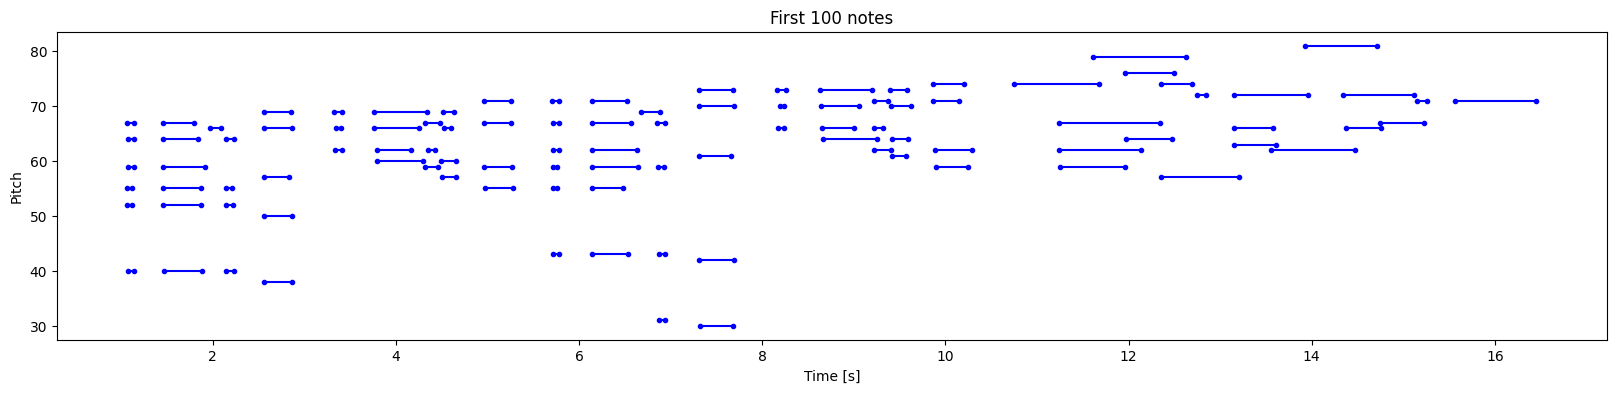

In [19]:
plot_piano_roll(raw_notes, count=100)

Plot the notes for the entire track.

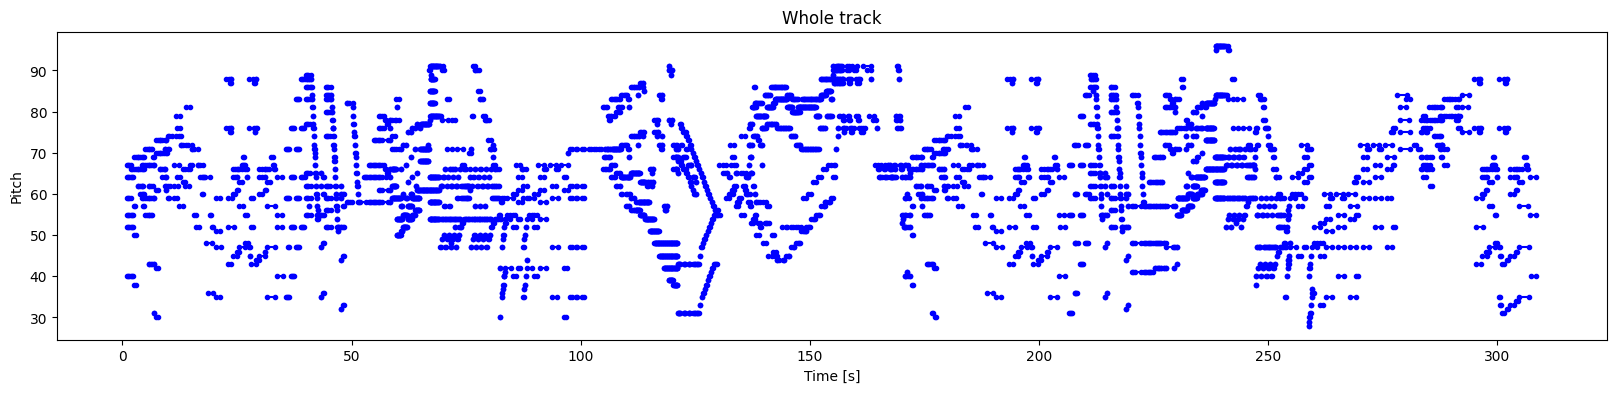

In [20]:
plot_piano_roll(raw_notes)

Check the distribution of each note variable.

In [21]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))
  
  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

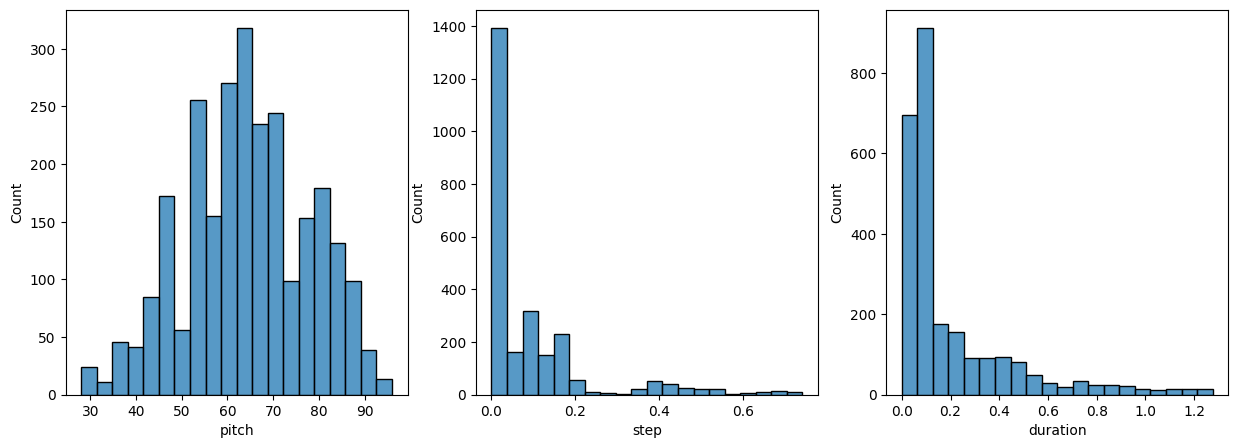

In [22]:
plot_distributions(raw_notes)

## Create a MIDI file

You can generate your own MIDI file from a list of notes using the function below.

In [23]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [24]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

Play the generated MIDI file and see if there is any difference.

In [25]:
display_audio(example_pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


As before, you can write ```files.download(example_file)``` to download and play this file.

## Create the training dataset


Create the training dataset by extracting notes from the MIDI files. You can start by using a small number of files, and experiment later with more. This may take a couple minutes.

In [26]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

In [27]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 22603


Next, create a `tf.data.Dataset` from the parsed notes.

In [28]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [29]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

You will train the model on batches of sequences of notes. Each example will consist of a sequence of notes as the input features, and the next note as the label. In this way, the model will be trained to predict the next note in a sequence. You can find a diagram describing this process (and more details) in [Text classification with an RNN](https://www.tensorflow.org/text/tutorials/text_generation).

You can use the handy [window](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#window) function with size `seq_length` to create the features and labels in this format.

In [30]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)
  
  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

Set the sequence length for each example. Experiment with different lengths (e.g. 50, 100, 150) to see which one works best for the data, or use [hyperparameter tuning](https://www.tensorflow.org/tutorials/keras/keras_tuner). The size of the vocabulary (`vocab_size`) is set to 128 representing all the pitches supported by `pretty_midi`.

In [31]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

The shape of the dataset is ```(100,1)```, meaning that the model will take 100 notes as input, and learn to predict the following note as output.

In [32]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[5.46875000e-01 0.00000000e+00 1.87760417e+00]
 [3.28125000e-01 3.77604167e-02 1.97135417e+00]
 [3.82812500e-01 1.30208333e-03 1.96484375e+00]
 [4.53125000e-01 4.96093750e-01 3.17708333e-01]
 [4.76562500e-01 2.68229167e-01 1.54947917e-01]
 [5.15625000e-01 2.29166667e-01 2.60416667e-01]
 [4.76562500e-01 1.40625000e-01 8.46354167e-02]
 [4.53125000e-01 1.71875000e-01 5.33854167e-02]
 [4.76562500e-01 1.28906250e-01 6.51041667e-02]
 [4.53125000e-01 1.32812500e-01 1.17187500e-01]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=58.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.08463541666666696>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.27864583333333304>}


Batch the examples, and configure the dataset for performance.

In [33]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [34]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

## Create and train the model

The model will have three outputs, one for each note variable. For `step` and `duration`, you will use a custom loss function based on mean squared error that encourages the model to output non-negative values.

In [35]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [36]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            


 lstm (LSTM)                 (None, 128)                  67584     ['input_1[0][0]']             


 duration (Dense)            (None, 1)                    129       ['lstm[0][0]']                


 pitch (Dense)               (None, 128)                  16512     ['lstm[0][0]']                


 step (Dense)                (None, 1)                    129       ['lstm[0][0]']                


Total params: 84354 (329.51 KB)


Trainable params: 84354 (329.51 KB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


Testing the `model.evaluate` function, you can see that the `pitch` loss is significantly greater than the `step` and `duration` losses. 
Note that `loss` is the total loss computed by summing all the other losses and is currently dominated by the `pitch` loss.

In [37]:
losses = model.evaluate(train_ds, return_dict=True)
losses

      1/Unknown - 4s 4s/step - loss: 5.6942 - duration_loss: 0.5112 - pitch_loss: 4.8644 - step_loss: 0.3185

     17/Unknown - 4s 3ms/step - loss: 5.3798 - duration_loss: 0.1668 - pitch_loss: 4.8559 - step_loss: 0.3571

     33/Unknown - 4s 3ms/step - loss: 5.3441 - duration_loss: 0.1407 - pitch_loss: 4.8564 - step_loss: 0.3471

     50/Unknown - 4s 3ms/step - loss: 5.3343 - duration_loss: 0.1326 - pitch_loss: 4.8570 - step_loss: 0.3447

     66/Unknown - 4s 3ms/step - loss: 5.3353 - duration_loss: 0.1364 - pitch_loss: 4.8565 - step_loss: 0.3424

     83/Unknown - 4s 3ms/step - loss: 5.3319 - duration_loss: 0.1330 - pitch_loss: 4.8564 - step_loss: 0.3425

    100/Unknown - 5s 3ms/step - loss: 5.3272 - duration_loss: 0.1280 - pitch_loss: 4.8565 - step_loss: 0.3427

    118/Unknown - 5s 3ms/step - loss: 5.3292 - duration_loss: 0.1294 - pitch_loss: 4.8566 - step_loss: 0.3433

    135/Unknown - 5s 3ms/step - loss: 5.3278 - duration_loss: 0.1284 - pitch_loss: 4.8565 - step_loss: 0.3428

    152/Unknown - 5s 3ms/step - loss: 5.3286 - duration_loss: 0.1281 - pitch_loss: 4.8561 - step_loss: 0.3444

    169/Unknown - 5s 3ms/step - loss: 5.3240 - duration_loss: 0.1244 - pitch_loss: 4.8560 - step_loss: 0.3436

    186/Unknown - 5s 3ms/step - loss: 5.3221 - duration_loss: 0.1229 - pitch_loss: 4.8560 - step_loss: 0.3431

    204/Unknown - 5s 3ms/step - loss: 5.3236 - duration_loss: 0.1238 - pitch_loss: 4.8560 - step_loss: 0.3437

    221/Unknown - 5s 3ms/step - loss: 5.3207 - duration_loss: 0.1220 - pitch_loss: 4.8561 - step_loss: 0.3427

    238/Unknown - 5s 3ms/step - loss: 5.3186 - duration_loss: 0.1193 - pitch_loss: 4.8559 - step_loss: 0.3434

    255/Unknown - 5s 3ms/step - loss: 5.3164 - duration_loss: 0.1177 - pitch_loss: 4.8559 - step_loss: 0.3428

    272/Unknown - 5s 3ms/step - loss: 5.3169 - duration_loss: 0.1178 - pitch_loss: 4.8557 - step_loss: 0.3434

    289/Unknown - 5s 3ms/step - loss: 5.3167 - duration_loss: 0.1184 - pitch_loss: 4.8558 - step_loss: 0.3426

    306/Unknown - 5s 3ms/step - loss: 5.3168 - duration_loss: 0.1185 - pitch_loss: 4.8557 - step_loss: 0.3425

    323/Unknown - 5s 3ms/step - loss: 5.3161 - duration_loss: 0.1182 - pitch_loss: 4.8557 - step_loss: 0.3422

    340/Unknown - 5s 3ms/step - loss: 5.3176 - duration_loss: 0.1200 - pitch_loss: 4.8556 - step_loss: 0.3420

352/352 [==============================] - 5s 3ms/step - loss: 5.3164 - duration_loss: 0.1190 - pitch_loss: 4.8557 - step_loss: 0.3416


{'loss': 5.31635856628418,
 'duration_loss': 0.11900725960731506,
 'pitch_loss': 4.855710506439209,
 'step_loss': 0.3416409194469452}

One way balance this is to use the `loss_weights` argument to compile:

In [38]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

The `loss` then becomes the weighted sum of the individual losses.

In [39]:
model.evaluate(train_ds, return_dict=True)

      1/Unknown - 1s 851ms/step - loss: 1.0729 - duration_loss: 0.5112 - pitch_loss: 4.8644 - step_loss: 0.3185

     17/Unknown - 1s 3ms/step - loss: 0.7666 - duration_loss: 0.1668 - pitch_loss: 4.8559 - step_loss: 0.3571  

     33/Unknown - 1s 3ms/step - loss: 0.7306 - duration_loss: 0.1407 - pitch_loss: 4.8564 - step_loss: 0.3471

     49/Unknown - 1s 3ms/step - loss: 0.7220 - duration_loss: 0.1339 - pitch_loss: 4.8569 - step_loss: 0.3452

     66/Unknown - 1s 3ms/step - loss: 0.7216 - duration_loss: 0.1364 - pitch_loss: 4.8565 - step_loss: 0.3424

     83/Unknown - 1s 3ms/step - loss: 0.7183 - duration_loss: 0.1330 - pitch_loss: 4.8564 - step_loss: 0.3425

    100/Unknown - 1s 3ms/step - loss: 0.7135 - duration_loss: 0.1280 - pitch_loss: 4.8565 - step_loss: 0.3427

    117/Unknown - 1s 3ms/step - loss: 0.7128 - duration_loss: 0.1269 - pitch_loss: 4.8566 - step_loss: 0.3430

    134/Unknown - 1s 3ms/step - loss: 0.7134 - duration_loss: 0.1276 - pitch_loss: 4.8565 - step_loss: 0.3429

    152/Unknown - 1s 3ms/step - loss: 0.7153 - duration_loss: 0.1281 - pitch_loss: 4.8561 - step_loss: 0.3444

    169/Unknown - 1s 3ms/step - loss: 0.7108 - duration_loss: 0.1244 - pitch_loss: 4.8560 - step_loss: 0.3436

    186/Unknown - 1s 3ms/step - loss: 0.7088 - duration_loss: 0.1229 - pitch_loss: 4.8560 - step_loss: 0.3431

    203/Unknown - 1s 3ms/step - loss: 0.7086 - duration_loss: 0.1223 - pitch_loss: 4.8560 - step_loss: 0.3436

    220/Unknown - 2s 3ms/step - loss: 0.7079 - duration_loss: 0.1224 - pitch_loss: 4.8561 - step_loss: 0.3427

    236/Unknown - 2s 3ms/step - loss: 0.7062 - duration_loss: 0.1198 - pitch_loss: 4.8559 - step_loss: 0.3436

    252/Unknown - 2s 3ms/step - loss: 0.7040 - duration_loss: 0.1180 - pitch_loss: 4.8559 - step_loss: 0.3433

    268/Unknown - 2s 3ms/step - loss: 0.7038 - duration_loss: 0.1176 - pitch_loss: 4.8557 - step_loss: 0.3435

    284/Unknown - 2s 3ms/step - loss: 0.7031 - duration_loss: 0.1177 - pitch_loss: 4.8557 - step_loss: 0.3426

    300/Unknown - 2s 3ms/step - loss: 0.7032 - duration_loss: 0.1180 - pitch_loss: 4.8558 - step_loss: 0.3424

    317/Unknown - 2s 3ms/step - loss: 0.7034 - duration_loss: 0.1180 - pitch_loss: 4.8557 - step_loss: 0.3426

    334/Unknown - 2s 3ms/step - loss: 0.7042 - duration_loss: 0.1194 - pitch_loss: 4.8556 - step_loss: 0.3421

    350/Unknown - 2s 3ms/step - loss: 0.7034 - duration_loss: 0.1190 - pitch_loss: 4.8557 - step_loss: 0.3417

352/352 [==============================] - 2s 3ms/step - loss: 0.7034 - duration_loss: 0.1190 - pitch_loss: 4.8557 - step_loss: 0.3416


{'loss': 0.7034333944320679,
 'duration_loss': 0.11900725960731506,
 'pitch_loss': 4.855710506439209,
 'step_loss': 0.3416409194469452}

Train the model.

In [40]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [41]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50


      1/Unknown - 3s 3s/step - loss: 1.0729 - duration_loss: 0.5112 - pitch_loss: 4.8644 - step_loss: 0.3185

     11/Unknown - 3s 5ms/step - loss: 0.4837 - duration_loss: 0.1416 - pitch_loss: 4.8048 - step_loss: 0.1018

     21/Unknown - 3s 5ms/step - loss: 0.4295 - duration_loss: 0.1207 - pitch_loss: 4.7612 - step_loss: 0.0707

     30/Unknown - 3s 5ms/step - loss: 0.3902 - duration_loss: 0.0984 - pitch_loss: 4.7265 - step_loss: 0.0555

     41/Unknown - 4s 5ms/step - loss: 0.3686 - duration_loss: 0.0884 - pitch_loss: 4.6872 - step_loss: 0.0458

     52/Unknown - 4s 5ms/step - loss: 0.3572 - duration_loss: 0.0867 - pitch_loss: 4.6401 - step_loss: 0.0385

     62/Unknown - 4s 5ms/step - loss: 0.3531 - duration_loss: 0.0875 - pitch_loss: 4.5954 - step_loss: 0.0359

     72/Unknown - 4s 5ms/step - loss: 0.3439 - duration_loss: 0.0828 - pitch_loss: 4.5509 - step_loss: 0.0336

     83/Unknown - 4s 5ms/step - loss: 0.3395 - duration_loss: 0.0833 - pitch_loss: 4.5023 - step_loss: 0.0311

     94/Unknown - 4s 5ms/step - loss: 0.3345 - duration_loss: 0.0817 - pitch_loss: 4.4511 - step_loss: 0.0302

    105/Unknown - 4s 5ms/step - loss: 0.3298 - duration_loss: 0.0803 - pitch_loss: 4.4062 - step_loss: 0.0292

    116/Unknown - 4s 5ms/step - loss: 0.3265 - duration_loss: 0.0792 - pitch_loss: 4.3731 - step_loss: 0.0286

    127/Unknown - 4s 5ms/step - loss: 0.3240 - duration_loss: 0.0780 - pitch_loss: 4.3618 - step_loss: 0.0279

    138/Unknown - 4s 5ms/step - loss: 0.3224 - duration_loss: 0.0776 - pitch_loss: 4.3535 - step_loss: 0.0271

    149/Unknown - 4s 5ms/step - loss: 0.3201 - duration_loss: 0.0763 - pitch_loss: 4.3429 - step_loss: 0.0267

    160/Unknown - 4s 5ms/step - loss: 0.3154 - duration_loss: 0.0735 - pitch_loss: 4.3281 - step_loss: 0.0256

    171/Unknown - 4s 5ms/step - loss: 0.3129 - duration_loss: 0.0721 - pitch_loss: 4.3132 - step_loss: 0.0252

    182/Unknown - 4s 5ms/step - loss: 0.3104 - duration_loss: 0.0711 - pitch_loss: 4.2991 - step_loss: 0.0243

    192/Unknown - 4s 5ms/step - loss: 0.3084 - duration_loss: 0.0701 - pitch_loss: 4.2872 - step_loss: 0.0240

    203/Unknown - 4s 5ms/step - loss: 0.3066 - duration_loss: 0.0694 - pitch_loss: 4.2746 - step_loss: 0.0235

    214/Unknown - 4s 5ms/step - loss: 0.3061 - duration_loss: 0.0700 - pitch_loss: 4.2600 - step_loss: 0.0231

    225/Unknown - 4s 5ms/step - loss: 0.3038 - duration_loss: 0.0690 - pitch_loss: 4.2486 - step_loss: 0.0224

    236/Unknown - 4s 5ms/step - loss: 0.3029 - duration_loss: 0.0678 - pitch_loss: 4.2389 - step_loss: 0.0231

    247/Unknown - 5s 5ms/step - loss: 0.3012 - duration_loss: 0.0671 - pitch_loss: 4.2271 - step_loss: 0.0227

    258/Unknown - 5s 5ms/step - loss: 0.2997 - duration_loss: 0.0665 - pitch_loss: 4.2178 - step_loss: 0.0224

    269/Unknown - 5s 5ms/step - loss: 0.3002 - duration_loss: 0.0669 - pitch_loss: 4.2092 - step_loss: 0.0229

    279/Unknown - 5s 5ms/step - loss: 0.2999 - duration_loss: 0.0672 - pitch_loss: 4.2023 - step_loss: 0.0226

    289/Unknown - 5s 5ms/step - loss: 0.2996 - duration_loss: 0.0676 - pitch_loss: 4.1953 - step_loss: 0.0222

    300/Unknown - 5s 5ms/step - loss: 0.2989 - duration_loss: 0.0674 - pitch_loss: 4.1888 - step_loss: 0.0220

    310/Unknown - 5s 5ms/step - loss: 0.2989 - duration_loss: 0.0679 - pitch_loss: 4.1825 - step_loss: 0.0219

    321/Unknown - 5s 5ms/step - loss: 0.2983 - duration_loss: 0.0676 - pitch_loss: 4.1762 - step_loss: 0.0219

    332/Unknown - 5s 5ms/step - loss: 0.2969 - duration_loss: 0.0668 - pitch_loss: 4.1709 - step_loss: 0.0216

    342/Unknown - 5s 5ms/step - loss: 0.2963 - duration_loss: 0.0667 - pitch_loss: 4.1653 - step_loss: 0.0213

    352/Unknown - 5s 5ms/step - loss: 0.2960 - duration_loss: 0.0670 - pitch_loss: 4.1594 - step_loss: 0.0210

352/352 [==============================] - 5s 5ms/step - loss: 0.2960 - duration_loss: 0.0670 - pitch_loss: 4.1594 - step_loss: 0.0210


Epoch 2/50


  1/352 [..............................] - ETA: 2s - loss: 0.4244 - duration_loss: 0.2032 - pitch_loss: 4.0718 - step_loss: 0.0176

 11/352 [..............................] - ETA: 1s - loss: 0.3144 - duration_loss: 0.0886 - pitch_loss: 4.0706 - step_loss: 0.0222

 21/352 [>.............................] - ETA: 1s - loss: 0.3075 - duration_loss: 0.0831 - pitch_loss: 4.0364 - step_loss: 0.0225

 31/352 [=>............................] - ETA: 1s - loss: 0.2935 - duration_loss: 0.0738 - pitch_loss: 4.0104 - step_loss: 0.0192

 41/352 [==>...........................] - ETA: 1s - loss: 0.2878 - duration_loss: 0.0689 - pitch_loss: 4.0098 - step_loss: 0.0185

 51/352 [===>..........................] - ETA: 1s - loss: 0.2861 - duration_loss: 0.0692 - pitch_loss: 4.0035 - step_loss: 0.0168

 61/352 [====>.........................] - ETA: 1s - loss: 0.2893 - duration_loss: 0.0714 - pitch_loss: 4.0024 - step_loss: 0.0177

 71/352 [=====>........................] - ETA: 1s - loss: 0.2859 - duration_loss: 0.0685 - pitch_loss: 4.0039 - step_loss: 0.0173

 82/352 [=====>........................] - ETA: 1s - loss: 0.2882 - duration_loss: 0.0702 - pitch_loss: 4.0120 - step_loss: 0.0173

 92/352 [======>.......................] - ETA: 1s - loss: 0.2852 - duration_loss: 0.0675 - pitch_loss: 4.0116 - step_loss: 0.0172

101/352 [=======>......................] - ETA: 1s - loss: 0.2848 - duration_loss: 0.0670 - pitch_loss: 4.0049 - step_loss: 0.0175

111/352 [========>.....................] - ETA: 1s - loss: 0.2857 - duration_loss: 0.0679 - pitch_loss: 4.0028 - step_loss: 0.0177

121/352 [=========>....................] - ETA: 1s - loss: 0.2837 - duration_loss: 0.0656 - pitch_loss: 4.0052 - step_loss: 0.0179

131/352 [==========>...................] - ETA: 1s - loss: 0.2832 - duration_loss: 0.0653 - pitch_loss: 4.0061 - step_loss: 0.0175

141/352 [===========>..................] - ETA: 1s - loss: 0.2834 - duration_loss: 0.0656 - pitch_loss: 4.0059 - step_loss: 0.0176

152/352 [===========>..................] - ETA: 1s - loss: 0.2818 - duration_loss: 0.0640 - pitch_loss: 4.0067 - step_loss: 0.0175

163/352 [============>.................] - ETA: 0s - loss: 0.2791 - duration_loss: 0.0618 - pitch_loss: 4.0050 - step_loss: 0.0171

174/352 [=============>................] - ETA: 0s - loss: 0.2792 - duration_loss: 0.0617 - pitch_loss: 4.0075 - step_loss: 0.0171

185/352 [==============>...............] - ETA: 0s - loss: 0.2779 - duration_loss: 0.0607 - pitch_loss: 4.0080 - step_loss: 0.0168

196/352 [===============>..............] - ETA: 0s - loss: 0.2768 - duration_loss: 0.0597 - pitch_loss: 4.0076 - step_loss: 0.0167

207/352 [================>.............] - ETA: 0s - loss: 0.2781 - duration_loss: 0.0608 - pitch_loss: 4.0092 - step_loss: 0.0169

218/352 [=================>............] - ETA: 0s - loss: 0.2779 - duration_loss: 0.0610 - pitch_loss: 4.0058 - step_loss: 0.0166

229/352 [==================>...........] - ETA: 0s - loss: 0.2779 - duration_loss: 0.0602 - pitch_loss: 4.0054 - step_loss: 0.0174

240/352 [===================>..........] - ETA: 0s - loss: 0.2769 - duration_loss: 0.0595 - pitch_loss: 4.0035 - step_loss: 0.0172

251/352 [====================>.........] - ETA: 0s - loss: 0.2763 - duration_loss: 0.0592 - pitch_loss: 4.0017 - step_loss: 0.0171

262/352 [=====================>........] - ETA: 0s - loss: 0.2755 - duration_loss: 0.0585 - pitch_loss: 3.9998 - step_loss: 0.0170

273/352 [======================>.......] - ETA: 0s - loss: 0.2770 - duration_loss: 0.0593 - pitch_loss: 3.9990 - step_loss: 0.0177

284/352 [=======================>......] - ETA: 0s - loss: 0.2769 - duration_loss: 0.0595 - pitch_loss: 3.9983 - step_loss: 0.0175

295/352 [========================>.....] - ETA: 0s - loss: 0.2776 - duration_loss: 0.0604 - pitch_loss: 3.9977 - step_loss: 0.0174

306/352 [=========================>....] - ETA: 0s - loss: 0.2782 - duration_loss: 0.0609 - pitch_loss: 3.9965 - step_loss: 0.0175

317/352 [==========================>...] - ETA: 0s - loss: 0.2780 - duration_loss: 0.0608 - pitch_loss: 3.9948 - step_loss: 0.0175

328/352 [==========================>...] - ETA: 0s - loss: 0.2778 - duration_loss: 0.0606 - pitch_loss: 3.9948 - step_loss: 0.0175

339/352 [===========================>..] - ETA: 0s - loss: 0.2777 - duration_loss: 0.0607 - pitch_loss: 3.9938 - step_loss: 0.0173

350/352 [============================>.] - ETA: 0s - loss: 0.2774 - duration_loss: 0.0607 - pitch_loss: 3.9917 - step_loss: 0.0172

352/352 [==============================] - 2s 5ms/step - loss: 0.2774 - duration_loss: 0.0607 - pitch_loss: 3.9913 - step_loss: 0.0171


Epoch 3/50


  1/352 [..............................] - ETA: 2s - loss: 0.4573 - duration_loss: 0.2293 - pitch_loss: 4.0003 - step_loss: 0.0280

 11/352 [..............................] - ETA: 1s - loss: 0.3138 - duration_loss: 0.0903 - pitch_loss: 4.0369 - step_loss: 0.0216

 22/352 [>.............................] - ETA: 1s - loss: 0.3076 - duration_loss: 0.0850 - pitch_loss: 3.9992 - step_loss: 0.0227

 33/352 [=>............................] - ETA: 1s - loss: 0.2909 - duration_loss: 0.0733 - pitch_loss: 3.9811 - step_loss: 0.0186

 44/352 [==>...........................] - ETA: 1s - loss: 0.2861 - duration_loss: 0.0693 - pitch_loss: 3.9803 - step_loss: 0.0178

 55/352 [===>..........................] - ETA: 1s - loss: 0.2858 - duration_loss: 0.0696 - pitch_loss: 3.9753 - step_loss: 0.0174

 66/352 [====>.........................] - ETA: 1s - loss: 0.2866 - duration_loss: 0.0702 - pitch_loss: 3.9784 - step_loss: 0.0175

 77/352 [=====>........................] - ETA: 1s - loss: 0.2876 - duration_loss: 0.0713 - pitch_loss: 3.9772 - step_loss: 0.0175

 88/352 [======>.......................] - ETA: 1s - loss: 0.2838 - duration_loss: 0.0679 - pitch_loss: 3.9756 - step_loss: 0.0172

 99/352 [=======>......................] - ETA: 1s - loss: 0.2828 - duration_loss: 0.0667 - pitch_loss: 3.9684 - step_loss: 0.0177

110/352 [========>.....................] - ETA: 1s - loss: 0.2830 - duration_loss: 0.0672 - pitch_loss: 3.9656 - step_loss: 0.0176

121/352 [=========>....................] - ETA: 1s - loss: 0.2810 - duration_loss: 0.0648 - pitch_loss: 3.9678 - step_loss: 0.0178

132/352 [==========>...................] - ETA: 1s - loss: 0.2803 - duration_loss: 0.0644 - pitch_loss: 3.9691 - step_loss: 0.0174

143/352 [===========>..................] - ETA: 1s - loss: 0.2804 - duration_loss: 0.0645 - pitch_loss: 3.9688 - step_loss: 0.0174

154/352 [============>.................] - ETA: 0s - loss: 0.2786 - duration_loss: 0.0629 - pitch_loss: 3.9689 - step_loss: 0.0173

165/352 [=============>................] - ETA: 0s - loss: 0.2763 - duration_loss: 0.0610 - pitch_loss: 3.9671 - step_loss: 0.0169

176/352 [==============>...............] - ETA: 0s - loss: 0.2762 - duration_loss: 0.0608 - pitch_loss: 3.9689 - step_loss: 0.0169

187/352 [==============>...............] - ETA: 0s - loss: 0.2750 - duration_loss: 0.0599 - pitch_loss: 3.9686 - step_loss: 0.0166

198/352 [===============>..............] - ETA: 0s - loss: 0.2737 - duration_loss: 0.0587 - pitch_loss: 3.9685 - step_loss: 0.0166

209/352 [================>.............] - ETA: 0s - loss: 0.2747 - duration_loss: 0.0597 - pitch_loss: 3.9684 - step_loss: 0.0167

220/352 [=================>............] - ETA: 0s - loss: 0.2745 - duration_loss: 0.0600 - pitch_loss: 3.9648 - step_loss: 0.0163

231/352 [==================>...........] - ETA: 0s - loss: 0.2745 - duration_loss: 0.0591 - pitch_loss: 3.9641 - step_loss: 0.0172

242/352 [===================>..........] - ETA: 0s - loss: 0.2738 - duration_loss: 0.0587 - pitch_loss: 3.9626 - step_loss: 0.0169

252/352 [====================>.........] - ETA: 0s - loss: 0.2731 - duration_loss: 0.0582 - pitch_loss: 3.9605 - step_loss: 0.0169

263/352 [=====================>........] - ETA: 0s - loss: 0.2726 - duration_loss: 0.0577 - pitch_loss: 3.9598 - step_loss: 0.0168

274/352 [======================>.......] - ETA: 0s - loss: 0.2739 - duration_loss: 0.0583 - pitch_loss: 3.9590 - step_loss: 0.0177

285/352 [=======================>......] - ETA: 0s - loss: 0.2737 - duration_loss: 0.0584 - pitch_loss: 3.9576 - step_loss: 0.0174

296/352 [========================>.....] - ETA: 0s - loss: 0.2747 - duration_loss: 0.0594 - pitch_loss: 3.9573 - step_loss: 0.0174

307/352 [=========================>....] - ETA: 0s - loss: 0.2752 - duration_loss: 0.0600 - pitch_loss: 3.9549 - step_loss: 0.0175

318/352 [==========================>...] - ETA: 0s - loss: 0.2750 - duration_loss: 0.0598 - pitch_loss: 3.9525 - step_loss: 0.0175

329/352 [===========================>..] - ETA: 0s - loss: 0.2746 - duration_loss: 0.0595 - pitch_loss: 3.9520 - step_loss: 0.0175

340/352 [===========================>..] - ETA: 0s - loss: 0.2745 - duration_loss: 0.0596 - pitch_loss: 3.9510 - step_loss: 0.0173

351/352 [============================>.] - ETA: 0s - loss: 0.2742 - duration_loss: 0.0596 - pitch_loss: 3.9484 - step_loss: 0.0171

352/352 [==============================] - 2s 5ms/step - loss: 0.2742 - duration_loss: 0.0597 - pitch_loss: 3.9484 - step_loss: 0.0171


Epoch 4/50


  1/352 [..............................] - ETA: 2s - loss: 0.4382 - duration_loss: 0.2237 - pitch_loss: 3.9130 - step_loss: 0.0188

 12/352 [>.............................] - ETA: 1s - loss: 0.3021 - duration_loss: 0.0831 - pitch_loss: 3.9729 - step_loss: 0.0204

 23/352 [>.............................] - ETA: 1s - loss: 0.2996 - duration_loss: 0.0814 - pitch_loss: 3.9387 - step_loss: 0.0214

 34/352 [=>............................] - ETA: 1s - loss: 0.2874 - duration_loss: 0.0724 - pitch_loss: 3.9297 - step_loss: 0.0185

 45/352 [==>...........................] - ETA: 1s - loss: 0.2823 - duration_loss: 0.0685 - pitch_loss: 3.9332 - step_loss: 0.0172

 56/352 [===>..........................] - ETA: 1s - loss: 0.2855 - duration_loss: 0.0721 - pitch_loss: 3.9302 - step_loss: 0.0168

 67/352 [====>.........................] - ETA: 1s - loss: 0.2833 - duration_loss: 0.0696 - pitch_loss: 3.9364 - step_loss: 0.0169

 77/352 [=====>........................] - ETA: 1s - loss: 0.2844 - duration_loss: 0.0708 - pitch_loss: 3.9325 - step_loss: 0.0170

 88/352 [======>.......................] - ETA: 1s - loss: 0.2807 - duration_loss: 0.0674 - pitch_loss: 3.9321 - step_loss: 0.0167

 99/352 [=======>......................] - ETA: 1s - loss: 0.2796 - duration_loss: 0.0661 - pitch_loss: 3.9252 - step_loss: 0.0173

110/352 [========>.....................] - ETA: 1s - loss: 0.2797 - duration_loss: 0.0664 - pitch_loss: 3.9217 - step_loss: 0.0172

120/352 [=========>....................] - ETA: 1s - loss: 0.2780 - duration_loss: 0.0643 - pitch_loss: 3.9269 - step_loss: 0.0174

130/352 [==========>...................] - ETA: 1s - loss: 0.2768 - duration_loss: 0.0634 - pitch_loss: 3.9278 - step_loss: 0.0170

140/352 [==========>...................] - ETA: 1s - loss: 0.2764 - duration_loss: 0.0630 - pitch_loss: 3.9280 - step_loss: 0.0171

151/352 [===========>..................] - ETA: 0s - loss: 0.2754 - duration_loss: 0.0619 - pitch_loss: 3.9298 - step_loss: 0.0170

162/352 [============>.................] - ETA: 0s - loss: 0.2727 - duration_loss: 0.0598 - pitch_loss: 3.9273 - step_loss: 0.0166

173/352 [=============>................] - ETA: 0s - loss: 0.2722 - duration_loss: 0.0593 - pitch_loss: 3.9261 - step_loss: 0.0165

184/352 [==============>...............] - ETA: 0s - loss: 0.2710 - duration_loss: 0.0586 - pitch_loss: 3.9232 - step_loss: 0.0162

194/352 [===============>..............] - ETA: 0s - loss: 0.2702 - duration_loss: 0.0578 - pitch_loss: 3.9218 - step_loss: 0.0162

204/352 [================>.............] - ETA: 0s - loss: 0.2710 - duration_loss: 0.0584 - pitch_loss: 3.9221 - step_loss: 0.0165

214/352 [=================>............] - ETA: 0s - loss: 0.2707 - duration_loss: 0.0586 - pitch_loss: 3.9190 - step_loss: 0.0162

224/352 [==================>...........] - ETA: 0s - loss: 0.2697 - duration_loss: 0.0581 - pitch_loss: 3.9164 - step_loss: 0.0158

235/352 [===================>..........] - ETA: 0s - loss: 0.2701 - duration_loss: 0.0575 - pitch_loss: 3.9155 - step_loss: 0.0168

245/352 [===================>..........] - ETA: 0s - loss: 0.2695 - duration_loss: 0.0572 - pitch_loss: 3.9119 - step_loss: 0.0167

256/352 [====================>.........] - ETA: 0s - loss: 0.2688 - duration_loss: 0.0569 - pitch_loss: 3.9089 - step_loss: 0.0165

267/352 [=====================>........] - ETA: 0s - loss: 0.2698 - duration_loss: 0.0571 - pitch_loss: 3.9085 - step_loss: 0.0173

278/352 [======================>.......] - ETA: 0s - loss: 0.2702 - duration_loss: 0.0577 - pitch_loss: 3.9078 - step_loss: 0.0171

289/352 [=======================>......] - ETA: 0s - loss: 0.2706 - duration_loss: 0.0583 - pitch_loss: 3.9068 - step_loss: 0.0170

299/352 [========================>.....] - ETA: 0s - loss: 0.2706 - duration_loss: 0.0584 - pitch_loss: 3.9060 - step_loss: 0.0169

310/352 [=========================>....] - ETA: 0s - loss: 0.2710 - duration_loss: 0.0589 - pitch_loss: 3.9035 - step_loss: 0.0169

321/352 [==========================>...] - ETA: 0s - loss: 0.2711 - duration_loss: 0.0589 - pitch_loss: 3.9014 - step_loss: 0.0171

332/352 [===========================>..] - ETA: 0s - loss: 0.2703 - duration_loss: 0.0583 - pitch_loss: 3.9011 - step_loss: 0.0169

343/352 [============================>.] - ETA: 0s - loss: 0.2703 - duration_loss: 0.0585 - pitch_loss: 3.9002 - step_loss: 0.0168

352/352 [==============================] - 2s 5ms/step - loss: 0.2701 - duration_loss: 0.0586 - pitch_loss: 3.8989 - step_loss: 0.0166


Epoch 5/50


  1/352 [..............................] - ETA: 2s - loss: 0.4463 - duration_loss: 0.2310 - pitch_loss: 3.8911 - step_loss: 0.0207

 11/352 [..............................] - ETA: 1s - loss: 0.3042 - duration_loss: 0.0869 - pitch_loss: 3.9226 - step_loss: 0.0212

 22/352 [>.............................] - ETA: 1s - loss: 0.2955 - duration_loss: 0.0804 - pitch_loss: 3.8745 - step_loss: 0.0213

 32/352 [=>............................] - ETA: 1s - loss: 0.2813 - duration_loss: 0.0703 - pitch_loss: 3.8591 - step_loss: 0.0180

 43/352 [==>...........................] - ETA: 1s - loss: 0.2782 - duration_loss: 0.0675 - pitch_loss: 3.8682 - step_loss: 0.0172

 54/352 [===>..........................] - ETA: 1s - loss: 0.2781 - duration_loss: 0.0677 - pitch_loss: 3.8669 - step_loss: 0.0170

 65/352 [====>.........................] - ETA: 1s - loss: 0.2797 - duration_loss: 0.0692 - pitch_loss: 3.8710 - step_loss: 0.0169

 76/352 [=====>........................] - ETA: 1s - loss: 0.2803 - duration_loss: 0.0701 - pitch_loss: 3.8670 - step_loss: 0.0169

 87/352 [======>.......................] - ETA: 1s - loss: 0.2769 - duration_loss: 0.0664 - pitch_loss: 3.8707 - step_loss: 0.0169

 98/352 [=======>......................] - ETA: 1s - loss: 0.2754 - duration_loss: 0.0649 - pitch_loss: 3.8650 - step_loss: 0.0172

109/352 [========>.....................] - ETA: 1s - loss: 0.2754 - duration_loss: 0.0652 - pitch_loss: 3.8615 - step_loss: 0.0172

120/352 [=========>....................] - ETA: 1s - loss: 0.2737 - duration_loss: 0.0630 - pitch_loss: 3.8660 - step_loss: 0.0173

131/352 [==========>...................] - ETA: 1s - loss: 0.2725 - duration_loss: 0.0621 - pitch_loss: 3.8700 - step_loss: 0.0169

142/352 [===========>..................] - ETA: 1s - loss: 0.2723 - duration_loss: 0.0618 - pitch_loss: 3.8719 - step_loss: 0.0169

153/352 [============>.................] - ETA: 0s - loss: 0.2708 - duration_loss: 0.0604 - pitch_loss: 3.8746 - step_loss: 0.0167

164/352 [============>.................] - ETA: 0s - loss: 0.2683 - duration_loss: 0.0583 - pitch_loss: 3.8738 - step_loss: 0.0163

175/352 [=============>................] - ETA: 0s - loss: 0.2685 - duration_loss: 0.0585 - pitch_loss: 3.8744 - step_loss: 0.0163

186/352 [==============>...............] - ETA: 0s - loss: 0.2670 - duration_loss: 0.0573 - pitch_loss: 3.8719 - step_loss: 0.0161

197/352 [===============>..............] - ETA: 0s - loss: 0.2660 - duration_loss: 0.0563 - pitch_loss: 3.8718 - step_loss: 0.0161

208/352 [================>.............] - ETA: 0s - loss: 0.2668 - duration_loss: 0.0569 - pitch_loss: 3.8712 - step_loss: 0.0163

219/352 [=================>............] - ETA: 0s - loss: 0.2669 - duration_loss: 0.0574 - pitch_loss: 3.8682 - step_loss: 0.0160

230/352 [==================>...........] - ETA: 0s - loss: 0.2670 - duration_loss: 0.0566 - pitch_loss: 3.8684 - step_loss: 0.0169

241/352 [===================>..........] - ETA: 0s - loss: 0.2661 - duration_loss: 0.0561 - pitch_loss: 3.8656 - step_loss: 0.0167

252/352 [====================>.........] - ETA: 0s - loss: 0.2655 - duration_loss: 0.0557 - pitch_loss: 3.8637 - step_loss: 0.0166

263/352 [=====================>........] - ETA: 0s - loss: 0.2651 - duration_loss: 0.0554 - pitch_loss: 3.8636 - step_loss: 0.0165

274/352 [======================>.......] - ETA: 0s - loss: 0.2663 - duration_loss: 0.0559 - pitch_loss: 3.8633 - step_loss: 0.0172

285/352 [=======================>......] - ETA: 0s - loss: 0.2662 - duration_loss: 0.0560 - pitch_loss: 3.8633 - step_loss: 0.0170

296/352 [========================>.....] - ETA: 0s - loss: 0.2671 - duration_loss: 0.0570 - pitch_loss: 3.8628 - step_loss: 0.0170

307/352 [=========================>....] - ETA: 0s - loss: 0.2677 - duration_loss: 0.0577 - pitch_loss: 3.8612 - step_loss: 0.0170

318/352 [==========================>...] - ETA: 0s - loss: 0.2675 - duration_loss: 0.0575 - pitch_loss: 3.8595 - step_loss: 0.0170

329/352 [===========================>..] - ETA: 0s - loss: 0.2672 - duration_loss: 0.0572 - pitch_loss: 3.8590 - step_loss: 0.0170

340/352 [===========================>..] - ETA: 0s - loss: 0.2670 - duration_loss: 0.0572 - pitch_loss: 3.8587 - step_loss: 0.0168

351/352 [============================>.] - ETA: 0s - loss: 0.2665 - duration_loss: 0.0570 - pitch_loss: 3.8572 - step_loss: 0.0166

352/352 [==============================] - 2s 5ms/step - loss: 0.2665 - duration_loss: 0.0571 - pitch_loss: 3.8573 - step_loss: 0.0166


Epoch 6/50


  1/352 [..............................] - ETA: 2s - loss: 0.3974 - duration_loss: 0.1868 - pitch_loss: 3.8331 - step_loss: 0.0190

 11/352 [..............................] - ETA: 1s - loss: 0.2937 - duration_loss: 0.0783 - pitch_loss: 3.8953 - step_loss: 0.0207

 22/352 [>.............................] - ETA: 1s - loss: 0.2872 - duration_loss: 0.0731 - pitch_loss: 3.8589 - step_loss: 0.0211

 33/352 [=>............................] - ETA: 1s - loss: 0.2737 - duration_loss: 0.0643 - pitch_loss: 3.8399 - step_loss: 0.0174

 44/352 [==>...........................] - ETA: 1s - loss: 0.2707 - duration_loss: 0.0620 - pitch_loss: 3.8402 - step_loss: 0.0167

 55/352 [===>..........................] - ETA: 1s - loss: 0.2743 - duration_loss: 0.0661 - pitch_loss: 3.8337 - step_loss: 0.0165

 66/352 [====>.........................] - ETA: 1s - loss: 0.2752 - duration_loss: 0.0666 - pitch_loss: 3.8412 - step_loss: 0.0166

 77/352 [=====>........................] - ETA: 1s - loss: 0.2757 - duration_loss: 0.0673 - pitch_loss: 3.8384 - step_loss: 0.0164

 88/352 [======>.......................] - ETA: 1s - loss: 0.2722 - duration_loss: 0.0640 - pitch_loss: 3.8381 - step_loss: 0.0162

 99/352 [=======>......................] - ETA: 1s - loss: 0.2712 - duration_loss: 0.0628 - pitch_loss: 3.8328 - step_loss: 0.0168

110/352 [========>.....................] - ETA: 1s - loss: 0.2713 - duration_loss: 0.0631 - pitch_loss: 3.8290 - step_loss: 0.0167

121/352 [=========>....................] - ETA: 1s - loss: 0.2694 - duration_loss: 0.0608 - pitch_loss: 3.8339 - step_loss: 0.0169

132/352 [==========>...................] - ETA: 1s - loss: 0.2681 - duration_loss: 0.0598 - pitch_loss: 3.8361 - step_loss: 0.0165

142/352 [===========>..................] - ETA: 1s - loss: 0.2680 - duration_loss: 0.0595 - pitch_loss: 3.8380 - step_loss: 0.0166

153/352 [============>.................] - ETA: 0s - loss: 0.2668 - duration_loss: 0.0583 - pitch_loss: 3.8401 - step_loss: 0.0165

164/352 [============>.................] - ETA: 0s - loss: 0.2644 - duration_loss: 0.0563 - pitch_loss: 3.8405 - step_loss: 0.0161

175/352 [=============>................] - ETA: 0s - loss: 0.2647 - duration_loss: 0.0565 - pitch_loss: 3.8419 - step_loss: 0.0160

186/352 [==============>...............] - ETA: 0s - loss: 0.2635 - duration_loss: 0.0556 - pitch_loss: 3.8416 - step_loss: 0.0158

197/352 [===============>..............] - ETA: 0s - loss: 0.2628 - duration_loss: 0.0547 - pitch_loss: 3.8450 - step_loss: 0.0158

208/352 [================>.............] - ETA: 0s - loss: 0.2637 - duration_loss: 0.0554 - pitch_loss: 3.8483 - step_loss: 0.0159

219/352 [=================>............] - ETA: 0s - loss: 0.2639 - duration_loss: 0.0558 - pitch_loss: 3.8482 - step_loss: 0.0156

230/352 [==================>...........] - ETA: 0s - loss: 0.2641 - duration_loss: 0.0551 - pitch_loss: 3.8505 - step_loss: 0.0164

241/352 [===================>..........] - ETA: 0s - loss: 0.2634 - duration_loss: 0.0546 - pitch_loss: 3.8504 - step_loss: 0.0163

252/352 [====================>.........] - ETA: 0s - loss: 0.2630 - duration_loss: 0.0542 - pitch_loss: 3.8508 - step_loss: 0.0162

263/352 [=====================>........] - ETA: 0s - loss: 0.2626 - duration_loss: 0.0539 - pitch_loss: 3.8517 - step_loss: 0.0161

274/352 [======================>.......] - ETA: 0s - loss: 0.2639 - duration_loss: 0.0544 - pitch_loss: 3.8523 - step_loss: 0.0169

285/352 [=======================>......] - ETA: 0s - loss: 0.2638 - duration_loss: 0.0546 - pitch_loss: 3.8515 - step_loss: 0.0166

296/352 [========================>.....] - ETA: 0s - loss: 0.2648 - duration_loss: 0.0556 - pitch_loss: 3.8516 - step_loss: 0.0166

307/352 [=========================>....] - ETA: 0s - loss: 0.2656 - duration_loss: 0.0564 - pitch_loss: 3.8506 - step_loss: 0.0167

318/352 [==========================>...] - ETA: 0s - loss: 0.2654 - duration_loss: 0.0563 - pitch_loss: 3.8489 - step_loss: 0.0167

329/352 [===========================>..] - ETA: 0s - loss: 0.2650 - duration_loss: 0.0559 - pitch_loss: 3.8484 - step_loss: 0.0166

340/352 [===========================>..] - ETA: 0s - loss: 0.2648 - duration_loss: 0.0559 - pitch_loss: 3.8482 - step_loss: 0.0165

351/352 [============================>.] - ETA: 0s - loss: 0.2644 - duration_loss: 0.0557 - pitch_loss: 3.8468 - step_loss: 0.0163

352/352 [==============================] - 2s 5ms/step - loss: 0.2645 - duration_loss: 0.0558 - pitch_loss: 3.8469 - step_loss: 0.0163


Epoch 7/50


  1/352 [..............................] - ETA: 2s - loss: 0.4030 - duration_loss: 0.1939 - pitch_loss: 3.8405 - step_loss: 0.0171

 12/352 [>.............................] - ETA: 1s - loss: 0.2909 - duration_loss: 0.0770 - pitch_loss: 3.8983 - step_loss: 0.0191

 23/352 [>.............................] - ETA: 1s - loss: 0.2846 - duration_loss: 0.0717 - pitch_loss: 3.8551 - step_loss: 0.0201

 34/352 [=>............................] - ETA: 1s - loss: 0.2739 - duration_loss: 0.0650 - pitch_loss: 3.8308 - step_loss: 0.0173

 45/352 [==>...........................] - ETA: 1s - loss: 0.2709 - duration_loss: 0.0630 - pitch_loss: 3.8324 - step_loss: 0.0163

 56/352 [===>..........................] - ETA: 1s - loss: 0.2755 - duration_loss: 0.0679 - pitch_loss: 3.8254 - step_loss: 0.0163

 67/352 [====>.........................] - ETA: 1s - loss: 0.2736 - duration_loss: 0.0655 - pitch_loss: 3.8317 - step_loss: 0.0164

 78/352 [=====>........................] - ETA: 1s - loss: 0.2744 - duration_loss: 0.0663 - pitch_loss: 3.8313 - step_loss: 0.0165

 88/352 [======>.......................] - ETA: 1s - loss: 0.2714 - duration_loss: 0.0634 - pitch_loss: 3.8321 - step_loss: 0.0164

 99/352 [=======>......................] - ETA: 1s - loss: 0.2703 - duration_loss: 0.0620 - pitch_loss: 3.8265 - step_loss: 0.0170

110/352 [========>.....................] - ETA: 1s - loss: 0.2706 - duration_loss: 0.0626 - pitch_loss: 3.8219 - step_loss: 0.0169

121/352 [=========>....................] - ETA: 1s - loss: 0.2688 - duration_loss: 0.0604 - pitch_loss: 3.8251 - step_loss: 0.0171

132/352 [==========>...................] - ETA: 1s - loss: 0.2677 - duration_loss: 0.0596 - pitch_loss: 3.8267 - step_loss: 0.0168

143/352 [===========>..................] - ETA: 1s - loss: 0.2672 - duration_loss: 0.0591 - pitch_loss: 3.8285 - step_loss: 0.0167

154/352 [============>.................] - ETA: 0s - loss: 0.2659 - duration_loss: 0.0578 - pitch_loss: 3.8297 - step_loss: 0.0166

165/352 [=============>................] - ETA: 0s - loss: 0.2639 - duration_loss: 0.0562 - pitch_loss: 3.8292 - step_loss: 0.0162

176/352 [==============>...............] - ETA: 0s - loss: 0.2638 - duration_loss: 0.0561 - pitch_loss: 3.8304 - step_loss: 0.0162

187/352 [==============>...............] - ETA: 0s - loss: 0.2627 - duration_loss: 0.0551 - pitch_loss: 3.8292 - step_loss: 0.0161

198/352 [===============>..............] - ETA: 0s - loss: 0.2614 - duration_loss: 0.0539 - pitch_loss: 3.8297 - step_loss: 0.0160

209/352 [================>.............] - ETA: 0s - loss: 0.2621 - duration_loss: 0.0545 - pitch_loss: 3.8310 - step_loss: 0.0161

220/352 [=================>............] - ETA: 0s - loss: 0.2623 - duration_loss: 0.0550 - pitch_loss: 3.8317 - step_loss: 0.0158

231/352 [==================>...........] - ETA: 0s - loss: 0.2626 - duration_loss: 0.0542 - pitch_loss: 3.8344 - step_loss: 0.0167

242/352 [===================>..........] - ETA: 0s - loss: 0.2621 - duration_loss: 0.0539 - pitch_loss: 3.8340 - step_loss: 0.0165

253/352 [====================>.........] - ETA: 0s - loss: 0.2614 - duration_loss: 0.0534 - pitch_loss: 3.8325 - step_loss: 0.0164

264/352 [=====================>........] - ETA: 0s - loss: 0.2615 - duration_loss: 0.0536 - pitch_loss: 3.8329 - step_loss: 0.0163

275/352 [======================>.......] - ETA: 0s - loss: 0.2624 - duration_loss: 0.0538 - pitch_loss: 3.8334 - step_loss: 0.0169

286/352 [=======================>......] - ETA: 0s - loss: 0.2620 - duration_loss: 0.0536 - pitch_loss: 3.8327 - step_loss: 0.0167

297/352 [========================>.....] - ETA: 0s - loss: 0.2633 - duration_loss: 0.0550 - pitch_loss: 3.8322 - step_loss: 0.0167

308/352 [=========================>....] - ETA: 0s - loss: 0.2637 - duration_loss: 0.0554 - pitch_loss: 3.8308 - step_loss: 0.0167

319/352 [==========================>...] - ETA: 0s - loss: 0.2637 - duration_loss: 0.0554 - pitch_loss: 3.8302 - step_loss: 0.0168

330/352 [===========================>..] - ETA: 0s - loss: 0.2632 - duration_loss: 0.0550 - pitch_loss: 3.8305 - step_loss: 0.0167

341/352 [============================>.] - ETA: 0s - loss: 0.2629 - duration_loss: 0.0548 - pitch_loss: 3.8309 - step_loss: 0.0166

352/352 [==============================] - ETA: 0s - loss: 0.2626 - duration_loss: 0.0547 - pitch_loss: 3.8299 - step_loss: 0.0164

352/352 [==============================] - 2s 5ms/step - loss: 0.2626 - duration_loss: 0.0547 - pitch_loss: 3.8299 - step_loss: 0.0164


Epoch 8/50


  1/352 [..............................] - ETA: 2s - loss: 0.4074 - duration_loss: 0.2035 - pitch_loss: 3.7610 - step_loss: 0.0159

 12/352 [>.............................] - ETA: 1s - loss: 0.2888 - duration_loss: 0.0758 - pitch_loss: 3.8753 - step_loss: 0.0193

 23/352 [>.............................] - ETA: 1s - loss: 0.2804 - duration_loss: 0.0689 - pitch_loss: 3.8294 - step_loss: 0.0200

 34/352 [=>............................] - ETA: 1s - loss: 0.2706 - duration_loss: 0.0631 - pitch_loss: 3.8129 - step_loss: 0.0168

 45/352 [==>...........................] - ETA: 1s - loss: 0.2675 - duration_loss: 0.0607 - pitch_loss: 3.8139 - step_loss: 0.0161

 56/352 [===>..........................] - ETA: 1s - loss: 0.2725 - duration_loss: 0.0660 - pitch_loss: 3.8069 - step_loss: 0.0162

 67/352 [====>.........................] - ETA: 1s - loss: 0.2707 - duration_loss: 0.0635 - pitch_loss: 3.8166 - step_loss: 0.0163

 78/352 [=====>........................] - ETA: 1s - loss: 0.2716 - duration_loss: 0.0644 - pitch_loss: 3.8180 - step_loss: 0.0163

 89/352 [======>.......................] - ETA: 1s - loss: 0.2685 - duration_loss: 0.0614 - pitch_loss: 3.8196 - step_loss: 0.0161

100/352 [=======>......................] - ETA: 1s - loss: 0.2674 - duration_loss: 0.0602 - pitch_loss: 3.8131 - step_loss: 0.0166

111/352 [========>.....................] - ETA: 1s - loss: 0.2677 - duration_loss: 0.0607 - pitch_loss: 3.8075 - step_loss: 0.0167

122/352 [=========>....................] - ETA: 1s - loss: 0.2662 - duration_loss: 0.0590 - pitch_loss: 3.8109 - step_loss: 0.0167

133/352 [==========>...................] - ETA: 1s - loss: 0.2646 - duration_loss: 0.0577 - pitch_loss: 3.8112 - step_loss: 0.0163

144/352 [===========>..................] - ETA: 0s - loss: 0.2642 - duration_loss: 0.0572 - pitch_loss: 3.8134 - step_loss: 0.0164

155/352 [============>.................] - ETA: 0s - loss: 0.2627 - duration_loss: 0.0558 - pitch_loss: 3.8151 - step_loss: 0.0162

166/352 [=============>................] - ETA: 0s - loss: 0.2609 - duration_loss: 0.0544 - pitch_loss: 3.8141 - step_loss: 0.0158

177/352 [==============>...............] - ETA: 0s - loss: 0.2609 - duration_loss: 0.0544 - pitch_loss: 3.8149 - step_loss: 0.0158

188/352 [===============>..............] - ETA: 0s - loss: 0.2598 - duration_loss: 0.0533 - pitch_loss: 3.8147 - step_loss: 0.0158

199/352 [===============>..............] - ETA: 0s - loss: 0.2590 - duration_loss: 0.0525 - pitch_loss: 3.8172 - step_loss: 0.0156

210/352 [================>.............] - ETA: 0s - loss: 0.2588 - duration_loss: 0.0523 - pitch_loss: 3.8163 - step_loss: 0.0157

221/352 [=================>............] - ETA: 0s - loss: 0.2588 - duration_loss: 0.0528 - pitch_loss: 3.8141 - step_loss: 0.0154

232/352 [==================>...........] - ETA: 0s - loss: 0.2589 - duration_loss: 0.0519 - pitch_loss: 3.8168 - step_loss: 0.0162

243/352 [===================>..........] - ETA: 0s - loss: 0.2586 - duration_loss: 0.0517 - pitch_loss: 3.8148 - step_loss: 0.0162

254/352 [====================>.........] - ETA: 0s - loss: 0.2580 - duration_loss: 0.0513 - pitch_loss: 3.8148 - step_loss: 0.0160

265/352 [=====================>........] - ETA: 0s - loss: 0.2583 - duration_loss: 0.0516 - pitch_loss: 3.8172 - step_loss: 0.0159

276/352 [======================>.......] - ETA: 0s - loss: 0.2597 - duration_loss: 0.0521 - pitch_loss: 3.8186 - step_loss: 0.0167

287/352 [=======================>......] - ETA: 0s - loss: 0.2590 - duration_loss: 0.0516 - pitch_loss: 3.8180 - step_loss: 0.0165

298/352 [========================>.....] - ETA: 0s - loss: 0.2602 - duration_loss: 0.0529 - pitch_loss: 3.8183 - step_loss: 0.0164

309/352 [=========================>....] - ETA: 0s - loss: 0.2608 - duration_loss: 0.0534 - pitch_loss: 3.8173 - step_loss: 0.0165

320/352 [==========================>...] - ETA: 0s - loss: 0.2609 - duration_loss: 0.0534 - pitch_loss: 3.8173 - step_loss: 0.0166

331/352 [===========================>..] - ETA: 0s - loss: 0.2603 - duration_loss: 0.0530 - pitch_loss: 3.8176 - step_loss: 0.0165

342/352 [============================>.] - ETA: 0s - loss: 0.2600 - duration_loss: 0.0528 - pitch_loss: 3.8179 - step_loss: 0.0164

352/352 [==============================] - 2s 5ms/step - loss: 0.2598 - duration_loss: 0.0528 - pitch_loss: 3.8171 - step_loss: 0.0162


Epoch 9/50


  1/352 [..............................] - ETA: 2s - loss: 0.3965 - duration_loss: 0.1930 - pitch_loss: 3.7458 - step_loss: 0.0162

 12/352 [>.............................] - ETA: 1s - loss: 0.2832 - duration_loss: 0.0715 - pitch_loss: 3.8647 - step_loss: 0.0185

 23/352 [>.............................] - ETA: 1s - loss: 0.2767 - duration_loss: 0.0663 - pitch_loss: 3.8211 - step_loss: 0.0193

 34/352 [=>............................] - ETA: 1s - loss: 0.2653 - duration_loss: 0.0590 - pitch_loss: 3.7980 - step_loss: 0.0164

 45/352 [==>...........................] - ETA: 1s - loss: 0.2622 - duration_loss: 0.0565 - pitch_loss: 3.8002 - step_loss: 0.0157

 56/352 [===>..........................] - ETA: 1s - loss: 0.2691 - duration_loss: 0.0634 - pitch_loss: 3.7942 - step_loss: 0.0160

 67/352 [====>.........................] - ETA: 1s - loss: 0.2671 - duration_loss: 0.0608 - pitch_loss: 3.8026 - step_loss: 0.0162

 78/352 [=====>........................] - ETA: 1s - loss: 0.2681 - duration_loss: 0.0616 - pitch_loss: 3.8049 - step_loss: 0.0162

 89/352 [======>.......................] - ETA: 1s - loss: 0.2655 - duration_loss: 0.0591 - pitch_loss: 3.8062 - step_loss: 0.0161

100/352 [=======>......................] - ETA: 1s - loss: 0.2645 - duration_loss: 0.0578 - pitch_loss: 3.8007 - step_loss: 0.0166

111/352 [========>.....................] - ETA: 1s - loss: 0.2649 - duration_loss: 0.0584 - pitch_loss: 3.7953 - step_loss: 0.0167

122/352 [=========>....................] - ETA: 1s - loss: 0.2633 - duration_loss: 0.0567 - pitch_loss: 3.7967 - step_loss: 0.0168

133/352 [==========>...................] - ETA: 1s - loss: 0.2621 - duration_loss: 0.0558 - pitch_loss: 3.7978 - step_loss: 0.0164

144/352 [===========>..................] - ETA: 0s - loss: 0.2618 - duration_loss: 0.0552 - pitch_loss: 3.8006 - step_loss: 0.0165

155/352 [============>.................] - ETA: 0s - loss: 0.2601 - duration_loss: 0.0537 - pitch_loss: 3.8029 - step_loss: 0.0163

166/352 [=============>................] - ETA: 0s - loss: 0.2585 - duration_loss: 0.0525 - pitch_loss: 3.8019 - step_loss: 0.0159

177/352 [==============>...............] - ETA: 0s - loss: 0.2585 - duration_loss: 0.0525 - pitch_loss: 3.8026 - step_loss: 0.0159

188/352 [===============>..............] - ETA: 0s - loss: 0.2574 - duration_loss: 0.0515 - pitch_loss: 3.8019 - step_loss: 0.0158

199/352 [===============>..............] - ETA: 0s - loss: 0.2566 - duration_loss: 0.0508 - pitch_loss: 3.8041 - step_loss: 0.0156

210/352 [================>.............] - ETA: 0s - loss: 0.2565 - duration_loss: 0.0507 - pitch_loss: 3.8028 - step_loss: 0.0157

221/352 [=================>............] - ETA: 0s - loss: 0.2565 - duration_loss: 0.0510 - pitch_loss: 3.8006 - step_loss: 0.0154

232/352 [==================>...........] - ETA: 0s - loss: 0.2567 - duration_loss: 0.0503 - pitch_loss: 3.8031 - step_loss: 0.0162

243/352 [===================>..........] - ETA: 0s - loss: 0.2563 - duration_loss: 0.0500 - pitch_loss: 3.8016 - step_loss: 0.0162

254/352 [====================>.........] - ETA: 0s - loss: 0.2556 - duration_loss: 0.0496 - pitch_loss: 3.8009 - step_loss: 0.0160

265/352 [=====================>........] - ETA: 0s - loss: 0.2563 - duration_loss: 0.0504 - pitch_loss: 3.8036 - step_loss: 0.0158

276/352 [======================>.......] - ETA: 0s - loss: 0.2576 - duration_loss: 0.0508 - pitch_loss: 3.8050 - step_loss: 0.0166

287/352 [=======================>......] - ETA: 0s - loss: 0.2571 - duration_loss: 0.0504 - pitch_loss: 3.8044 - step_loss: 0.0164

298/352 [========================>.....] - ETA: 0s - loss: 0.2582 - duration_loss: 0.0516 - pitch_loss: 3.8046 - step_loss: 0.0164

309/352 [=========================>....] - ETA: 0s - loss: 0.2588 - duration_loss: 0.0522 - pitch_loss: 3.8035 - step_loss: 0.0164

320/352 [==========================>...] - ETA: 0s - loss: 0.2588 - duration_loss: 0.0521 - pitch_loss: 3.8035 - step_loss: 0.0166

331/352 [===========================>..] - ETA: 0s - loss: 0.2583 - duration_loss: 0.0517 - pitch_loss: 3.8037 - step_loss: 0.0164

342/352 [============================>.] - ETA: 0s - loss: 0.2582 - duration_loss: 0.0517 - pitch_loss: 3.8044 - step_loss: 0.0163

352/352 [==============================] - 2s 5ms/step - loss: 0.2583 - duration_loss: 0.0520 - pitch_loss: 3.8046 - step_loss: 0.0161


Epoch 10/50


  1/352 [..............................] - ETA: 2s - loss: 0.3915 - duration_loss: 0.1863 - pitch_loss: 3.7690 - step_loss: 0.0167

 12/352 [>.............................] - ETA: 1s - loss: 0.2871 - duration_loss: 0.0747 - pitch_loss: 3.8717 - step_loss: 0.0188

 24/352 [=>............................] - ETA: 1s - loss: 0.2762 - duration_loss: 0.0655 - pitch_loss: 3.8181 - step_loss: 0.0197

 35/352 [=>............................] - ETA: 1s - loss: 0.2664 - duration_loss: 0.0599 - pitch_loss: 3.7884 - step_loss: 0.0170

 46/352 [==>...........................] - ETA: 1s - loss: 0.2640 - duration_loss: 0.0579 - pitch_loss: 3.7917 - step_loss: 0.0165

 57/352 [===>..........................] - ETA: 1s - loss: 0.2714 - duration_loss: 0.0648 - pitch_loss: 3.7864 - step_loss: 0.0173

 68/352 [====>.........................] - ETA: 1s - loss: 0.2679 - duration_loss: 0.0609 - pitch_loss: 3.7983 - step_loss: 0.0171

 79/352 [=====>........................] - ETA: 1s - loss: 0.2682 - duration_loss: 0.0614 - pitch_loss: 3.8006 - step_loss: 0.0168

 90/352 [======>.......................] - ETA: 1s - loss: 0.2657 - duration_loss: 0.0593 - pitch_loss: 3.8002 - step_loss: 0.0164

101/352 [=======>......................] - ETA: 1s - loss: 0.2641 - duration_loss: 0.0575 - pitch_loss: 3.7939 - step_loss: 0.0169

112/352 [========>.....................] - ETA: 1s - loss: 0.2649 - duration_loss: 0.0583 - pitch_loss: 3.7898 - step_loss: 0.0171

123/352 [=========>....................] - ETA: 1s - loss: 0.2633 - duration_loss: 0.0566 - pitch_loss: 3.7922 - step_loss: 0.0171

134/352 [==========>...................] - ETA: 1s - loss: 0.2626 - duration_loss: 0.0560 - pitch_loss: 3.7949 - step_loss: 0.0169

145/352 [===========>..................] - ETA: 0s - loss: 0.2619 - duration_loss: 0.0551 - pitch_loss: 3.7995 - step_loss: 0.0169

156/352 [============>.................] - ETA: 0s - loss: 0.2601 - duration_loss: 0.0536 - pitch_loss: 3.8012 - step_loss: 0.0165

167/352 [=============>................] - ETA: 0s - loss: 0.2588 - duration_loss: 0.0523 - pitch_loss: 3.8025 - step_loss: 0.0163

178/352 [==============>...............] - ETA: 0s - loss: 0.2587 - duration_loss: 0.0525 - pitch_loss: 3.8026 - step_loss: 0.0160

189/352 [===============>..............] - ETA: 0s - loss: 0.2575 - duration_loss: 0.0514 - pitch_loss: 3.8023 - step_loss: 0.0160

200/352 [================>.............] - ETA: 0s - loss: 0.2568 - duration_loss: 0.0509 - pitch_loss: 3.8037 - step_loss: 0.0158

211/352 [================>.............] - ETA: 0s - loss: 0.2571 - duration_loss: 0.0512 - pitch_loss: 3.8008 - step_loss: 0.0159

222/352 [=================>............] - ETA: 0s - loss: 0.2566 - duration_loss: 0.0511 - pitch_loss: 3.8006 - step_loss: 0.0155

233/352 [==================>...........] - ETA: 0s - loss: 0.2569 - duration_loss: 0.0504 - pitch_loss: 3.8024 - step_loss: 0.0163

243/352 [===================>..........] - ETA: 0s - loss: 0.2563 - duration_loss: 0.0500 - pitch_loss: 3.7997 - step_loss: 0.0163

254/352 [====================>.........] - ETA: 0s - loss: 0.2554 - duration_loss: 0.0494 - pitch_loss: 3.7987 - step_loss: 0.0160

265/352 [=====================>........] - ETA: 0s - loss: 0.2559 - duration_loss: 0.0499 - pitch_loss: 3.8009 - step_loss: 0.0159

276/352 [======================>.......] - ETA: 0s - loss: 0.2571 - duration_loss: 0.0504 - pitch_loss: 3.8009 - step_loss: 0.0167

287/352 [=======================>......] - ETA: 0s - loss: 0.2565 - duration_loss: 0.0500 - pitch_loss: 3.8000 - step_loss: 0.0165

298/352 [========================>.....] - ETA: 0s - loss: 0.2578 - duration_loss: 0.0513 - pitch_loss: 3.8003 - step_loss: 0.0165

309/352 [=========================>....] - ETA: 0s - loss: 0.2582 - duration_loss: 0.0518 - pitch_loss: 3.7988 - step_loss: 0.0165

320/352 [==========================>...] - ETA: 0s - loss: 0.2583 - duration_loss: 0.0518 - pitch_loss: 3.7986 - step_loss: 0.0166

331/352 [===========================>..] - ETA: 0s - loss: 0.2577 - duration_loss: 0.0514 - pitch_loss: 3.7982 - step_loss: 0.0165

342/352 [============================>.] - ETA: 0s - loss: 0.2575 - duration_loss: 0.0512 - pitch_loss: 3.7985 - step_loss: 0.0163

352/352 [==============================] - 2s 5ms/step - loss: 0.2573 - duration_loss: 0.0513 - pitch_loss: 3.7980 - step_loss: 0.0161


Epoch 11/50


  1/352 [..............................] - ETA: 2s - loss: 0.3405 - duration_loss: 0.1343 - pitch_loss: 3.7314 - step_loss: 0.0196

 12/352 [>.............................] - ETA: 1s - loss: 0.2741 - duration_loss: 0.0643 - pitch_loss: 3.8454 - step_loss: 0.0175

 23/352 [>.............................] - ETA: 1s - loss: 0.2701 - duration_loss: 0.0615 - pitch_loss: 3.8049 - step_loss: 0.0184

 34/352 [=>............................] - ETA: 1s - loss: 0.2615 - duration_loss: 0.0569 - pitch_loss: 3.7793 - step_loss: 0.0156

 45/352 [==>...........................] - ETA: 1s - loss: 0.2599 - duration_loss: 0.0559 - pitch_loss: 3.7810 - step_loss: 0.0150

 56/352 [===>..........................] - ETA: 1s - loss: 0.2649 - duration_loss: 0.0612 - pitch_loss: 3.7739 - step_loss: 0.0150

 67/352 [====>.........................] - ETA: 1s - loss: 0.2634 - duration_loss: 0.0591 - pitch_loss: 3.7829 - step_loss: 0.0152

 78/352 [=====>........................] - ETA: 1s - loss: 0.2642 - duration_loss: 0.0596 - pitch_loss: 3.7863 - step_loss: 0.0153

 89/352 [======>.......................] - ETA: 1s - loss: 0.2615 - duration_loss: 0.0570 - pitch_loss: 3.7867 - step_loss: 0.0152

100/352 [=======>......................] - ETA: 1s - loss: 0.2603 - duration_loss: 0.0556 - pitch_loss: 3.7808 - step_loss: 0.0157

111/352 [========>.....................] - ETA: 1s - loss: 0.2611 - duration_loss: 0.0565 - pitch_loss: 3.7746 - step_loss: 0.0159

122/352 [=========>....................] - ETA: 1s - loss: 0.2602 - duration_loss: 0.0552 - pitch_loss: 3.7775 - step_loss: 0.0160

133/352 [==========>...................] - ETA: 1s - loss: 0.2593 - duration_loss: 0.0546 - pitch_loss: 3.7804 - step_loss: 0.0157

144/352 [===========>..................] - ETA: 1s - loss: 0.2591 - duration_loss: 0.0541 - pitch_loss: 3.7838 - step_loss: 0.0158

155/352 [============>.................] - ETA: 0s - loss: 0.2576 - duration_loss: 0.0526 - pitch_loss: 3.7868 - step_loss: 0.0156

166/352 [=============>................] - ETA: 0s - loss: 0.2561 - duration_loss: 0.0514 - pitch_loss: 3.7857 - step_loss: 0.0154

177/352 [==============>...............] - ETA: 0s - loss: 0.2562 - duration_loss: 0.0515 - pitch_loss: 3.7868 - step_loss: 0.0154

188/352 [===============>..............] - ETA: 0s - loss: 0.2550 - duration_loss: 0.0504 - pitch_loss: 3.7853 - step_loss: 0.0153

199/352 [===============>..............] - ETA: 0s - loss: 0.2540 - duration_loss: 0.0495 - pitch_loss: 3.7872 - step_loss: 0.0151

210/352 [================>.............] - ETA: 0s - loss: 0.2537 - duration_loss: 0.0493 - pitch_loss: 3.7853 - step_loss: 0.0152

221/352 [=================>............] - ETA: 0s - loss: 0.2534 - duration_loss: 0.0494 - pitch_loss: 3.7826 - step_loss: 0.0149

232/352 [==================>...........] - ETA: 0s - loss: 0.2536 - duration_loss: 0.0486 - pitch_loss: 3.7857 - step_loss: 0.0157

243/352 [===================>..........] - ETA: 0s - loss: 0.2531 - duration_loss: 0.0483 - pitch_loss: 3.7839 - step_loss: 0.0157

254/352 [====================>.........] - ETA: 0s - loss: 0.2525 - duration_loss: 0.0479 - pitch_loss: 3.7827 - step_loss: 0.0154

265/352 [=====================>........] - ETA: 0s - loss: 0.2528 - duration_loss: 0.0484 - pitch_loss: 3.7830 - step_loss: 0.0153

276/352 [======================>.......] - ETA: 0s - loss: 0.2540 - duration_loss: 0.0488 - pitch_loss: 3.7842 - step_loss: 0.0160

287/352 [=======================>......] - ETA: 0s - loss: 0.2535 - duration_loss: 0.0484 - pitch_loss: 3.7837 - step_loss: 0.0159

298/352 [========================>.....] - ETA: 0s - loss: 0.2547 - duration_loss: 0.0497 - pitch_loss: 3.7839 - step_loss: 0.0158

309/352 [=========================>....] - ETA: 0s - loss: 0.2553 - duration_loss: 0.0503 - pitch_loss: 3.7823 - step_loss: 0.0159

320/352 [==========================>...] - ETA: 0s - loss: 0.2554 - duration_loss: 0.0502 - pitch_loss: 3.7818 - step_loss: 0.0161

331/352 [===========================>..] - ETA: 0s - loss: 0.2549 - duration_loss: 0.0499 - pitch_loss: 3.7815 - step_loss: 0.0159

342/352 [============================>.] - ETA: 0s - loss: 0.2548 - duration_loss: 0.0498 - pitch_loss: 3.7822 - step_loss: 0.0158

352/352 [==============================] - 2s 5ms/step - loss: 0.2554 - duration_loss: 0.0506 - pitch_loss: 3.7834 - step_loss: 0.0156


Epoch 12/50


  1/352 [..............................] - ETA: 2s - loss: 0.3445 - duration_loss: 0.1379 - pitch_loss: 3.7681 - step_loss: 0.0182

 12/352 [>.............................] - ETA: 1s - loss: 0.2802 - duration_loss: 0.0698 - pitch_loss: 3.8615 - step_loss: 0.0173

 23/352 [>.............................] - ETA: 1s - loss: 0.2759 - duration_loss: 0.0664 - pitch_loss: 3.8160 - step_loss: 0.0187

 34/352 [=>............................] - ETA: 1s - loss: 0.2633 - duration_loss: 0.0580 - pitch_loss: 3.7884 - step_loss: 0.0159

 45/352 [==>...........................] - ETA: 1s - loss: 0.2598 - duration_loss: 0.0551 - pitch_loss: 3.7880 - step_loss: 0.0153

 56/352 [===>..........................] - ETA: 1s - loss: 0.2647 - duration_loss: 0.0606 - pitch_loss: 3.7768 - step_loss: 0.0152

 67/352 [====>.........................] - ETA: 1s - loss: 0.2630 - duration_loss: 0.0584 - pitch_loss: 3.7819 - step_loss: 0.0156

 78/352 [=====>........................] - ETA: 1s - loss: 0.2640 - duration_loss: 0.0592 - pitch_loss: 3.7823 - step_loss: 0.0157

 89/352 [======>.......................] - ETA: 1s - loss: 0.2610 - duration_loss: 0.0565 - pitch_loss: 3.7807 - step_loss: 0.0155

100/352 [=======>......................] - ETA: 1s - loss: 0.2600 - duration_loss: 0.0554 - pitch_loss: 3.7742 - step_loss: 0.0160

111/352 [========>.....................] - ETA: 1s - loss: 0.2603 - duration_loss: 0.0557 - pitch_loss: 3.7681 - step_loss: 0.0162

122/352 [=========>....................] - ETA: 1s - loss: 0.2588 - duration_loss: 0.0540 - pitch_loss: 3.7687 - step_loss: 0.0163

133/352 [==========>...................] - ETA: 1s - loss: 0.2581 - duration_loss: 0.0536 - pitch_loss: 3.7699 - step_loss: 0.0161

144/352 [===========>..................] - ETA: 1s - loss: 0.2577 - duration_loss: 0.0529 - pitch_loss: 3.7715 - step_loss: 0.0162

155/352 [============>.................] - ETA: 0s - loss: 0.2562 - duration_loss: 0.0516 - pitch_loss: 3.7737 - step_loss: 0.0159

166/352 [=============>................] - ETA: 0s - loss: 0.2547 - duration_loss: 0.0505 - pitch_loss: 3.7718 - step_loss: 0.0156

176/352 [==============>...............] - ETA: 0s - loss: 0.2547 - duration_loss: 0.0505 - pitch_loss: 3.7724 - step_loss: 0.0157

186/352 [==============>...............] - ETA: 0s - loss: 0.2538 - duration_loss: 0.0498 - pitch_loss: 3.7710 - step_loss: 0.0155

196/352 [===============>..............] - ETA: 0s - loss: 0.2529 - duration_loss: 0.0490 - pitch_loss: 3.7711 - step_loss: 0.0154

206/352 [================>.............] - ETA: 0s - loss: 0.2532 - duration_loss: 0.0491 - pitch_loss: 3.7719 - step_loss: 0.0155

217/352 [=================>............] - ETA: 0s - loss: 0.2532 - duration_loss: 0.0494 - pitch_loss: 3.7697 - step_loss: 0.0152

228/352 [==================>...........] - ETA: 0s - loss: 0.2529 - duration_loss: 0.0485 - pitch_loss: 3.7705 - step_loss: 0.0159

239/352 [===================>..........] - ETA: 0s - loss: 0.2519 - duration_loss: 0.0477 - pitch_loss: 3.7694 - step_loss: 0.0158

250/352 [====================>.........] - ETA: 0s - loss: 0.2518 - duration_loss: 0.0476 - pitch_loss: 3.7694 - step_loss: 0.0157

261/352 [=====================>........] - ETA: 0s - loss: 0.2513 - duration_loss: 0.0473 - pitch_loss: 3.7687 - step_loss: 0.0156

272/352 [======================>.......] - ETA: 0s - loss: 0.2527 - duration_loss: 0.0480 - pitch_loss: 3.7685 - step_loss: 0.0163

283/352 [=======================>......] - ETA: 0s - loss: 0.2527 - duration_loss: 0.0482 - pitch_loss: 3.7683 - step_loss: 0.0161

294/352 [========================>.....] - ETA: 0s - loss: 0.2534 - duration_loss: 0.0490 - pitch_loss: 3.7680 - step_loss: 0.0160

305/352 [========================>.....] - ETA: 0s - loss: 0.2542 - duration_loss: 0.0499 - pitch_loss: 3.7674 - step_loss: 0.0160

316/352 [=========================>....] - ETA: 0s - loss: 0.2542 - duration_loss: 0.0497 - pitch_loss: 3.7682 - step_loss: 0.0160

327/352 [==========================>...] - ETA: 0s - loss: 0.2539 - duration_loss: 0.0493 - pitch_loss: 3.7696 - step_loss: 0.0161

338/352 [===========================>..] - ETA: 0s - loss: 0.2537 - duration_loss: 0.0492 - pitch_loss: 3.7702 - step_loss: 0.0160

349/352 [============================>.] - ETA: 0s - loss: 0.2535 - duration_loss: 0.0492 - pitch_loss: 3.7707 - step_loss: 0.0158

352/352 [==============================] - 2s 5ms/step - loss: 0.2534 - duration_loss: 0.0492 - pitch_loss: 3.7706 - step_loss: 0.0158


Epoch 13/50


  1/352 [..............................] - ETA: 2s - loss: 0.3488 - duration_loss: 0.1418 - pitch_loss: 3.6939 - step_loss: 0.0224

 12/352 [>.............................] - ETA: 1s - loss: 0.2675 - duration_loss: 0.0605 - pitch_loss: 3.8193 - step_loss: 0.0160

 23/352 [>.............................] - ETA: 1s - loss: 0.2634 - duration_loss: 0.0578 - pitch_loss: 3.7747 - step_loss: 0.0169

 34/352 [=>............................] - ETA: 1s - loss: 0.2535 - duration_loss: 0.0514 - pitch_loss: 3.7503 - step_loss: 0.0145

 45/352 [==>...........................] - ETA: 1s - loss: 0.2517 - duration_loss: 0.0503 - pitch_loss: 3.7495 - step_loss: 0.0140

 56/352 [===>..........................] - ETA: 1s - loss: 0.2560 - duration_loss: 0.0550 - pitch_loss: 3.7411 - step_loss: 0.0139

 66/352 [====>.........................] - ETA: 1s - loss: 0.2551 - duration_loss: 0.0534 - pitch_loss: 3.7493 - step_loss: 0.0142

 77/352 [=====>........................] - ETA: 1s - loss: 0.2563 - duration_loss: 0.0543 - pitch_loss: 3.7521 - step_loss: 0.0144

 88/352 [======>.......................] - ETA: 1s - loss: 0.2536 - duration_loss: 0.0515 - pitch_loss: 3.7541 - step_loss: 0.0144

 99/352 [=======>......................] - ETA: 1s - loss: 0.2533 - duration_loss: 0.0509 - pitch_loss: 3.7494 - step_loss: 0.0149

110/352 [========>.....................] - ETA: 1s - loss: 0.2542 - duration_loss: 0.0519 - pitch_loss: 3.7452 - step_loss: 0.0151

121/352 [=========>....................] - ETA: 1s - loss: 0.2528 - duration_loss: 0.0502 - pitch_loss: 3.7470 - step_loss: 0.0152

132/352 [==========>...................] - ETA: 1s - loss: 0.2528 - duration_loss: 0.0504 - pitch_loss: 3.7483 - step_loss: 0.0150

144/352 [===========>..................] - ETA: 0s - loss: 0.2523 - duration_loss: 0.0496 - pitch_loss: 3.7509 - step_loss: 0.0152

155/352 [============>.................] - ETA: 0s - loss: 0.2511 - duration_loss: 0.0484 - pitch_loss: 3.7548 - step_loss: 0.0149

166/352 [=============>................] - ETA: 0s - loss: 0.2499 - duration_loss: 0.0476 - pitch_loss: 3.7540 - step_loss: 0.0146

177/352 [==============>...............] - ETA: 0s - loss: 0.2502 - duration_loss: 0.0478 - pitch_loss: 3.7558 - step_loss: 0.0146

188/352 [===============>..............] - ETA: 0s - loss: 0.2493 - duration_loss: 0.0470 - pitch_loss: 3.7549 - step_loss: 0.0146

199/352 [===============>..............] - ETA: 0s - loss: 0.2488 - duration_loss: 0.0465 - pitch_loss: 3.7573 - step_loss: 0.0145

210/352 [================>.............] - ETA: 0s - loss: 0.2486 - duration_loss: 0.0463 - pitch_loss: 3.7562 - step_loss: 0.0146

221/352 [=================>............] - ETA: 0s - loss: 0.2485 - duration_loss: 0.0465 - pitch_loss: 3.7538 - step_loss: 0.0143

232/352 [==================>...........] - ETA: 0s - loss: 0.2487 - duration_loss: 0.0458 - pitch_loss: 3.7563 - step_loss: 0.0151

243/352 [===================>..........] - ETA: 0s - loss: 0.2481 - duration_loss: 0.0453 - pitch_loss: 3.7543 - step_loss: 0.0151

254/352 [====================>.........] - ETA: 0s - loss: 0.2473 - duration_loss: 0.0448 - pitch_loss: 3.7535 - step_loss: 0.0149

265/352 [=====================>........] - ETA: 0s - loss: 0.2481 - duration_loss: 0.0456 - pitch_loss: 3.7549 - step_loss: 0.0148

275/352 [======================>.......] - ETA: 0s - loss: 0.2492 - duration_loss: 0.0459 - pitch_loss: 3.7551 - step_loss: 0.0155

286/352 [=======================>......] - ETA: 0s - loss: 0.2489 - duration_loss: 0.0459 - pitch_loss: 3.7538 - step_loss: 0.0154

297/352 [========================>.....] - ETA: 0s - loss: 0.2501 - duration_loss: 0.0471 - pitch_loss: 3.7539 - step_loss: 0.0153

308/352 [=========================>....] - ETA: 0s - loss: 0.2507 - duration_loss: 0.0477 - pitch_loss: 3.7539 - step_loss: 0.0153

319/352 [==========================>...] - ETA: 0s - loss: 0.2508 - duration_loss: 0.0476 - pitch_loss: 3.7545 - step_loss: 0.0155

329/352 [===========================>..] - ETA: 0s - loss: 0.2503 - duration_loss: 0.0471 - pitch_loss: 3.7554 - step_loss: 0.0154

339/352 [===========================>..] - ETA: 0s - loss: 0.2504 - duration_loss: 0.0473 - pitch_loss: 3.7560 - step_loss: 0.0153

350/352 [============================>.] - ETA: 0s - loss: 0.2501 - duration_loss: 0.0471 - pitch_loss: 3.7564 - step_loss: 0.0152

352/352 [==============================] - 2s 5ms/step - loss: 0.2501 - duration_loss: 0.0472 - pitch_loss: 3.7565 - step_loss: 0.0151


Epoch 14/50


  1/352 [..............................] - ETA: 2s - loss: 0.3206 - duration_loss: 0.1193 - pitch_loss: 3.6849 - step_loss: 0.0171

 11/352 [..............................] - ETA: 1s - loss: 0.2693 - duration_loss: 0.0643 - pitch_loss: 3.8012 - step_loss: 0.0150

 21/352 [>.............................] - ETA: 1s - loss: 0.2606 - duration_loss: 0.0572 - pitch_loss: 3.7619 - step_loss: 0.0153

 31/352 [=>............................] - ETA: 1s - loss: 0.2499 - duration_loss: 0.0491 - pitch_loss: 3.7384 - step_loss: 0.0140

 41/352 [==>...........................] - ETA: 1s - loss: 0.2501 - duration_loss: 0.0491 - pitch_loss: 3.7411 - step_loss: 0.0140

 52/352 [===>..........................] - ETA: 1s - loss: 0.2508 - duration_loss: 0.0512 - pitch_loss: 3.7326 - step_loss: 0.0130

 63/352 [====>.........................] - ETA: 1s - loss: 0.2524 - duration_loss: 0.0515 - pitch_loss: 3.7349 - step_loss: 0.0141

 74/352 [=====>........................] - ETA: 1s - loss: 0.2531 - duration_loss: 0.0521 - pitch_loss: 3.7366 - step_loss: 0.0142

 84/352 [======>.......................] - ETA: 1s - loss: 0.2524 - duration_loss: 0.0504 - pitch_loss: 3.7460 - step_loss: 0.0147

 94/352 [=======>......................] - ETA: 1s - loss: 0.2518 - duration_loss: 0.0497 - pitch_loss: 3.7450 - step_loss: 0.0149

104/352 [=======>......................] - ETA: 1s - loss: 0.2522 - duration_loss: 0.0498 - pitch_loss: 3.7381 - step_loss: 0.0155

115/352 [========>.....................] - ETA: 1s - loss: 0.2513 - duration_loss: 0.0490 - pitch_loss: 3.7375 - step_loss: 0.0153

126/352 [=========>....................] - ETA: 1s - loss: 0.2504 - duration_loss: 0.0483 - pitch_loss: 3.7395 - step_loss: 0.0151

137/352 [==========>...................] - ETA: 1s - loss: 0.2497 - duration_loss: 0.0476 - pitch_loss: 3.7392 - step_loss: 0.0152

147/352 [===========>..................] - ETA: 1s - loss: 0.2487 - duration_loss: 0.0462 - pitch_loss: 3.7436 - step_loss: 0.0153

158/352 [============>.................] - ETA: 0s - loss: 0.2472 - duration_loss: 0.0451 - pitch_loss: 3.7436 - step_loss: 0.0149

169/352 [=============>................] - ETA: 0s - loss: 0.2472 - duration_loss: 0.0452 - pitch_loss: 3.7441 - step_loss: 0.0148

180/352 [==============>...............] - ETA: 0s - loss: 0.2465 - duration_loss: 0.0447 - pitch_loss: 3.7437 - step_loss: 0.0146

191/352 [===============>..............] - ETA: 0s - loss: 0.2458 - duration_loss: 0.0440 - pitch_loss: 3.7439 - step_loss: 0.0146

202/352 [================>.............] - ETA: 0s - loss: 0.2454 - duration_loss: 0.0435 - pitch_loss: 3.7466 - step_loss: 0.0146

213/352 [=================>............] - ETA: 0s - loss: 0.2456 - duration_loss: 0.0438 - pitch_loss: 3.7428 - step_loss: 0.0147

224/352 [==================>...........] - ETA: 0s - loss: 0.2449 - duration_loss: 0.0433 - pitch_loss: 3.7422 - step_loss: 0.0145

235/352 [===================>..........] - ETA: 0s - loss: 0.2454 - duration_loss: 0.0428 - pitch_loss: 3.7441 - step_loss: 0.0154

246/352 [===================>..........] - ETA: 0s - loss: 0.2450 - duration_loss: 0.0425 - pitch_loss: 3.7415 - step_loss: 0.0154

257/352 [====================>.........] - ETA: 0s - loss: 0.2449 - duration_loss: 0.0426 - pitch_loss: 3.7416 - step_loss: 0.0152

268/352 [=====================>........] - ETA: 0s - loss: 0.2461 - duration_loss: 0.0431 - pitch_loss: 3.7421 - step_loss: 0.0159

279/352 [======================>.......] - ETA: 0s - loss: 0.2465 - duration_loss: 0.0437 - pitch_loss: 3.7409 - step_loss: 0.0158

290/352 [=======================>......] - ETA: 0s - loss: 0.2469 - duration_loss: 0.0442 - pitch_loss: 3.7398 - step_loss: 0.0157

301/352 [========================>.....] - ETA: 0s - loss: 0.2481 - duration_loss: 0.0455 - pitch_loss: 3.7407 - step_loss: 0.0156

312/352 [=========================>....] - ETA: 0s - loss: 0.2479 - duration_loss: 0.0453 - pitch_loss: 3.7399 - step_loss: 0.0156

323/352 [==========================>...] - ETA: 0s - loss: 0.2480 - duration_loss: 0.0452 - pitch_loss: 3.7415 - step_loss: 0.0157

334/352 [===========================>..] - ETA: 0s - loss: 0.2476 - duration_loss: 0.0449 - pitch_loss: 3.7417 - step_loss: 0.0156

345/352 [============================>.] - ETA: 0s - loss: 0.2474 - duration_loss: 0.0448 - pitch_loss: 3.7433 - step_loss: 0.0155

352/352 [==============================] - 2s 5ms/step - loss: 0.2474 - duration_loss: 0.0449 - pitch_loss: 3.7431 - step_loss: 0.0153


Epoch 15/50


  1/352 [..............................] - ETA: 2s - loss: 0.3349 - duration_loss: 0.1348 - pitch_loss: 3.6536 - step_loss: 0.0175

 11/352 [..............................] - ETA: 1s - loss: 0.2667 - duration_loss: 0.0631 - pitch_loss: 3.7896 - step_loss: 0.0141

 22/352 [>.............................] - ETA: 1s - loss: 0.2550 - duration_loss: 0.0523 - pitch_loss: 3.7387 - step_loss: 0.0158

 33/352 [=>............................] - ETA: 1s - loss: 0.2457 - duration_loss: 0.0457 - pitch_loss: 3.7250 - step_loss: 0.0137

 44/352 [==>...........................] - ETA: 1s - loss: 0.2444 - duration_loss: 0.0444 - pitch_loss: 3.7298 - step_loss: 0.0135

 55/352 [===>..........................] - ETA: 1s - loss: 0.2479 - duration_loss: 0.0483 - pitch_loss: 3.7239 - step_loss: 0.0134

 66/352 [====>.........................] - ETA: 1s - loss: 0.2472 - duration_loss: 0.0472 - pitch_loss: 3.7299 - step_loss: 0.0135

 77/352 [=====>........................] - ETA: 1s - loss: 0.2483 - duration_loss: 0.0481 - pitch_loss: 3.7341 - step_loss: 0.0135

 88/352 [======>.......................] - ETA: 1s - loss: 0.2472 - duration_loss: 0.0466 - pitch_loss: 3.7359 - step_loss: 0.0139

 99/352 [=======>......................] - ETA: 1s - loss: 0.2480 - duration_loss: 0.0468 - pitch_loss: 3.7332 - step_loss: 0.0145

110/352 [========>.....................] - ETA: 1s - loss: 0.2493 - duration_loss: 0.0480 - pitch_loss: 3.7298 - step_loss: 0.0147

121/352 [=========>....................] - ETA: 1s - loss: 0.2486 - duration_loss: 0.0472 - pitch_loss: 3.7313 - step_loss: 0.0149

132/352 [==========>...................] - ETA: 1s - loss: 0.2488 - duration_loss: 0.0475 - pitch_loss: 3.7327 - step_loss: 0.0147

143/352 [===========>..................] - ETA: 1s - loss: 0.2484 - duration_loss: 0.0470 - pitch_loss: 3.7344 - step_loss: 0.0147

154/352 [============>.................] - ETA: 0s - loss: 0.2475 - duration_loss: 0.0460 - pitch_loss: 3.7373 - step_loss: 0.0146

165/352 [=============>................] - ETA: 0s - loss: 0.2460 - duration_loss: 0.0450 - pitch_loss: 3.7360 - step_loss: 0.0143

175/352 [=============>................] - ETA: 0s - loss: 0.2462 - duration_loss: 0.0450 - pitch_loss: 3.7386 - step_loss: 0.0143

186/352 [==============>...............] - ETA: 0s - loss: 0.2451 - duration_loss: 0.0441 - pitch_loss: 3.7369 - step_loss: 0.0142

197/352 [===============>..............] - ETA: 0s - loss: 0.2442 - duration_loss: 0.0432 - pitch_loss: 3.7383 - step_loss: 0.0141

208/352 [================>.............] - ETA: 0s - loss: 0.2445 - duration_loss: 0.0435 - pitch_loss: 3.7368 - step_loss: 0.0142

219/352 [=================>............] - ETA: 0s - loss: 0.2443 - duration_loss: 0.0437 - pitch_loss: 3.7349 - step_loss: 0.0139

230/352 [==================>...........] - ETA: 0s - loss: 0.2448 - duration_loss: 0.0432 - pitch_loss: 3.7370 - step_loss: 0.0147

241/352 [===================>..........] - ETA: 0s - loss: 0.2441 - duration_loss: 0.0427 - pitch_loss: 3.7358 - step_loss: 0.0146

252/352 [====================>.........] - ETA: 0s - loss: 0.2437 - duration_loss: 0.0424 - pitch_loss: 3.7368 - step_loss: 0.0145

263/352 [=====================>........] - ETA: 0s - loss: 0.2434 - duration_loss: 0.0422 - pitch_loss: 3.7372 - step_loss: 0.0144

274/352 [======================>.......] - ETA: 0s - loss: 0.2448 - duration_loss: 0.0428 - pitch_loss: 3.7367 - step_loss: 0.0152

285/352 [=======================>......] - ETA: 0s - loss: 0.2449 - duration_loss: 0.0431 - pitch_loss: 3.7354 - step_loss: 0.0150

296/352 [========================>.....] - ETA: 0s - loss: 0.2458 - duration_loss: 0.0440 - pitch_loss: 3.7354 - step_loss: 0.0150

307/352 [=========================>....] - ETA: 0s - loss: 0.2466 - duration_loss: 0.0448 - pitch_loss: 3.7350 - step_loss: 0.0150

318/352 [==========================>...] - ETA: 0s - loss: 0.2465 - duration_loss: 0.0446 - pitch_loss: 3.7359 - step_loss: 0.0151

329/352 [===========================>..] - ETA: 0s - loss: 0.2461 - duration_loss: 0.0443 - pitch_loss: 3.7365 - step_loss: 0.0151

340/352 [===========================>..] - ETA: 0s - loss: 0.2459 - duration_loss: 0.0441 - pitch_loss: 3.7367 - step_loss: 0.0150

351/352 [============================>.] - ETA: 0s - loss: 0.2456 - duration_loss: 0.0440 - pitch_loss: 3.7370 - step_loss: 0.0148

352/352 [==============================] - 2s 5ms/step - loss: 0.2456 - duration_loss: 0.0440 - pitch_loss: 3.7373 - step_loss: 0.0148


Epoch 16/50


  1/352 [..............................] - ETA: 2s - loss: 0.3248 - duration_loss: 0.1239 - pitch_loss: 3.6355 - step_loss: 0.0192

 12/352 [>.............................] - ETA: 1s - loss: 0.2620 - duration_loss: 0.0586 - pitch_loss: 3.7837 - step_loss: 0.0142

 22/352 [>.............................] - ETA: 1s - loss: 0.2537 - duration_loss: 0.0520 - pitch_loss: 3.7256 - step_loss: 0.0154

 33/352 [=>............................] - ETA: 1s - loss: 0.2459 - duration_loss: 0.0458 - pitch_loss: 3.7113 - step_loss: 0.0145

 44/352 [==>...........................] - ETA: 1s - loss: 0.2443 - duration_loss: 0.0441 - pitch_loss: 3.7164 - step_loss: 0.0143

 55/352 [===>..........................] - ETA: 1s - loss: 0.2470 - duration_loss: 0.0472 - pitch_loss: 3.7113 - step_loss: 0.0142

 65/352 [====>.........................] - ETA: 1s - loss: 0.2468 - duration_loss: 0.0471 - pitch_loss: 3.7119 - step_loss: 0.0141

 75/352 [=====>........................] - ETA: 1s - loss: 0.2472 - duration_loss: 0.0475 - pitch_loss: 3.7112 - step_loss: 0.0141

 86/352 [======>.......................] - ETA: 1s - loss: 0.2466 - duration_loss: 0.0461 - pitch_loss: 3.7217 - step_loss: 0.0144

 97/352 [=======>......................] - ETA: 1s - loss: 0.2461 - duration_loss: 0.0455 - pitch_loss: 3.7180 - step_loss: 0.0147

108/352 [========>.....................] - ETA: 1s - loss: 0.2465 - duration_loss: 0.0459 - pitch_loss: 3.7133 - step_loss: 0.0150

119/352 [=========>....................] - ETA: 1s - loss: 0.2455 - duration_loss: 0.0448 - pitch_loss: 3.7123 - step_loss: 0.0151

130/352 [==========>...................] - ETA: 1s - loss: 0.2451 - duration_loss: 0.0445 - pitch_loss: 3.7150 - step_loss: 0.0148

141/352 [===========>..................] - ETA: 1s - loss: 0.2446 - duration_loss: 0.0439 - pitch_loss: 3.7168 - step_loss: 0.0148

152/352 [===========>..................] - ETA: 0s - loss: 0.2437 - duration_loss: 0.0429 - pitch_loss: 3.7204 - step_loss: 0.0147

163/352 [============>.................] - ETA: 0s - loss: 0.2423 - duration_loss: 0.0419 - pitch_loss: 3.7202 - step_loss: 0.0144

174/352 [=============>................] - ETA: 0s - loss: 0.2424 - duration_loss: 0.0420 - pitch_loss: 3.7216 - step_loss: 0.0144

185/352 [==============>...............] - ETA: 0s - loss: 0.2415 - duration_loss: 0.0413 - pitch_loss: 3.7197 - step_loss: 0.0143

196/352 [===============>..............] - ETA: 0s - loss: 0.2408 - duration_loss: 0.0407 - pitch_loss: 3.7197 - step_loss: 0.0141

207/352 [================>.............] - ETA: 0s - loss: 0.2407 - duration_loss: 0.0405 - pitch_loss: 3.7201 - step_loss: 0.0143

218/352 [=================>............] - ETA: 0s - loss: 0.2403 - duration_loss: 0.0405 - pitch_loss: 3.7162 - step_loss: 0.0140

229/352 [==================>...........] - ETA: 0s - loss: 0.2407 - duration_loss: 0.0401 - pitch_loss: 3.7180 - step_loss: 0.0148

240/352 [===================>..........] - ETA: 0s - loss: 0.2403 - duration_loss: 0.0398 - pitch_loss: 3.7170 - step_loss: 0.0146

251/352 [====================>.........] - ETA: 0s - loss: 0.2403 - duration_loss: 0.0399 - pitch_loss: 3.7180 - step_loss: 0.0145

262/352 [=====================>........] - ETA: 0s - loss: 0.2399 - duration_loss: 0.0396 - pitch_loss: 3.7172 - step_loss: 0.0144

273/352 [======================>.......] - ETA: 0s - loss: 0.2412 - duration_loss: 0.0401 - pitch_loss: 3.7176 - step_loss: 0.0151

284/352 [=======================>......] - ETA: 0s - loss: 0.2414 - duration_loss: 0.0406 - pitch_loss: 3.7166 - step_loss: 0.0149

295/352 [========================>.....] - ETA: 0s - loss: 0.2419 - duration_loss: 0.0412 - pitch_loss: 3.7156 - step_loss: 0.0149

306/352 [=========================>....] - ETA: 0s - loss: 0.2427 - duration_loss: 0.0419 - pitch_loss: 3.7159 - step_loss: 0.0150

317/352 [==========================>...] - ETA: 0s - loss: 0.2429 - duration_loss: 0.0420 - pitch_loss: 3.7172 - step_loss: 0.0151

328/352 [==========================>...] - ETA: 0s - loss: 0.2427 - duration_loss: 0.0417 - pitch_loss: 3.7190 - step_loss: 0.0150

339/352 [===========================>..] - ETA: 0s - loss: 0.2425 - duration_loss: 0.0416 - pitch_loss: 3.7190 - step_loss: 0.0149

350/352 [============================>.] - ETA: 0s - loss: 0.2422 - duration_loss: 0.0414 - pitch_loss: 3.7199 - step_loss: 0.0147

352/352 [==============================] - 2s 5ms/step - loss: 0.2421 - duration_loss: 0.0414 - pitch_loss: 3.7200 - step_loss: 0.0147


Epoch 17/50


  1/352 [..............................] - ETA: 2s - loss: 0.3275 - duration_loss: 0.1288 - pitch_loss: 3.6330 - step_loss: 0.0171

 12/352 [>.............................] - ETA: 1s - loss: 0.2544 - duration_loss: 0.0541 - pitch_loss: 3.7657 - step_loss: 0.0120

 23/352 [>.............................] - ETA: 1s - loss: 0.2483 - duration_loss: 0.0488 - pitch_loss: 3.7131 - step_loss: 0.0138

 34/352 [=>............................] - ETA: 1s - loss: 0.2417 - duration_loss: 0.0441 - pitch_loss: 3.7003 - step_loss: 0.0126

 45/352 [==>...........................] - ETA: 1s - loss: 0.2403 - duration_loss: 0.0427 - pitch_loss: 3.6994 - step_loss: 0.0126

 55/352 [===>..........................] - ETA: 1s - loss: 0.2419 - duration_loss: 0.0443 - pitch_loss: 3.6980 - step_loss: 0.0126

 66/352 [====>.........................] - ETA: 1s - loss: 0.2412 - duration_loss: 0.0433 - pitch_loss: 3.7014 - step_loss: 0.0129

 77/352 [=====>........................] - ETA: 1s - loss: 0.2427 - duration_loss: 0.0446 - pitch_loss: 3.7059 - step_loss: 0.0128

 88/352 [======>.......................] - ETA: 1s - loss: 0.2411 - duration_loss: 0.0427 - pitch_loss: 3.7085 - step_loss: 0.0130

 99/352 [=======>......................] - ETA: 1s - loss: 0.2417 - duration_loss: 0.0427 - pitch_loss: 3.7049 - step_loss: 0.0138

110/352 [========>.....................] - ETA: 1s - loss: 0.2427 - duration_loss: 0.0436 - pitch_loss: 3.7010 - step_loss: 0.0140

121/352 [=========>....................] - ETA: 1s - loss: 0.2420 - duration_loss: 0.0424 - pitch_loss: 3.7032 - step_loss: 0.0145

132/352 [==========>...................] - ETA: 1s - loss: 0.2423 - duration_loss: 0.0425 - pitch_loss: 3.7073 - step_loss: 0.0144

143/352 [===========>..................] - ETA: 1s - loss: 0.2422 - duration_loss: 0.0422 - pitch_loss: 3.7097 - step_loss: 0.0145

154/352 [============>.................] - ETA: 0s - loss: 0.2414 - duration_loss: 0.0413 - pitch_loss: 3.7135 - step_loss: 0.0144

165/352 [=============>................] - ETA: 0s - loss: 0.2404 - duration_loss: 0.0407 - pitch_loss: 3.7134 - step_loss: 0.0140

176/352 [==============>...............] - ETA: 0s - loss: 0.2403 - duration_loss: 0.0405 - pitch_loss: 3.7151 - step_loss: 0.0140

187/352 [==============>...............] - ETA: 0s - loss: 0.2396 - duration_loss: 0.0399 - pitch_loss: 3.7139 - step_loss: 0.0140

198/352 [===============>..............] - ETA: 0s - loss: 0.2389 - duration_loss: 0.0392 - pitch_loss: 3.7154 - step_loss: 0.0139

209/352 [================>.............] - ETA: 0s - loss: 0.2388 - duration_loss: 0.0391 - pitch_loss: 3.7147 - step_loss: 0.0140

220/352 [=================>............] - ETA: 0s - loss: 0.2385 - duration_loss: 0.0392 - pitch_loss: 3.7117 - step_loss: 0.0137

231/352 [==================>...........] - ETA: 0s - loss: 0.2388 - duration_loss: 0.0386 - pitch_loss: 3.7135 - step_loss: 0.0146

241/352 [===================>..........] - ETA: 0s - loss: 0.2384 - duration_loss: 0.0384 - pitch_loss: 3.7116 - step_loss: 0.0144

251/352 [====================>.........] - ETA: 0s - loss: 0.2383 - duration_loss: 0.0383 - pitch_loss: 3.7131 - step_loss: 0.0144

261/352 [=====================>........] - ETA: 0s - loss: 0.2381 - duration_loss: 0.0381 - pitch_loss: 3.7137 - step_loss: 0.0142

272/352 [======================>.......] - ETA: 0s - loss: 0.2391 - duration_loss: 0.0386 - pitch_loss: 3.7127 - step_loss: 0.0149

282/352 [=======================>......] - ETA: 0s - loss: 0.2394 - duration_loss: 0.0390 - pitch_loss: 3.7116 - step_loss: 0.0148

293/352 [=======================>......] - ETA: 0s - loss: 0.2399 - duration_loss: 0.0395 - pitch_loss: 3.7123 - step_loss: 0.0147

304/352 [========================>.....] - ETA: 0s - loss: 0.2414 - duration_loss: 0.0410 - pitch_loss: 3.7124 - step_loss: 0.0147

315/352 [=========================>....] - ETA: 0s - loss: 0.2415 - duration_loss: 0.0410 - pitch_loss: 3.7139 - step_loss: 0.0148

326/352 [==========================>...] - ETA: 0s - loss: 0.2414 - duration_loss: 0.0409 - pitch_loss: 3.7139 - step_loss: 0.0148

337/352 [===========================>..] - ETA: 0s - loss: 0.2413 - duration_loss: 0.0409 - pitch_loss: 3.7148 - step_loss: 0.0147

348/352 [============================>.] - ETA: 0s - loss: 0.2413 - duration_loss: 0.0410 - pitch_loss: 3.7153 - step_loss: 0.0145

352/352 [==============================] - 2s 5ms/step - loss: 0.2411 - duration_loss: 0.0409 - pitch_loss: 3.7155 - step_loss: 0.0144


Epoch 18/50


  1/352 [..............................] - ETA: 2s - loss: 0.2854 - duration_loss: 0.0870 - pitch_loss: 3.6420 - step_loss: 0.0163

 12/352 [>.............................] - ETA: 1s - loss: 0.2555 - duration_loss: 0.0547 - pitch_loss: 3.7677 - step_loss: 0.0124

 23/352 [>.............................] - ETA: 1s - loss: 0.2460 - duration_loss: 0.0476 - pitch_loss: 3.7036 - step_loss: 0.0132

 34/352 [=>............................] - ETA: 1s - loss: 0.2406 - duration_loss: 0.0438 - pitch_loss: 3.6929 - step_loss: 0.0121

 45/352 [==>...........................] - ETA: 1s - loss: 0.2387 - duration_loss: 0.0419 - pitch_loss: 3.6950 - step_loss: 0.0120

 56/352 [===>..........................] - ETA: 1s - loss: 0.2441 - duration_loss: 0.0475 - pitch_loss: 3.6892 - step_loss: 0.0122

 67/352 [====>.........................] - ETA: 1s - loss: 0.2428 - duration_loss: 0.0455 - pitch_loss: 3.6973 - step_loss: 0.0124

 78/352 [=====>........................] - ETA: 1s - loss: 0.2432 - duration_loss: 0.0457 - pitch_loss: 3.6985 - step_loss: 0.0126

 88/352 [======>.......................] - ETA: 1s - loss: 0.2416 - duration_loss: 0.0435 - pitch_loss: 3.6988 - step_loss: 0.0131

 98/352 [=======>......................] - ETA: 1s - loss: 0.2412 - duration_loss: 0.0428 - pitch_loss: 3.6963 - step_loss: 0.0135

108/352 [========>.....................] - ETA: 1s - loss: 0.2424 - duration_loss: 0.0439 - pitch_loss: 3.6944 - step_loss: 0.0139

118/352 [=========>....................] - ETA: 1s - loss: 0.2422 - duration_loss: 0.0435 - pitch_loss: 3.6935 - step_loss: 0.0140

129/352 [=========>....................] - ETA: 1s - loss: 0.2417 - duration_loss: 0.0429 - pitch_loss: 3.6992 - step_loss: 0.0138

139/352 [==========>...................] - ETA: 1s - loss: 0.2419 - duration_loss: 0.0430 - pitch_loss: 3.7008 - step_loss: 0.0138

150/352 [===========>..................] - ETA: 1s - loss: 0.2413 - duration_loss: 0.0421 - pitch_loss: 3.7064 - step_loss: 0.0139

161/352 [============>.................] - ETA: 0s - loss: 0.2400 - duration_loss: 0.0410 - pitch_loss: 3.7078 - step_loss: 0.0135

172/352 [=============>................] - ETA: 0s - loss: 0.2396 - duration_loss: 0.0408 - pitch_loss: 3.7092 - step_loss: 0.0134

183/352 [==============>...............] - ETA: 0s - loss: 0.2387 - duration_loss: 0.0399 - pitch_loss: 3.7097 - step_loss: 0.0133

194/352 [===============>..............] - ETA: 0s - loss: 0.2382 - duration_loss: 0.0395 - pitch_loss: 3.7087 - step_loss: 0.0133

205/352 [================>.............] - ETA: 0s - loss: 0.2382 - duration_loss: 0.0393 - pitch_loss: 3.7090 - step_loss: 0.0134

216/352 [=================>............] - ETA: 0s - loss: 0.2378 - duration_loss: 0.0393 - pitch_loss: 3.7057 - step_loss: 0.0132

227/352 [==================>...........] - ETA: 0s - loss: 0.2378 - duration_loss: 0.0386 - pitch_loss: 3.7040 - step_loss: 0.0139

238/352 [===================>..........] - ETA: 0s - loss: 0.2372 - duration_loss: 0.0382 - pitch_loss: 3.7042 - step_loss: 0.0139

249/352 [====================>.........] - ETA: 0s - loss: 0.2371 - duration_loss: 0.0381 - pitch_loss: 3.7036 - step_loss: 0.0138

260/352 [=====================>........] - ETA: 0s - loss: 0.2369 - duration_loss: 0.0379 - pitch_loss: 3.7039 - step_loss: 0.0138

271/352 [======================>.......] - ETA: 0s - loss: 0.2379 - duration_loss: 0.0382 - pitch_loss: 3.7029 - step_loss: 0.0146

281/352 [======================>.......] - ETA: 0s - loss: 0.2383 - duration_loss: 0.0388 - pitch_loss: 3.7008 - step_loss: 0.0145

292/352 [=======================>......] - ETA: 0s - loss: 0.2386 - duration_loss: 0.0392 - pitch_loss: 3.7007 - step_loss: 0.0144

303/352 [========================>.....] - ETA: 0s - loss: 0.2399 - duration_loss: 0.0405 - pitch_loss: 3.7002 - step_loss: 0.0144

313/352 [=========================>....] - ETA: 0s - loss: 0.2399 - duration_loss: 0.0405 - pitch_loss: 3.7007 - step_loss: 0.0144

324/352 [==========================>...] - ETA: 0s - loss: 0.2398 - duration_loss: 0.0402 - pitch_loss: 3.7011 - step_loss: 0.0145

335/352 [===========================>..] - ETA: 0s - loss: 0.2398 - duration_loss: 0.0403 - pitch_loss: 3.7010 - step_loss: 0.0145

345/352 [============================>.] - ETA: 0s - loss: 0.2393 - duration_loss: 0.0399 - pitch_loss: 3.7018 - step_loss: 0.0143

352/352 [==============================] - 2s 5ms/step - loss: 0.2393 - duration_loss: 0.0400 - pitch_loss: 3.7021 - step_loss: 0.0142


Epoch 19/50


  1/352 [..............................] - ETA: 2s - loss: 0.3606 - duration_loss: 0.1571 - pitch_loss: 3.6329 - step_loss: 0.0219

 11/352 [..............................] - ETA: 1s - loss: 0.2556 - duration_loss: 0.0548 - pitch_loss: 3.7478 - step_loss: 0.0134

 22/352 [>.............................] - ETA: 1s - loss: 0.2428 - duration_loss: 0.0445 - pitch_loss: 3.6756 - step_loss: 0.0146

 33/352 [=>............................] - ETA: 1s - loss: 0.2364 - duration_loss: 0.0403 - pitch_loss: 3.6626 - step_loss: 0.0130

 43/352 [==>...........................] - ETA: 1s - loss: 0.2355 - duration_loss: 0.0389 - pitch_loss: 3.6683 - step_loss: 0.0132

 54/352 [===>..........................] - ETA: 1s - loss: 0.2368 - duration_loss: 0.0404 - pitch_loss: 3.6674 - step_loss: 0.0130

 65/352 [====>.........................] - ETA: 1s - loss: 0.2378 - duration_loss: 0.0411 - pitch_loss: 3.6737 - step_loss: 0.0130

 76/352 [=====>........................] - ETA: 1s - loss: 0.2386 - duration_loss: 0.0417 - pitch_loss: 3.6784 - step_loss: 0.0130

 87/352 [======>.......................] - ETA: 1s - loss: 0.2371 - duration_loss: 0.0397 - pitch_loss: 3.6839 - step_loss: 0.0132

 98/352 [=======>......................] - ETA: 1s - loss: 0.2366 - duration_loss: 0.0390 - pitch_loss: 3.6813 - step_loss: 0.0135

109/352 [========>.....................] - ETA: 1s - loss: 0.2380 - duration_loss: 0.0402 - pitch_loss: 3.6776 - step_loss: 0.0139

119/352 [=========>....................] - ETA: 1s - loss: 0.2378 - duration_loss: 0.0394 - pitch_loss: 3.6779 - step_loss: 0.0145

130/352 [==========>...................] - ETA: 1s - loss: 0.2392 - duration_loss: 0.0408 - pitch_loss: 3.6836 - step_loss: 0.0143

141/352 [===========>..................] - ETA: 1s - loss: 0.2393 - duration_loss: 0.0404 - pitch_loss: 3.6871 - step_loss: 0.0145

152/352 [===========>..................] - ETA: 0s - loss: 0.2396 - duration_loss: 0.0405 - pitch_loss: 3.6918 - step_loss: 0.0145

163/352 [============>.................] - ETA: 0s - loss: 0.2384 - duration_loss: 0.0397 - pitch_loss: 3.6928 - step_loss: 0.0141

174/352 [=============>................] - ETA: 0s - loss: 0.2386 - duration_loss: 0.0398 - pitch_loss: 3.6948 - step_loss: 0.0141

185/352 [==============>...............] - ETA: 0s - loss: 0.2382 - duration_loss: 0.0396 - pitch_loss: 3.6942 - step_loss: 0.0139

196/352 [===============>..............] - ETA: 0s - loss: 0.2375 - duration_loss: 0.0391 - pitch_loss: 3.6948 - step_loss: 0.0137

207/352 [================>.............] - ETA: 0s - loss: 0.2376 - duration_loss: 0.0390 - pitch_loss: 3.6952 - step_loss: 0.0139

218/352 [=================>............] - ETA: 0s - loss: 0.2374 - duration_loss: 0.0392 - pitch_loss: 3.6914 - step_loss: 0.0136

229/352 [==================>...........] - ETA: 0s - loss: 0.2376 - duration_loss: 0.0386 - pitch_loss: 3.6926 - step_loss: 0.0144

240/352 [===================>..........] - ETA: 0s - loss: 0.2370 - duration_loss: 0.0382 - pitch_loss: 3.6902 - step_loss: 0.0143

251/352 [====================>.........] - ETA: 0s - loss: 0.2366 - duration_loss: 0.0379 - pitch_loss: 3.6912 - step_loss: 0.0142

262/352 [=====================>........] - ETA: 0s - loss: 0.2364 - duration_loss: 0.0378 - pitch_loss: 3.6904 - step_loss: 0.0141

273/352 [======================>.......] - ETA: 0s - loss: 0.2377 - duration_loss: 0.0385 - pitch_loss: 3.6894 - step_loss: 0.0148

284/352 [=======================>......] - ETA: 0s - loss: 0.2379 - duration_loss: 0.0389 - pitch_loss: 3.6878 - step_loss: 0.0146

295/352 [========================>.....] - ETA: 0s - loss: 0.2386 - duration_loss: 0.0397 - pitch_loss: 3.6867 - step_loss: 0.0146

306/352 [=========================>....] - ETA: 0s - loss: 0.2395 - duration_loss: 0.0406 - pitch_loss: 3.6874 - step_loss: 0.0146

317/352 [==========================>...] - ETA: 0s - loss: 0.2396 - duration_loss: 0.0406 - pitch_loss: 3.6889 - step_loss: 0.0146

328/352 [==========================>...] - ETA: 0s - loss: 0.2394 - duration_loss: 0.0403 - pitch_loss: 3.6897 - step_loss: 0.0146

339/352 [===========================>..] - ETA: 0s - loss: 0.2392 - duration_loss: 0.0403 - pitch_loss: 3.6896 - step_loss: 0.0145

350/352 [============================>.] - ETA: 0s - loss: 0.2392 - duration_loss: 0.0403 - pitch_loss: 3.6908 - step_loss: 0.0143

352/352 [==============================] - 2s 5ms/step - loss: 0.2391 - duration_loss: 0.0403 - pitch_loss: 3.6910 - step_loss: 0.0143


Epoch 20/50


  1/352 [..............................] - ETA: 2s - loss: 0.2851 - duration_loss: 0.0864 - pitch_loss: 3.6425 - step_loss: 0.0166

 12/352 [>.............................] - ETA: 1s - loss: 0.2430 - duration_loss: 0.0457 - pitch_loss: 3.7238 - step_loss: 0.0112

 23/352 [>.............................] - ETA: 1s - loss: 0.2379 - duration_loss: 0.0417 - pitch_loss: 3.6668 - step_loss: 0.0128

 34/352 [=>............................] - ETA: 1s - loss: 0.2332 - duration_loss: 0.0388 - pitch_loss: 3.6540 - step_loss: 0.0116

 45/352 [==>...........................] - ETA: 1s - loss: 0.2324 - duration_loss: 0.0381 - pitch_loss: 3.6547 - step_loss: 0.0116

 56/352 [===>..........................] - ETA: 1s - loss: 0.2350 - duration_loss: 0.0405 - pitch_loss: 3.6522 - step_loss: 0.0118

 67/352 [====>.........................] - ETA: 1s - loss: 0.2345 - duration_loss: 0.0393 - pitch_loss: 3.6625 - step_loss: 0.0121

 78/352 [=====>........................] - ETA: 1s - loss: 0.2354 - duration_loss: 0.0396 - pitch_loss: 3.6679 - step_loss: 0.0124

 89/352 [======>.......................] - ETA: 1s - loss: 0.2337 - duration_loss: 0.0379 - pitch_loss: 3.6671 - step_loss: 0.0124

100/352 [=======>......................] - ETA: 1s - loss: 0.2333 - duration_loss: 0.0373 - pitch_loss: 3.6638 - step_loss: 0.0128

111/352 [========>.....................] - ETA: 1s - loss: 0.2344 - duration_loss: 0.0380 - pitch_loss: 3.6605 - step_loss: 0.0133

122/352 [=========>....................] - ETA: 1s - loss: 0.2341 - duration_loss: 0.0374 - pitch_loss: 3.6646 - step_loss: 0.0134

133/352 [==========>...................] - ETA: 1s - loss: 0.2349 - duration_loss: 0.0381 - pitch_loss: 3.6704 - step_loss: 0.0132

144/352 [===========>..................] - ETA: 1s - loss: 0.2351 - duration_loss: 0.0379 - pitch_loss: 3.6755 - step_loss: 0.0134

155/352 [============>.................] - ETA: 0s - loss: 0.2344 - duration_loss: 0.0372 - pitch_loss: 3.6797 - step_loss: 0.0132

166/352 [=============>................] - ETA: 0s - loss: 0.2338 - duration_loss: 0.0369 - pitch_loss: 3.6792 - step_loss: 0.0129

177/352 [==============>...............] - ETA: 0s - loss: 0.2339 - duration_loss: 0.0369 - pitch_loss: 3.6833 - step_loss: 0.0128

188/352 [===============>..............] - ETA: 0s - loss: 0.2335 - duration_loss: 0.0367 - pitch_loss: 3.6818 - step_loss: 0.0127

199/352 [===============>..............] - ETA: 0s - loss: 0.2333 - duration_loss: 0.0364 - pitch_loss: 3.6843 - step_loss: 0.0126

210/352 [================>.............] - ETA: 0s - loss: 0.2328 - duration_loss: 0.0360 - pitch_loss: 3.6824 - step_loss: 0.0127

221/352 [=================>............] - ETA: 0s - loss: 0.2325 - duration_loss: 0.0360 - pitch_loss: 3.6793 - step_loss: 0.0125

232/352 [==================>...........] - ETA: 0s - loss: 0.2331 - duration_loss: 0.0356 - pitch_loss: 3.6808 - step_loss: 0.0135

243/352 [===================>..........] - ETA: 0s - loss: 0.2327 - duration_loss: 0.0354 - pitch_loss: 3.6776 - step_loss: 0.0134

254/352 [====================>.........] - ETA: 0s - loss: 0.2322 - duration_loss: 0.0351 - pitch_loss: 3.6772 - step_loss: 0.0132

265/352 [=====================>........] - ETA: 0s - loss: 0.2324 - duration_loss: 0.0354 - pitch_loss: 3.6778 - step_loss: 0.0131

276/352 [======================>.......] - ETA: 0s - loss: 0.2337 - duration_loss: 0.0360 - pitch_loss: 3.6770 - step_loss: 0.0139

287/352 [=======================>......] - ETA: 0s - loss: 0.2334 - duration_loss: 0.0359 - pitch_loss: 3.6747 - step_loss: 0.0137

298/352 [========================>.....] - ETA: 0s - loss: 0.2344 - duration_loss: 0.0370 - pitch_loss: 3.6749 - step_loss: 0.0137

309/352 [=========================>....] - ETA: 0s - loss: 0.2352 - duration_loss: 0.0377 - pitch_loss: 3.6764 - step_loss: 0.0137

320/352 [==========================>...] - ETA: 0s - loss: 0.2357 - duration_loss: 0.0378 - pitch_loss: 3.6780 - step_loss: 0.0140

331/352 [===========================>..] - ETA: 0s - loss: 0.2352 - duration_loss: 0.0375 - pitch_loss: 3.6778 - step_loss: 0.0138

342/352 [============================>.] - ETA: 0s - loss: 0.2352 - duration_loss: 0.0375 - pitch_loss: 3.6784 - step_loss: 0.0137

352/352 [==============================] - 2s 5ms/step - loss: 0.2354 - duration_loss: 0.0377 - pitch_loss: 3.6805 - step_loss: 0.0136


Epoch 21/50


  1/352 [..............................] - ETA: 2s - loss: 0.2814 - duration_loss: 0.0808 - pitch_loss: 3.6582 - step_loss: 0.0176

 11/352 [..............................] - ETA: 1s - loss: 0.2462 - duration_loss: 0.0478 - pitch_loss: 3.7347 - step_loss: 0.0117

 22/352 [>.............................] - ETA: 1s - loss: 0.2387 - duration_loss: 0.0415 - pitch_loss: 3.6631 - step_loss: 0.0140

 33/352 [=>............................] - ETA: 1s - loss: 0.2330 - duration_loss: 0.0384 - pitch_loss: 3.6459 - step_loss: 0.0122

 43/352 [==>...........................] - ETA: 1s - loss: 0.2332 - duration_loss: 0.0383 - pitch_loss: 3.6550 - step_loss: 0.0121

 54/352 [===>..........................] - ETA: 1s - loss: 0.2363 - duration_loss: 0.0412 - pitch_loss: 3.6546 - step_loss: 0.0123

 65/352 [====>.........................] - ETA: 1s - loss: 0.2375 - duration_loss: 0.0424 - pitch_loss: 3.6535 - step_loss: 0.0124

 76/352 [=====>........................] - ETA: 1s - loss: 0.2381 - duration_loss: 0.0425 - pitch_loss: 3.6573 - step_loss: 0.0127

 87/352 [======>.......................] - ETA: 1s - loss: 0.2368 - duration_loss: 0.0406 - pitch_loss: 3.6597 - step_loss: 0.0132

 98/352 [=======>......................] - ETA: 1s - loss: 0.2366 - duration_loss: 0.0404 - pitch_loss: 3.6539 - step_loss: 0.0135

109/352 [========>.....................] - ETA: 1s - loss: 0.2375 - duration_loss: 0.0410 - pitch_loss: 3.6513 - step_loss: 0.0139

120/352 [=========>....................] - ETA: 1s - loss: 0.2365 - duration_loss: 0.0398 - pitch_loss: 3.6526 - step_loss: 0.0141

131/352 [==========>...................] - ETA: 1s - loss: 0.2363 - duration_loss: 0.0397 - pitch_loss: 3.6552 - step_loss: 0.0138

141/352 [===========>..................] - ETA: 1s - loss: 0.2363 - duration_loss: 0.0396 - pitch_loss: 3.6561 - step_loss: 0.0139

152/352 [===========>..................] - ETA: 0s - loss: 0.2359 - duration_loss: 0.0390 - pitch_loss: 3.6615 - step_loss: 0.0138

163/352 [============>.................] - ETA: 0s - loss: 0.2347 - duration_loss: 0.0382 - pitch_loss: 3.6615 - step_loss: 0.0135

174/352 [=============>................] - ETA: 0s - loss: 0.2347 - duration_loss: 0.0380 - pitch_loss: 3.6651 - step_loss: 0.0135

185/352 [==============>...............] - ETA: 0s - loss: 0.2342 - duration_loss: 0.0377 - pitch_loss: 3.6637 - step_loss: 0.0134

196/352 [===============>..............] - ETA: 0s - loss: 0.2337 - duration_loss: 0.0372 - pitch_loss: 3.6640 - step_loss: 0.0133

207/352 [================>.............] - ETA: 0s - loss: 0.2337 - duration_loss: 0.0370 - pitch_loss: 3.6648 - step_loss: 0.0135

218/352 [=================>............] - ETA: 0s - loss: 0.2332 - duration_loss: 0.0369 - pitch_loss: 3.6615 - step_loss: 0.0132

229/352 [==================>...........] - ETA: 0s - loss: 0.2334 - duration_loss: 0.0363 - pitch_loss: 3.6617 - step_loss: 0.0140

240/352 [===================>..........] - ETA: 0s - loss: 0.2330 - duration_loss: 0.0361 - pitch_loss: 3.6590 - step_loss: 0.0139

251/352 [====================>.........] - ETA: 0s - loss: 0.2327 - duration_loss: 0.0359 - pitch_loss: 3.6598 - step_loss: 0.0138

262/352 [=====================>........] - ETA: 0s - loss: 0.2324 - duration_loss: 0.0357 - pitch_loss: 3.6594 - step_loss: 0.0137

273/352 [======================>.......] - ETA: 0s - loss: 0.2336 - duration_loss: 0.0362 - pitch_loss: 3.6587 - step_loss: 0.0145

284/352 [=======================>......] - ETA: 0s - loss: 0.2335 - duration_loss: 0.0363 - pitch_loss: 3.6570 - step_loss: 0.0143

295/352 [========================>.....] - ETA: 0s - loss: 0.2339 - duration_loss: 0.0368 - pitch_loss: 3.6558 - step_loss: 0.0143

306/352 [=========================>....] - ETA: 0s - loss: 0.2348 - duration_loss: 0.0377 - pitch_loss: 3.6558 - step_loss: 0.0143

317/352 [==========================>...] - ETA: 0s - loss: 0.2350 - duration_loss: 0.0378 - pitch_loss: 3.6573 - step_loss: 0.0143

327/352 [==========================>...] - ETA: 0s - loss: 0.2350 - duration_loss: 0.0378 - pitch_loss: 3.6597 - step_loss: 0.0143

338/352 [===========================>..] - ETA: 0s - loss: 0.2351 - duration_loss: 0.0378 - pitch_loss: 3.6610 - step_loss: 0.0142

349/352 [============================>.] - ETA: 0s - loss: 0.2349 - duration_loss: 0.0378 - pitch_loss: 3.6621 - step_loss: 0.0140

352/352 [==============================] - 2s 5ms/step - loss: 0.2348 - duration_loss: 0.0377 - pitch_loss: 3.6624 - step_loss: 0.0140


Epoch 22/50


  1/352 [..............................] - ETA: 2s - loss: 0.2608 - duration_loss: 0.0638 - pitch_loss: 3.5890 - step_loss: 0.0175

 12/352 [>.............................] - ETA: 1s - loss: 0.2431 - duration_loss: 0.0449 - pitch_loss: 3.7159 - step_loss: 0.0124

 23/352 [>.............................] - ETA: 1s - loss: 0.2317 - duration_loss: 0.0363 - pitch_loss: 3.6545 - step_loss: 0.0127

 34/352 [=>............................] - ETA: 1s - loss: 0.2289 - duration_loss: 0.0348 - pitch_loss: 3.6463 - step_loss: 0.0118

 45/352 [==>...........................] - ETA: 1s - loss: 0.2287 - duration_loss: 0.0345 - pitch_loss: 3.6474 - step_loss: 0.0118

 56/352 [===>..........................] - ETA: 1s - loss: 0.2303 - duration_loss: 0.0361 - pitch_loss: 3.6417 - step_loss: 0.0122

 67/352 [====>.........................] - ETA: 1s - loss: 0.2303 - duration_loss: 0.0358 - pitch_loss: 3.6443 - step_loss: 0.0124

 78/352 [=====>........................] - ETA: 1s - loss: 0.2314 - duration_loss: 0.0366 - pitch_loss: 3.6456 - step_loss: 0.0126

 89/352 [======>.......................] - ETA: 1s - loss: 0.2302 - duration_loss: 0.0353 - pitch_loss: 3.6454 - step_loss: 0.0127

100/352 [=======>......................] - ETA: 1s - loss: 0.2299 - duration_loss: 0.0349 - pitch_loss: 3.6406 - step_loss: 0.0130

111/352 [========>.....................] - ETA: 1s - loss: 0.2314 - duration_loss: 0.0360 - pitch_loss: 3.6392 - step_loss: 0.0134

122/352 [=========>....................] - ETA: 1s - loss: 0.2313 - duration_loss: 0.0358 - pitch_loss: 3.6410 - step_loss: 0.0135

133/352 [==========>...................] - ETA: 1s - loss: 0.2316 - duration_loss: 0.0361 - pitch_loss: 3.6445 - step_loss: 0.0133

144/352 [===========>..................] - ETA: 0s - loss: 0.2317 - duration_loss: 0.0360 - pitch_loss: 3.6466 - step_loss: 0.0133

155/352 [============>.................] - ETA: 0s - loss: 0.2310 - duration_loss: 0.0352 - pitch_loss: 3.6503 - step_loss: 0.0132

165/352 [=============>................] - ETA: 0s - loss: 0.2303 - duration_loss: 0.0349 - pitch_loss: 3.6474 - step_loss: 0.0130

176/352 [==============>...............] - ETA: 0s - loss: 0.2302 - duration_loss: 0.0349 - pitch_loss: 3.6493 - step_loss: 0.0129

187/352 [==============>...............] - ETA: 0s - loss: 0.2296 - duration_loss: 0.0345 - pitch_loss: 3.6470 - step_loss: 0.0128

198/352 [===============>..............] - ETA: 0s - loss: 0.2289 - duration_loss: 0.0338 - pitch_loss: 3.6485 - step_loss: 0.0127

209/352 [================>.............] - ETA: 0s - loss: 0.2289 - duration_loss: 0.0337 - pitch_loss: 3.6468 - step_loss: 0.0128

220/352 [=================>............] - ETA: 0s - loss: 0.2286 - duration_loss: 0.0338 - pitch_loss: 3.6430 - step_loss: 0.0126

231/352 [==================>...........] - ETA: 0s - loss: 0.2291 - duration_loss: 0.0334 - pitch_loss: 3.6432 - step_loss: 0.0135

242/352 [===================>..........] - ETA: 0s - loss: 0.2286 - duration_loss: 0.0332 - pitch_loss: 3.6413 - step_loss: 0.0133

253/352 [====================>.........] - ETA: 0s - loss: 0.2282 - duration_loss: 0.0330 - pitch_loss: 3.6401 - step_loss: 0.0132

264/352 [=====================>........] - ETA: 0s - loss: 0.2280 - duration_loss: 0.0329 - pitch_loss: 3.6392 - step_loss: 0.0131

275/352 [======================>.......] - ETA: 0s - loss: 0.2291 - duration_loss: 0.0334 - pitch_loss: 3.6387 - step_loss: 0.0138

286/352 [=======================>......] - ETA: 0s - loss: 0.2287 - duration_loss: 0.0332 - pitch_loss: 3.6366 - step_loss: 0.0137

297/352 [========================>.....] - ETA: 0s - loss: 0.2294 - duration_loss: 0.0339 - pitch_loss: 3.6358 - step_loss: 0.0137

308/352 [=========================>....] - ETA: 0s - loss: 0.2301 - duration_loss: 0.0346 - pitch_loss: 3.6356 - step_loss: 0.0137

319/352 [==========================>...] - ETA: 0s - loss: 0.2304 - duration_loss: 0.0348 - pitch_loss: 3.6362 - step_loss: 0.0138

330/352 [===========================>..] - ETA: 0s - loss: 0.2302 - duration_loss: 0.0346 - pitch_loss: 3.6368 - step_loss: 0.0138

341/352 [============================>.] - ETA: 0s - loss: 0.2303 - duration_loss: 0.0348 - pitch_loss: 3.6369 - step_loss: 0.0137

352/352 [==============================] - ETA: 0s - loss: 0.2308 - duration_loss: 0.0353 - pitch_loss: 3.6373 - step_loss: 0.0136

352/352 [==============================] - 2s 5ms/step - loss: 0.2308 - duration_loss: 0.0353 - pitch_loss: 3.6373 - step_loss: 0.0136


Epoch 23/50


  1/352 [..............................] - ETA: 2s - loss: 0.2913 - duration_loss: 0.0978 - pitch_loss: 3.5497 - step_loss: 0.0160

 11/352 [..............................] - ETA: 1s - loss: 0.2355 - duration_loss: 0.0409 - pitch_loss: 3.6673 - step_loss: 0.0112

 22/352 [>.............................] - ETA: 1s - loss: 0.2291 - duration_loss: 0.0362 - pitch_loss: 3.5988 - step_loss: 0.0129

 33/352 [=>............................] - ETA: 1s - loss: 0.2253 - duration_loss: 0.0340 - pitch_loss: 3.5913 - step_loss: 0.0117

 44/352 [==>...........................] - ETA: 1s - loss: 0.2275 - duration_loss: 0.0353 - pitch_loss: 3.6059 - step_loss: 0.0119

 55/352 [===>..........................] - ETA: 1s - loss: 0.2333 - duration_loss: 0.0410 - pitch_loss: 3.6066 - step_loss: 0.0120

 66/352 [====>.........................] - ETA: 1s - loss: 0.2326 - duration_loss: 0.0398 - pitch_loss: 3.6099 - step_loss: 0.0123

 77/352 [=====>........................] - ETA: 1s - loss: 0.2330 - duration_loss: 0.0397 - pitch_loss: 3.6122 - step_loss: 0.0126

 88/352 [======>.......................] - ETA: 1s - loss: 0.2325 - duration_loss: 0.0391 - pitch_loss: 3.6131 - step_loss: 0.0128

 99/352 [=======>......................] - ETA: 1s - loss: 0.2324 - duration_loss: 0.0386 - pitch_loss: 3.6129 - step_loss: 0.0132

110/352 [========>.....................] - ETA: 1s - loss: 0.2335 - duration_loss: 0.0393 - pitch_loss: 3.6150 - step_loss: 0.0134

121/352 [=========>....................] - ETA: 1s - loss: 0.2331 - duration_loss: 0.0386 - pitch_loss: 3.6202 - step_loss: 0.0135

131/352 [==========>...................] - ETA: 1s - loss: 0.2350 - duration_loss: 0.0405 - pitch_loss: 3.6228 - step_loss: 0.0133

142/352 [===========>..................] - ETA: 1s - loss: 0.2351 - duration_loss: 0.0404 - pitch_loss: 3.6246 - step_loss: 0.0135

153/352 [============>.................] - ETA: 0s - loss: 0.2346 - duration_loss: 0.0397 - pitch_loss: 3.6303 - step_loss: 0.0134

164/352 [============>.................] - ETA: 0s - loss: 0.2330 - duration_loss: 0.0384 - pitch_loss: 3.6298 - step_loss: 0.0131

175/352 [=============>................] - ETA: 0s - loss: 0.2329 - duration_loss: 0.0383 - pitch_loss: 3.6308 - step_loss: 0.0131

186/352 [==============>...............] - ETA: 0s - loss: 0.2319 - duration_loss: 0.0375 - pitch_loss: 3.6287 - step_loss: 0.0129

197/352 [===============>..............] - ETA: 0s - loss: 0.2313 - duration_loss: 0.0369 - pitch_loss: 3.6305 - step_loss: 0.0129

208/352 [================>.............] - ETA: 0s - loss: 0.2311 - duration_loss: 0.0366 - pitch_loss: 3.6285 - step_loss: 0.0130

219/352 [=================>............] - ETA: 0s - loss: 0.2306 - duration_loss: 0.0364 - pitch_loss: 3.6255 - step_loss: 0.0129

230/352 [==================>...........] - ETA: 0s - loss: 0.2310 - duration_loss: 0.0360 - pitch_loss: 3.6261 - step_loss: 0.0137

240/352 [===================>..........] - ETA: 0s - loss: 0.2306 - duration_loss: 0.0358 - pitch_loss: 3.6244 - step_loss: 0.0136

251/352 [====================>.........] - ETA: 0s - loss: 0.2302 - duration_loss: 0.0355 - pitch_loss: 3.6255 - step_loss: 0.0135

262/352 [=====================>........] - ETA: 0s - loss: 0.2297 - duration_loss: 0.0351 - pitch_loss: 3.6245 - step_loss: 0.0134

273/352 [======================>.......] - ETA: 0s - loss: 0.2307 - duration_loss: 0.0354 - pitch_loss: 3.6238 - step_loss: 0.0141

284/352 [=======================>......] - ETA: 0s - loss: 0.2304 - duration_loss: 0.0354 - pitch_loss: 3.6217 - step_loss: 0.0139

295/352 [========================>.....] - ETA: 0s - loss: 0.2310 - duration_loss: 0.0360 - pitch_loss: 3.6214 - step_loss: 0.0139

306/352 [=========================>....] - ETA: 0s - loss: 0.2317 - duration_loss: 0.0366 - pitch_loss: 3.6219 - step_loss: 0.0139

317/352 [==========================>...] - ETA: 0s - loss: 0.2319 - duration_loss: 0.0367 - pitch_loss: 3.6247 - step_loss: 0.0139

328/352 [==========================>...] - ETA: 0s - loss: 0.2317 - duration_loss: 0.0364 - pitch_loss: 3.6268 - step_loss: 0.0139

339/352 [===========================>..] - ETA: 0s - loss: 0.2318 - duration_loss: 0.0366 - pitch_loss: 3.6264 - step_loss: 0.0138

350/352 [============================>.] - ETA: 0s - loss: 0.2316 - duration_loss: 0.0365 - pitch_loss: 3.6277 - step_loss: 0.0137

352/352 [==============================] - 2s 5ms/step - loss: 0.2315 - duration_loss: 0.0365 - pitch_loss: 3.6281 - step_loss: 0.0136


Epoch 24/50


  1/352 [..............................] - ETA: 2s - loss: 0.2682 - duration_loss: 0.0715 - pitch_loss: 3.5671 - step_loss: 0.0184

 12/352 [>.............................] - ETA: 1s - loss: 0.2376 - duration_loss: 0.0426 - pitch_loss: 3.6846 - step_loss: 0.0108

 23/352 [>.............................] - ETA: 1s - loss: 0.2301 - duration_loss: 0.0370 - pitch_loss: 3.6207 - step_loss: 0.0121

 34/352 [=>............................] - ETA: 1s - loss: 0.2263 - duration_loss: 0.0340 - pitch_loss: 3.6197 - step_loss: 0.0113

 45/352 [==>...........................] - ETA: 1s - loss: 0.2259 - duration_loss: 0.0337 - pitch_loss: 3.6209 - step_loss: 0.0112

 56/352 [===>..........................] - ETA: 1s - loss: 0.2274 - duration_loss: 0.0352 - pitch_loss: 3.6138 - step_loss: 0.0116

 67/352 [====>.........................] - ETA: 1s - loss: 0.2271 - duration_loss: 0.0342 - pitch_loss: 3.6182 - step_loss: 0.0120

 78/352 [=====>........................] - ETA: 1s - loss: 0.2282 - duration_loss: 0.0351 - pitch_loss: 3.6183 - step_loss: 0.0121

 89/352 [======>.......................] - ETA: 1s - loss: 0.2268 - duration_loss: 0.0339 - pitch_loss: 3.6153 - step_loss: 0.0122

100/352 [=======>......................] - ETA: 1s - loss: 0.2266 - duration_loss: 0.0335 - pitch_loss: 3.6113 - step_loss: 0.0126

111/352 [========>.....................] - ETA: 1s - loss: 0.2283 - duration_loss: 0.0350 - pitch_loss: 3.6081 - step_loss: 0.0130

122/352 [=========>....................] - ETA: 1s - loss: 0.2280 - duration_loss: 0.0344 - pitch_loss: 3.6105 - step_loss: 0.0130

133/352 [==========>...................] - ETA: 1s - loss: 0.2282 - duration_loss: 0.0347 - pitch_loss: 3.6134 - step_loss: 0.0128

144/352 [===========>..................] - ETA: 1s - loss: 0.2283 - duration_loss: 0.0346 - pitch_loss: 3.6158 - step_loss: 0.0129

154/352 [============>.................] - ETA: 0s - loss: 0.2279 - duration_loss: 0.0341 - pitch_loss: 3.6193 - step_loss: 0.0128

165/352 [=============>................] - ETA: 0s - loss: 0.2271 - duration_loss: 0.0337 - pitch_loss: 3.6174 - step_loss: 0.0126

175/352 [=============>................] - ETA: 0s - loss: 0.2273 - duration_loss: 0.0339 - pitch_loss: 3.6201 - step_loss: 0.0124

186/352 [==============>...............] - ETA: 0s - loss: 0.2267 - duration_loss: 0.0334 - pitch_loss: 3.6182 - step_loss: 0.0124

196/352 [===============>..............] - ETA: 0s - loss: 0.2262 - duration_loss: 0.0329 - pitch_loss: 3.6188 - step_loss: 0.0124

207/352 [================>.............] - ETA: 0s - loss: 0.2262 - duration_loss: 0.0327 - pitch_loss: 3.6196 - step_loss: 0.0126

218/352 [=================>............] - ETA: 0s - loss: 0.2258 - duration_loss: 0.0327 - pitch_loss: 3.6157 - step_loss: 0.0124

228/352 [==================>...........] - ETA: 0s - loss: 0.2261 - duration_loss: 0.0321 - pitch_loss: 3.6161 - step_loss: 0.0131

239/352 [===================>..........] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0320 - pitch_loss: 3.6144 - step_loss: 0.0130

250/352 [====================>.........] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0319 - pitch_loss: 3.6154 - step_loss: 0.0130

260/352 [=====================>........] - ETA: 0s - loss: 0.2252 - duration_loss: 0.0316 - pitch_loss: 3.6141 - step_loss: 0.0129

271/352 [======================>.......] - ETA: 0s - loss: 0.2261 - duration_loss: 0.0318 - pitch_loss: 3.6129 - step_loss: 0.0136

282/352 [=======================>......] - ETA: 0s - loss: 0.2262 - duration_loss: 0.0323 - pitch_loss: 3.6104 - step_loss: 0.0135

293/352 [=======================>......] - ETA: 0s - loss: 0.2262 - duration_loss: 0.0323 - pitch_loss: 3.6093 - step_loss: 0.0134

304/352 [========================>.....] - ETA: 0s - loss: 0.2275 - duration_loss: 0.0336 - pitch_loss: 3.6105 - step_loss: 0.0134

314/352 [=========================>....] - ETA: 0s - loss: 0.2276 - duration_loss: 0.0336 - pitch_loss: 3.6120 - step_loss: 0.0134

325/352 [==========================>...] - ETA: 0s - loss: 0.2277 - duration_loss: 0.0335 - pitch_loss: 3.6139 - step_loss: 0.0135

336/352 [===========================>..] - ETA: 0s - loss: 0.2278 - duration_loss: 0.0336 - pitch_loss: 3.6144 - step_loss: 0.0135

347/352 [============================>.] - ETA: 0s - loss: 0.2278 - duration_loss: 0.0336 - pitch_loss: 3.6164 - step_loss: 0.0133

352/352 [==============================] - 2s 5ms/step - loss: 0.2277 - duration_loss: 0.0336 - pitch_loss: 3.6171 - step_loss: 0.0133


Epoch 25/50


  1/352 [..............................] - ETA: 2s - loss: 0.2757 - duration_loss: 0.0783 - pitch_loss: 3.5741 - step_loss: 0.0187

 11/352 [..............................] - ETA: 1s - loss: 0.2345 - duration_loss: 0.0406 - pitch_loss: 3.6581 - step_loss: 0.0111

 22/352 [>.............................] - ETA: 1s - loss: 0.2255 - duration_loss: 0.0339 - pitch_loss: 3.5944 - step_loss: 0.0119

 33/352 [=>............................] - ETA: 1s - loss: 0.2251 - duration_loss: 0.0350 - pitch_loss: 3.5854 - step_loss: 0.0108

 44/352 [==>...........................] - ETA: 1s - loss: 0.2265 - duration_loss: 0.0359 - pitch_loss: 3.5999 - step_loss: 0.0107

 55/352 [===>..........................] - ETA: 1s - loss: 0.2270 - duration_loss: 0.0360 - pitch_loss: 3.6007 - step_loss: 0.0109

 66/352 [====>.........................] - ETA: 1s - loss: 0.2277 - duration_loss: 0.0357 - pitch_loss: 3.6034 - step_loss: 0.0118

 77/352 [=====>........................] - ETA: 1s - loss: 0.2281 - duration_loss: 0.0361 - pitch_loss: 3.6031 - step_loss: 0.0119

 88/352 [======>.......................] - ETA: 1s - loss: 0.2271 - duration_loss: 0.0350 - pitch_loss: 3.6017 - step_loss: 0.0121

 99/352 [=======>......................] - ETA: 1s - loss: 0.2273 - duration_loss: 0.0349 - pitch_loss: 3.5991 - step_loss: 0.0124

110/352 [========>.....................] - ETA: 1s - loss: 0.2282 - duration_loss: 0.0357 - pitch_loss: 3.5973 - step_loss: 0.0127

120/352 [=========>....................] - ETA: 1s - loss: 0.2275 - duration_loss: 0.0348 - pitch_loss: 3.5971 - step_loss: 0.0128

131/352 [==========>...................] - ETA: 1s - loss: 0.2277 - duration_loss: 0.0350 - pitch_loss: 3.6001 - step_loss: 0.0128

141/352 [===========>..................] - ETA: 1s - loss: 0.2280 - duration_loss: 0.0350 - pitch_loss: 3.5990 - step_loss: 0.0130

152/352 [===========>..................] - ETA: 0s - loss: 0.2278 - duration_loss: 0.0345 - pitch_loss: 3.6047 - step_loss: 0.0131

162/352 [============>.................] - ETA: 0s - loss: 0.2271 - duration_loss: 0.0341 - pitch_loss: 3.6031 - step_loss: 0.0129

173/352 [=============>................] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0340 - pitch_loss: 3.6024 - step_loss: 0.0128

183/352 [==============>...............] - ETA: 0s - loss: 0.2264 - duration_loss: 0.0336 - pitch_loss: 3.6021 - step_loss: 0.0128

193/352 [===============>..............] - ETA: 0s - loss: 0.2263 - duration_loss: 0.0334 - pitch_loss: 3.6024 - step_loss: 0.0127

203/352 [================>.............] - ETA: 0s - loss: 0.2258 - duration_loss: 0.0330 - pitch_loss: 3.6025 - step_loss: 0.0127

213/352 [=================>............] - ETA: 0s - loss: 0.2255 - duration_loss: 0.0329 - pitch_loss: 3.5998 - step_loss: 0.0127

224/352 [==================>...........] - ETA: 0s - loss: 0.2248 - duration_loss: 0.0324 - pitch_loss: 3.5980 - step_loss: 0.0125

234/352 [==================>...........] - ETA: 0s - loss: 0.2259 - duration_loss: 0.0325 - pitch_loss: 3.5994 - step_loss: 0.0134

244/352 [===================>..........] - ETA: 0s - loss: 0.2256 - duration_loss: 0.0324 - pitch_loss: 3.5967 - step_loss: 0.0133

255/352 [====================>.........] - ETA: 0s - loss: 0.2250 - duration_loss: 0.0321 - pitch_loss: 3.5960 - step_loss: 0.0131

266/352 [=====================>........] - ETA: 0s - loss: 0.2249 - duration_loss: 0.0321 - pitch_loss: 3.5965 - step_loss: 0.0130

277/352 [======================>.......] - ETA: 0s - loss: 0.2260 - duration_loss: 0.0325 - pitch_loss: 3.5944 - step_loss: 0.0137

287/352 [=======================>......] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0324 - pitch_loss: 3.5926 - step_loss: 0.0136

298/352 [========================>.....] - ETA: 0s - loss: 0.2263 - duration_loss: 0.0330 - pitch_loss: 3.5932 - step_loss: 0.0136

309/352 [=========================>....] - ETA: 0s - loss: 0.2265 - duration_loss: 0.0333 - pitch_loss: 3.5936 - step_loss: 0.0136

319/352 [==========================>...] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0335 - pitch_loss: 3.5949 - step_loss: 0.0137

329/352 [===========================>..] - ETA: 0s - loss: 0.2267 - duration_loss: 0.0333 - pitch_loss: 3.5960 - step_loss: 0.0136

339/352 [===========================>..] - ETA: 0s - loss: 0.2267 - duration_loss: 0.0334 - pitch_loss: 3.5959 - step_loss: 0.0135

349/352 [============================>.] - ETA: 0s - loss: 0.2265 - duration_loss: 0.0333 - pitch_loss: 3.5970 - step_loss: 0.0134

352/352 [==============================] - 2s 5ms/step - loss: 0.2264 - duration_loss: 0.0332 - pitch_loss: 3.5971 - step_loss: 0.0133


Epoch 26/50


  1/352 [..............................] - ETA: 2s - loss: 0.2567 - duration_loss: 0.0656 - pitch_loss: 3.4996 - step_loss: 0.0161

 11/352 [..............................] - ETA: 1s - loss: 0.2309 - duration_loss: 0.0372 - pitch_loss: 3.6247 - step_loss: 0.0125

 22/352 [>.............................] - ETA: 1s - loss: 0.2257 - duration_loss: 0.0330 - pitch_loss: 3.5823 - step_loss: 0.0136

 33/352 [=>............................] - ETA: 1s - loss: 0.2217 - duration_loss: 0.0300 - pitch_loss: 3.5823 - step_loss: 0.0126

 44/352 [==>...........................] - ETA: 1s - loss: 0.2218 - duration_loss: 0.0300 - pitch_loss: 3.5919 - step_loss: 0.0121

 54/352 [===>..........................] - ETA: 1s - loss: 0.2243 - duration_loss: 0.0324 - pitch_loss: 3.5953 - step_loss: 0.0120

 65/352 [====>.........................] - ETA: 1s - loss: 0.2268 - duration_loss: 0.0350 - pitch_loss: 3.5945 - step_loss: 0.0121

 75/352 [=====>........................] - ETA: 1s - loss: 0.2278 - duration_loss: 0.0354 - pitch_loss: 3.5960 - step_loss: 0.0126

 85/352 [======>.......................] - ETA: 1s - loss: 0.2284 - duration_loss: 0.0352 - pitch_loss: 3.6025 - step_loss: 0.0130

 95/352 [=======>......................] - ETA: 1s - loss: 0.2272 - duration_loss: 0.0341 - pitch_loss: 3.5992 - step_loss: 0.0132

106/352 [========>.....................] - ETA: 1s - loss: 0.2283 - duration_loss: 0.0350 - pitch_loss: 3.5942 - step_loss: 0.0136

117/352 [========>.....................] - ETA: 1s - loss: 0.2278 - duration_loss: 0.0345 - pitch_loss: 3.5947 - step_loss: 0.0136

127/352 [=========>....................] - ETA: 1s - loss: 0.2277 - duration_loss: 0.0345 - pitch_loss: 3.5970 - step_loss: 0.0133

137/352 [==========>...................] - ETA: 1s - loss: 0.2287 - duration_loss: 0.0352 - pitch_loss: 3.5986 - step_loss: 0.0135

148/352 [===========>..................] - ETA: 1s - loss: 0.2284 - duration_loss: 0.0346 - pitch_loss: 3.6037 - step_loss: 0.0136

158/352 [============>.................] - ETA: 0s - loss: 0.2276 - duration_loss: 0.0341 - pitch_loss: 3.6038 - step_loss: 0.0133

168/352 [=============>................] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0335 - pitch_loss: 3.6027 - step_loss: 0.0133

178/352 [==============>...............] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0336 - pitch_loss: 3.6033 - step_loss: 0.0131

189/352 [===============>..............] - ETA: 0s - loss: 0.2262 - duration_loss: 0.0332 - pitch_loss: 3.6010 - step_loss: 0.0130

200/352 [================>.............] - ETA: 0s - loss: 0.2258 - duration_loss: 0.0329 - pitch_loss: 3.6008 - step_loss: 0.0129

211/352 [================>.............] - ETA: 0s - loss: 0.2254 - duration_loss: 0.0325 - pitch_loss: 3.5983 - step_loss: 0.0130

221/352 [=================>............] - ETA: 0s - loss: 0.2252 - duration_loss: 0.0327 - pitch_loss: 3.5947 - step_loss: 0.0128

232/352 [==================>...........] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0323 - pitch_loss: 3.5961 - step_loss: 0.0136

243/352 [===================>..........] - ETA: 0s - loss: 0.2253 - duration_loss: 0.0322 - pitch_loss: 3.5933 - step_loss: 0.0135

253/352 [====================>.........] - ETA: 0s - loss: 0.2250 - duration_loss: 0.0320 - pitch_loss: 3.5926 - step_loss: 0.0133

264/352 [=====================>........] - ETA: 0s - loss: 0.2247 - duration_loss: 0.0319 - pitch_loss: 3.5916 - step_loss: 0.0132

274/352 [======================>.......] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0322 - pitch_loss: 3.5912 - step_loss: 0.0139

284/352 [=======================>......] - ETA: 0s - loss: 0.2257 - duration_loss: 0.0325 - pitch_loss: 3.5878 - step_loss: 0.0138

294/352 [========================>.....] - ETA: 0s - loss: 0.2258 - duration_loss: 0.0327 - pitch_loss: 3.5873 - step_loss: 0.0138

304/352 [========================>.....] - ETA: 0s - loss: 0.2268 - duration_loss: 0.0337 - pitch_loss: 3.5877 - step_loss: 0.0137

314/352 [=========================>....] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0338 - pitch_loss: 3.5892 - step_loss: 0.0137

324/352 [==========================>...] - ETA: 0s - loss: 0.2269 - duration_loss: 0.0337 - pitch_loss: 3.5908 - step_loss: 0.0137

333/352 [===========================>..] - ETA: 0s - loss: 0.2271 - duration_loss: 0.0338 - pitch_loss: 3.5915 - step_loss: 0.0137

343/352 [============================>.] - ETA: 0s - loss: 0.2271 - duration_loss: 0.0338 - pitch_loss: 3.5928 - step_loss: 0.0136

352/352 [==============================] - 2s 5ms/step - loss: 0.2270 - duration_loss: 0.0339 - pitch_loss: 3.5938 - step_loss: 0.0135


Epoch 27/50


  1/352 [..............................] - ETA: 2s - loss: 0.2600 - duration_loss: 0.0615 - pitch_loss: 3.5393 - step_loss: 0.0215

 10/352 [..............................] - ETA: 1s - loss: 0.2327 - duration_loss: 0.0407 - pitch_loss: 3.6410 - step_loss: 0.0100

 19/352 [>.............................] - ETA: 1s - loss: 0.2303 - duration_loss: 0.0381 - pitch_loss: 3.6175 - step_loss: 0.0113

 28/352 [=>............................] - ETA: 1s - loss: 0.2320 - duration_loss: 0.0412 - pitch_loss: 3.5984 - step_loss: 0.0108

 38/352 [==>...........................] - ETA: 1s - loss: 0.2277 - duration_loss: 0.0382 - pitch_loss: 3.5902 - step_loss: 0.0100

 48/352 [===>..........................] - ETA: 1s - loss: 0.2266 - duration_loss: 0.0369 - pitch_loss: 3.5941 - step_loss: 0.0100

 58/352 [===>..........................] - ETA: 1s - loss: 0.2299 - duration_loss: 0.0396 - pitch_loss: 3.5847 - step_loss: 0.0111

 67/352 [====>.........................] - ETA: 1s - loss: 0.2295 - duration_loss: 0.0389 - pitch_loss: 3.5893 - step_loss: 0.0111

 76/352 [=====>........................] - ETA: 1s - loss: 0.2289 - duration_loss: 0.0384 - pitch_loss: 3.5855 - step_loss: 0.0112

 84/352 [======>.......................] - ETA: 1s - loss: 0.2276 - duration_loss: 0.0367 - pitch_loss: 3.5849 - step_loss: 0.0117

 94/352 [=======>......................] - ETA: 1s - loss: 0.2270 - duration_loss: 0.0361 - pitch_loss: 3.5807 - step_loss: 0.0119

103/352 [=======>......................] - ETA: 1s - loss: 0.2271 - duration_loss: 0.0358 - pitch_loss: 3.5752 - step_loss: 0.0125

113/352 [========>.....................] - ETA: 1s - loss: 0.2261 - duration_loss: 0.0352 - pitch_loss: 3.5724 - step_loss: 0.0123

122/352 [=========>....................] - ETA: 1s - loss: 0.2257 - duration_loss: 0.0347 - pitch_loss: 3.5748 - step_loss: 0.0123

132/352 [==========>...................] - ETA: 1s - loss: 0.2256 - duration_loss: 0.0346 - pitch_loss: 3.5764 - step_loss: 0.0122

143/352 [===========>..................] - ETA: 1s - loss: 0.2257 - duration_loss: 0.0344 - pitch_loss: 3.5761 - step_loss: 0.0125

154/352 [============>.................] - ETA: 1s - loss: 0.2253 - duration_loss: 0.0339 - pitch_loss: 3.5805 - step_loss: 0.0124

165/352 [=============>................] - ETA: 1s - loss: 0.2245 - duration_loss: 0.0334 - pitch_loss: 3.5788 - step_loss: 0.0122

176/352 [==============>...............] - ETA: 0s - loss: 0.2245 - duration_loss: 0.0334 - pitch_loss: 3.5808 - step_loss: 0.0121

186/352 [==============>...............] - ETA: 0s - loss: 0.2240 - duration_loss: 0.0331 - pitch_loss: 3.5785 - step_loss: 0.0120

196/352 [===============>..............] - ETA: 0s - loss: 0.2235 - duration_loss: 0.0326 - pitch_loss: 3.5791 - step_loss: 0.0119

207/352 [================>.............] - ETA: 0s - loss: 0.2234 - duration_loss: 0.0324 - pitch_loss: 3.5797 - step_loss: 0.0121

217/352 [=================>............] - ETA: 0s - loss: 0.2228 - duration_loss: 0.0321 - pitch_loss: 3.5757 - step_loss: 0.0119

227/352 [==================>...........] - ETA: 0s - loss: 0.2231 - duration_loss: 0.0317 - pitch_loss: 3.5750 - step_loss: 0.0127

238/352 [===================>..........] - ETA: 0s - loss: 0.2228 - duration_loss: 0.0315 - pitch_loss: 3.5743 - step_loss: 0.0126

248/352 [====================>.........] - ETA: 0s - loss: 0.2226 - duration_loss: 0.0313 - pitch_loss: 3.5743 - step_loss: 0.0126

259/352 [=====================>........] - ETA: 0s - loss: 0.2222 - duration_loss: 0.0310 - pitch_loss: 3.5741 - step_loss: 0.0125

269/352 [=====================>........] - ETA: 0s - loss: 0.2231 - duration_loss: 0.0312 - pitch_loss: 3.5731 - step_loss: 0.0133

279/352 [======================>.......] - ETA: 0s - loss: 0.2234 - duration_loss: 0.0317 - pitch_loss: 3.5705 - step_loss: 0.0132

289/352 [=======================>......] - ETA: 0s - loss: 0.2231 - duration_loss: 0.0316 - pitch_loss: 3.5689 - step_loss: 0.0131

300/352 [========================>.....] - ETA: 0s - loss: 0.2235 - duration_loss: 0.0319 - pitch_loss: 3.5689 - step_loss: 0.0131

310/352 [=========================>....] - ETA: 0s - loss: 0.2240 - duration_loss: 0.0325 - pitch_loss: 3.5693 - step_loss: 0.0131

320/352 [==========================>...] - ETA: 0s - loss: 0.2243 - duration_loss: 0.0326 - pitch_loss: 3.5703 - step_loss: 0.0132

330/352 [===========================>..] - ETA: 0s - loss: 0.2240 - duration_loss: 0.0325 - pitch_loss: 3.5702 - step_loss: 0.0130

340/352 [===========================>..] - ETA: 0s - loss: 0.2239 - duration_loss: 0.0324 - pitch_loss: 3.5697 - step_loss: 0.0130

350/352 [============================>.] - ETA: 0s - loss: 0.2237 - duration_loss: 0.0323 - pitch_loss: 3.5704 - step_loss: 0.0129

352/352 [==============================] - 2s 5ms/step - loss: 0.2237 - duration_loss: 0.0323 - pitch_loss: 3.5707 - step_loss: 0.0128


Epoch 28/50


  1/352 [..............................] - ETA: 2s - loss: 0.2550 - duration_loss: 0.0585 - pitch_loss: 3.4919 - step_loss: 0.0219

 12/352 [>.............................] - ETA: 1s - loss: 0.2225 - duration_loss: 0.0324 - pitch_loss: 3.5921 - step_loss: 0.0104

 23/352 [>.............................] - ETA: 1s - loss: 0.2216 - duration_loss: 0.0330 - pitch_loss: 3.5464 - step_loss: 0.0112

 34/352 [=>............................] - ETA: 1s - loss: 0.2171 - duration_loss: 0.0298 - pitch_loss: 3.5366 - step_loss: 0.0105

 45/352 [==>...........................] - ETA: 1s - loss: 0.2174 - duration_loss: 0.0298 - pitch_loss: 3.5433 - step_loss: 0.0104

 56/352 [===>..........................] - ETA: 1s - loss: 0.2191 - duration_loss: 0.0312 - pitch_loss: 3.5444 - step_loss: 0.0107

 67/352 [====>.........................] - ETA: 1s - loss: 0.2205 - duration_loss: 0.0323 - pitch_loss: 3.5484 - step_loss: 0.0108

 78/352 [=====>........................] - ETA: 1s - loss: 0.2210 - duration_loss: 0.0323 - pitch_loss: 3.5480 - step_loss: 0.0113

 88/352 [======>.......................] - ETA: 1s - loss: 0.2205 - duration_loss: 0.0315 - pitch_loss: 3.5483 - step_loss: 0.0115

 98/352 [=======>......................] - ETA: 1s - loss: 0.2205 - duration_loss: 0.0317 - pitch_loss: 3.5418 - step_loss: 0.0118

109/352 [========>.....................] - ETA: 1s - loss: 0.2217 - duration_loss: 0.0326 - pitch_loss: 3.5399 - step_loss: 0.0122

119/352 [=========>....................] - ETA: 1s - loss: 0.2211 - duration_loss: 0.0318 - pitch_loss: 3.5407 - step_loss: 0.0122

130/352 [==========>...................] - ETA: 1s - loss: 0.2206 - duration_loss: 0.0314 - pitch_loss: 3.5433 - step_loss: 0.0121

140/352 [==========>...................] - ETA: 1s - loss: 0.2208 - duration_loss: 0.0314 - pitch_loss: 3.5434 - step_loss: 0.0122

151/352 [===========>..................] - ETA: 0s - loss: 0.2210 - duration_loss: 0.0312 - pitch_loss: 3.5493 - step_loss: 0.0123

162/352 [============>.................] - ETA: 0s - loss: 0.2200 - duration_loss: 0.0307 - pitch_loss: 3.5484 - step_loss: 0.0119

172/352 [=============>................] - ETA: 0s - loss: 0.2198 - duration_loss: 0.0306 - pitch_loss: 3.5494 - step_loss: 0.0118

182/352 [==============>...............] - ETA: 0s - loss: 0.2194 - duration_loss: 0.0304 - pitch_loss: 3.5484 - step_loss: 0.0116

193/352 [===============>..............] - ETA: 0s - loss: 0.2193 - duration_loss: 0.0301 - pitch_loss: 3.5504 - step_loss: 0.0117

204/352 [================>.............] - ETA: 0s - loss: 0.2193 - duration_loss: 0.0298 - pitch_loss: 3.5508 - step_loss: 0.0119

214/352 [=================>............] - ETA: 0s - loss: 0.2187 - duration_loss: 0.0296 - pitch_loss: 3.5492 - step_loss: 0.0117

224/352 [==================>...........] - ETA: 0s - loss: 0.2183 - duration_loss: 0.0294 - pitch_loss: 3.5480 - step_loss: 0.0115

235/352 [===================>..........] - ETA: 0s - loss: 0.2192 - duration_loss: 0.0293 - pitch_loss: 3.5494 - step_loss: 0.0124

246/352 [===================>..........] - ETA: 0s - loss: 0.2188 - duration_loss: 0.0291 - pitch_loss: 3.5474 - step_loss: 0.0124

257/352 [====================>.........] - ETA: 0s - loss: 0.2184 - duration_loss: 0.0288 - pitch_loss: 3.5473 - step_loss: 0.0123

268/352 [=====================>........] - ETA: 0s - loss: 0.2194 - duration_loss: 0.0290 - pitch_loss: 3.5477 - step_loss: 0.0130

279/352 [======================>.......] - ETA: 0s - loss: 0.2198 - duration_loss: 0.0295 - pitch_loss: 3.5453 - step_loss: 0.0130

289/352 [=======================>......] - ETA: 0s - loss: 0.2197 - duration_loss: 0.0296 - pitch_loss: 3.5438 - step_loss: 0.0129

300/352 [========================>.....] - ETA: 0s - loss: 0.2200 - duration_loss: 0.0298 - pitch_loss: 3.5449 - step_loss: 0.0129

311/352 [=========================>....] - ETA: 0s - loss: 0.2205 - duration_loss: 0.0304 - pitch_loss: 3.5452 - step_loss: 0.0129

322/352 [==========================>...] - ETA: 0s - loss: 0.2208 - duration_loss: 0.0304 - pitch_loss: 3.5479 - step_loss: 0.0130

333/352 [===========================>..] - ETA: 0s - loss: 0.2208 - duration_loss: 0.0304 - pitch_loss: 3.5484 - step_loss: 0.0130

343/352 [============================>.] - ETA: 0s - loss: 0.2207 - duration_loss: 0.0304 - pitch_loss: 3.5490 - step_loss: 0.0128

352/352 [==============================] - 2s 5ms/step - loss: 0.2206 - duration_loss: 0.0304 - pitch_loss: 3.5499 - step_loss: 0.0127


Epoch 29/50


  1/352 [..............................] - ETA: 2s - loss: 0.2514 - duration_loss: 0.0601 - pitch_loss: 3.5012 - step_loss: 0.0162

 12/352 [>.............................] - ETA: 1s - loss: 0.2193 - duration_loss: 0.0310 - pitch_loss: 3.5864 - step_loss: 0.0090

 23/352 [>.............................] - ETA: 1s - loss: 0.2145 - duration_loss: 0.0276 - pitch_loss: 3.5310 - step_loss: 0.0104

 34/352 [=>............................] - ETA: 1s - loss: 0.2114 - duration_loss: 0.0257 - pitch_loss: 3.5192 - step_loss: 0.0097

 44/352 [==>...........................] - ETA: 1s - loss: 0.2114 - duration_loss: 0.0253 - pitch_loss: 3.5261 - step_loss: 0.0098

 54/352 [===>..........................] - ETA: 1s - loss: 0.2139 - duration_loss: 0.0271 - pitch_loss: 3.5321 - step_loss: 0.0102

 65/352 [====>.........................] - ETA: 1s - loss: 0.2158 - duration_loss: 0.0287 - pitch_loss: 3.5360 - step_loss: 0.0103

 76/352 [=====>........................] - ETA: 1s - loss: 0.2168 - duration_loss: 0.0288 - pitch_loss: 3.5435 - step_loss: 0.0109

 87/352 [======>.......................] - ETA: 1s - loss: 0.2167 - duration_loss: 0.0279 - pitch_loss: 3.5486 - step_loss: 0.0114

 97/352 [=======>......................] - ETA: 1s - loss: 0.2171 - duration_loss: 0.0281 - pitch_loss: 3.5446 - step_loss: 0.0117

107/352 [========>.....................] - ETA: 1s - loss: 0.2184 - duration_loss: 0.0293 - pitch_loss: 3.5401 - step_loss: 0.0121

118/352 [=========>....................] - ETA: 1s - loss: 0.2188 - duration_loss: 0.0295 - pitch_loss: 3.5420 - step_loss: 0.0121

129/352 [=========>....................] - ETA: 1s - loss: 0.2188 - duration_loss: 0.0294 - pitch_loss: 3.5466 - step_loss: 0.0121

140/352 [==========>...................] - ETA: 1s - loss: 0.2192 - duration_loss: 0.0297 - pitch_loss: 3.5466 - step_loss: 0.0122

150/352 [===========>..................] - ETA: 1s - loss: 0.2193 - duration_loss: 0.0296 - pitch_loss: 3.5503 - step_loss: 0.0123

161/352 [============>.................] - ETA: 0s - loss: 0.2185 - duration_loss: 0.0290 - pitch_loss: 3.5507 - step_loss: 0.0120

172/352 [=============>................] - ETA: 0s - loss: 0.2183 - duration_loss: 0.0290 - pitch_loss: 3.5509 - step_loss: 0.0118

182/352 [==============>...............] - ETA: 0s - loss: 0.2180 - duration_loss: 0.0289 - pitch_loss: 3.5484 - step_loss: 0.0117

192/352 [===============>..............] - ETA: 0s - loss: 0.2177 - duration_loss: 0.0286 - pitch_loss: 3.5485 - step_loss: 0.0117

203/352 [================>.............] - ETA: 0s - loss: 0.2176 - duration_loss: 0.0284 - pitch_loss: 3.5503 - step_loss: 0.0117

214/352 [=================>............] - ETA: 0s - loss: 0.2171 - duration_loss: 0.0281 - pitch_loss: 3.5480 - step_loss: 0.0116

224/352 [==================>...........] - ETA: 0s - loss: 0.2167 - duration_loss: 0.0279 - pitch_loss: 3.5468 - step_loss: 0.0114

234/352 [==================>...........] - ETA: 0s - loss: 0.2175 - duration_loss: 0.0279 - pitch_loss: 3.5473 - step_loss: 0.0123

245/352 [===================>..........] - ETA: 0s - loss: 0.2172 - duration_loss: 0.0277 - pitch_loss: 3.5454 - step_loss: 0.0122

256/352 [====================>.........] - ETA: 0s - loss: 0.2168 - duration_loss: 0.0274 - pitch_loss: 3.5447 - step_loss: 0.0122

267/352 [=====================>........] - ETA: 0s - loss: 0.2176 - duration_loss: 0.0274 - pitch_loss: 3.5456 - step_loss: 0.0129

278/352 [======================>.......] - ETA: 0s - loss: 0.2178 - duration_loss: 0.0278 - pitch_loss: 3.5420 - step_loss: 0.0129

288/352 [=======================>......] - ETA: 0s - loss: 0.2178 - duration_loss: 0.0280 - pitch_loss: 3.5402 - step_loss: 0.0128

299/352 [========================>.....] - ETA: 0s - loss: 0.2180 - duration_loss: 0.0282 - pitch_loss: 3.5409 - step_loss: 0.0128

310/352 [=========================>....] - ETA: 0s - loss: 0.2187 - duration_loss: 0.0289 - pitch_loss: 3.5413 - step_loss: 0.0128

320/352 [==========================>...] - ETA: 0s - loss: 0.2191 - duration_loss: 0.0291 - pitch_loss: 3.5424 - step_loss: 0.0129

331/352 [===========================>..] - ETA: 0s - loss: 0.2189 - duration_loss: 0.0290 - pitch_loss: 3.5426 - step_loss: 0.0128

342/352 [============================>.] - ETA: 0s - loss: 0.2188 - duration_loss: 0.0290 - pitch_loss: 3.5428 - step_loss: 0.0127

352/352 [==============================] - ETA: 0s - loss: 0.2190 - duration_loss: 0.0292 - pitch_loss: 3.5435 - step_loss: 0.0126

352/352 [==============================] - 2s 5ms/step - loss: 0.2190 - duration_loss: 0.0292 - pitch_loss: 3.5435 - step_loss: 0.0126


Epoch 30/50


  1/352 [..............................] - ETA: 2s - loss: 0.2643 - duration_loss: 0.0756 - pitch_loss: 3.4658 - step_loss: 0.0154

 12/352 [>.............................] - ETA: 1s - loss: 0.2198 - duration_loss: 0.0317 - pitch_loss: 3.5844 - step_loss: 0.0089

 22/352 [>.............................] - ETA: 1s - loss: 0.2194 - duration_loss: 0.0326 - pitch_loss: 3.5185 - step_loss: 0.0109

 33/352 [=>............................] - ETA: 1s - loss: 0.2160 - duration_loss: 0.0299 - pitch_loss: 3.5098 - step_loss: 0.0106

 44/352 [==>...........................] - ETA: 1s - loss: 0.2153 - duration_loss: 0.0286 - pitch_loss: 3.5169 - step_loss: 0.0109

 55/352 [===>..........................] - ETA: 1s - loss: 0.2208 - duration_loss: 0.0336 - pitch_loss: 3.5243 - step_loss: 0.0110

 65/352 [====>.........................] - ETA: 1s - loss: 0.2209 - duration_loss: 0.0339 - pitch_loss: 3.5186 - step_loss: 0.0111

 76/352 [=====>........................] - ETA: 1s - loss: 0.2213 - duration_loss: 0.0333 - pitch_loss: 3.5239 - step_loss: 0.0118

 86/352 [======>.......................] - ETA: 1s - loss: 0.2203 - duration_loss: 0.0318 - pitch_loss: 3.5248 - step_loss: 0.0122

 96/352 [=======>......................] - ETA: 1s - loss: 0.2200 - duration_loss: 0.0316 - pitch_loss: 3.5203 - step_loss: 0.0124

106/352 [========>.....................] - ETA: 1s - loss: 0.2203 - duration_loss: 0.0316 - pitch_loss: 3.5158 - step_loss: 0.0129

116/352 [========>.....................] - ETA: 1s - loss: 0.2211 - duration_loss: 0.0319 - pitch_loss: 3.5226 - step_loss: 0.0130

127/352 [=========>....................] - ETA: 1s - loss: 0.2208 - duration_loss: 0.0317 - pitch_loss: 3.5277 - step_loss: 0.0127

138/352 [==========>...................] - ETA: 1s - loss: 0.2211 - duration_loss: 0.0318 - pitch_loss: 3.5291 - step_loss: 0.0128

149/352 [===========>..................] - ETA: 1s - loss: 0.2211 - duration_loss: 0.0316 - pitch_loss: 3.5338 - step_loss: 0.0129

160/352 [============>.................] - ETA: 0s - loss: 0.2202 - duration_loss: 0.0309 - pitch_loss: 3.5355 - step_loss: 0.0125

171/352 [=============>................] - ETA: 0s - loss: 0.2198 - duration_loss: 0.0305 - pitch_loss: 3.5351 - step_loss: 0.0125

181/352 [==============>...............] - ETA: 0s - loss: 0.2195 - duration_loss: 0.0304 - pitch_loss: 3.5343 - step_loss: 0.0124

191/352 [===============>..............] - ETA: 0s - loss: 0.2190 - duration_loss: 0.0300 - pitch_loss: 3.5336 - step_loss: 0.0123

202/352 [================>.............] - ETA: 0s - loss: 0.2187 - duration_loss: 0.0297 - pitch_loss: 3.5354 - step_loss: 0.0122

213/352 [=================>............] - ETA: 0s - loss: 0.2183 - duration_loss: 0.0295 - pitch_loss: 3.5329 - step_loss: 0.0122

223/352 [==================>...........] - ETA: 0s - loss: 0.2177 - duration_loss: 0.0292 - pitch_loss: 3.5310 - step_loss: 0.0120

234/352 [==================>...........] - ETA: 0s - loss: 0.2186 - duration_loss: 0.0292 - pitch_loss: 3.5326 - step_loss: 0.0128

245/352 [===================>..........] - ETA: 0s - loss: 0.2183 - duration_loss: 0.0289 - pitch_loss: 3.5310 - step_loss: 0.0128

256/352 [====================>.........] - ETA: 0s - loss: 0.2180 - duration_loss: 0.0287 - pitch_loss: 3.5314 - step_loss: 0.0127

267/352 [=====================>........] - ETA: 0s - loss: 0.2190 - duration_loss: 0.0289 - pitch_loss: 3.5329 - step_loss: 0.0135

278/352 [======================>.......] - ETA: 0s - loss: 0.2192 - duration_loss: 0.0293 - pitch_loss: 3.5301 - step_loss: 0.0134

288/352 [=======================>......] - ETA: 0s - loss: 0.2190 - duration_loss: 0.0292 - pitch_loss: 3.5285 - step_loss: 0.0133

299/352 [========================>.....] - ETA: 0s - loss: 0.2191 - duration_loss: 0.0294 - pitch_loss: 3.5292 - step_loss: 0.0132

309/352 [=========================>....] - ETA: 0s - loss: 0.2196 - duration_loss: 0.0298 - pitch_loss: 3.5300 - step_loss: 0.0133

320/352 [==========================>...] - ETA: 0s - loss: 0.2198 - duration_loss: 0.0300 - pitch_loss: 3.5313 - step_loss: 0.0133

331/352 [===========================>..] - ETA: 0s - loss: 0.2196 - duration_loss: 0.0299 - pitch_loss: 3.5312 - step_loss: 0.0131

342/352 [============================>.] - ETA: 0s - loss: 0.2193 - duration_loss: 0.0298 - pitch_loss: 3.5310 - step_loss: 0.0130

352/352 [==============================] - ETA: 0s - loss: 0.2193 - duration_loss: 0.0298 - pitch_loss: 3.5320 - step_loss: 0.0129

352/352 [==============================] - 2s 5ms/step - loss: 0.2193 - duration_loss: 0.0298 - pitch_loss: 3.5320 - step_loss: 0.0129


Epoch 31/50


  1/352 [..............................] - ETA: 2s - loss: 0.2435 - duration_loss: 0.0555 - pitch_loss: 3.4526 - step_loss: 0.0154

 11/352 [..............................] - ETA: 1s - loss: 0.2202 - duration_loss: 0.0331 - pitch_loss: 3.5489 - step_loss: 0.0097

 22/352 [>.............................] - ETA: 1s - loss: 0.2197 - duration_loss: 0.0342 - pitch_loss: 3.5075 - step_loss: 0.0102

 33/352 [=>............................] - ETA: 1s - loss: 0.2149 - duration_loss: 0.0300 - pitch_loss: 3.5048 - step_loss: 0.0097

 44/352 [==>...........................] - ETA: 1s - loss: 0.2146 - duration_loss: 0.0293 - pitch_loss: 3.5100 - step_loss: 0.0098

 55/352 [===>..........................] - ETA: 1s - loss: 0.2167 - duration_loss: 0.0309 - pitch_loss: 3.5162 - step_loss: 0.0099

 66/352 [====>.........................] - ETA: 1s - loss: 0.2163 - duration_loss: 0.0301 - pitch_loss: 3.5139 - step_loss: 0.0104

 77/352 [=====>........................] - ETA: 1s - loss: 0.2169 - duration_loss: 0.0302 - pitch_loss: 3.5208 - step_loss: 0.0106

 88/352 [======>.......................] - ETA: 1s - loss: 0.2158 - duration_loss: 0.0290 - pitch_loss: 3.5187 - step_loss: 0.0109

 99/352 [=======>......................] - ETA: 1s - loss: 0.2156 - duration_loss: 0.0287 - pitch_loss: 3.5115 - step_loss: 0.0113

110/352 [========>.....................] - ETA: 1s - loss: 0.2164 - duration_loss: 0.0291 - pitch_loss: 3.5090 - step_loss: 0.0118

120/352 [=========>....................] - ETA: 1s - loss: 0.2162 - duration_loss: 0.0286 - pitch_loss: 3.5101 - step_loss: 0.0120

131/352 [==========>...................] - ETA: 1s - loss: 0.2163 - duration_loss: 0.0287 - pitch_loss: 3.5154 - step_loss: 0.0119

141/352 [===========>..................] - ETA: 1s - loss: 0.2168 - duration_loss: 0.0289 - pitch_loss: 3.5148 - step_loss: 0.0121

151/352 [===========>..................] - ETA: 0s - loss: 0.2167 - duration_loss: 0.0286 - pitch_loss: 3.5196 - step_loss: 0.0121

162/352 [============>.................] - ETA: 0s - loss: 0.2158 - duration_loss: 0.0280 - pitch_loss: 3.5192 - step_loss: 0.0118

173/352 [=============>................] - ETA: 0s - loss: 0.2155 - duration_loss: 0.0279 - pitch_loss: 3.5194 - step_loss: 0.0116

184/352 [==============>...............] - ETA: 0s - loss: 0.2149 - duration_loss: 0.0275 - pitch_loss: 3.5179 - step_loss: 0.0115

195/352 [===============>..............] - ETA: 0s - loss: 0.2146 - duration_loss: 0.0271 - pitch_loss: 3.5202 - step_loss: 0.0114

206/352 [================>.............] - ETA: 0s - loss: 0.2144 - duration_loss: 0.0268 - pitch_loss: 3.5195 - step_loss: 0.0117

217/352 [=================>............] - ETA: 0s - loss: 0.2139 - duration_loss: 0.0266 - pitch_loss: 3.5169 - step_loss: 0.0115

228/352 [==================>...........] - ETA: 0s - loss: 0.2143 - duration_loss: 0.0262 - pitch_loss: 3.5183 - step_loss: 0.0122

239/352 [===================>..........] - ETA: 0s - loss: 0.2139 - duration_loss: 0.0260 - pitch_loss: 3.5159 - step_loss: 0.0121

249/352 [====================>.........] - ETA: 0s - loss: 0.2139 - duration_loss: 0.0259 - pitch_loss: 3.5163 - step_loss: 0.0121

260/352 [=====================>........] - ETA: 0s - loss: 0.2136 - duration_loss: 0.0258 - pitch_loss: 3.5163 - step_loss: 0.0120

271/352 [======================>.......] - ETA: 0s - loss: 0.2145 - duration_loss: 0.0260 - pitch_loss: 3.5144 - step_loss: 0.0128

282/352 [=======================>......] - ETA: 0s - loss: 0.2145 - duration_loss: 0.0263 - pitch_loss: 3.5110 - step_loss: 0.0126

293/352 [=======================>......] - ETA: 0s - loss: 0.2142 - duration_loss: 0.0261 - pitch_loss: 3.5096 - step_loss: 0.0125

304/352 [========================>.....] - ETA: 0s - loss: 0.2150 - duration_loss: 0.0270 - pitch_loss: 3.5108 - step_loss: 0.0125

315/352 [=========================>....] - ETA: 0s - loss: 0.2152 - duration_loss: 0.0271 - pitch_loss: 3.5122 - step_loss: 0.0124

326/352 [==========================>...] - ETA: 0s - loss: 0.2153 - duration_loss: 0.0272 - pitch_loss: 3.5135 - step_loss: 0.0124

337/352 [===========================>..] - ETA: 0s - loss: 0.2153 - duration_loss: 0.0273 - pitch_loss: 3.5139 - step_loss: 0.0124

348/352 [============================>.] - ETA: 0s - loss: 0.2153 - duration_loss: 0.0273 - pitch_loss: 3.5144 - step_loss: 0.0123

352/352 [==============================] - 2s 5ms/step - loss: 0.2152 - duration_loss: 0.0273 - pitch_loss: 3.5144 - step_loss: 0.0122


Epoch 32/50


  1/352 [..............................] - ETA: 2s - loss: 0.2436 - duration_loss: 0.0513 - pitch_loss: 3.4834 - step_loss: 0.0181

 12/352 [>.............................] - ETA: 1s - loss: 0.2170 - duration_loss: 0.0297 - pitch_loss: 3.5523 - step_loss: 0.0096

 23/352 [>.............................] - ETA: 1s - loss: 0.2105 - duration_loss: 0.0258 - pitch_loss: 3.4947 - step_loss: 0.0100

 34/352 [=>............................] - ETA: 1s - loss: 0.2084 - duration_loss: 0.0246 - pitch_loss: 3.4854 - step_loss: 0.0095

 45/352 [==>...........................] - ETA: 1s - loss: 0.2097 - duration_loss: 0.0257 - pitch_loss: 3.4882 - step_loss: 0.0096

 56/352 [===>..........................] - ETA: 1s - loss: 0.2113 - duration_loss: 0.0269 - pitch_loss: 3.4904 - step_loss: 0.0099

 67/352 [====>.........................] - ETA: 1s - loss: 0.2117 - duration_loss: 0.0268 - pitch_loss: 3.4940 - step_loss: 0.0102

 78/352 [=====>........................] - ETA: 1s - loss: 0.2128 - duration_loss: 0.0273 - pitch_loss: 3.4958 - step_loss: 0.0107

 89/352 [======>.......................] - ETA: 1s - loss: 0.2124 - duration_loss: 0.0268 - pitch_loss: 3.4941 - step_loss: 0.0109

100/352 [=======>......................] - ETA: 1s - loss: 0.2124 - duration_loss: 0.0267 - pitch_loss: 3.4891 - step_loss: 0.0113

111/352 [========>.....................] - ETA: 1s - loss: 0.2128 - duration_loss: 0.0269 - pitch_loss: 3.4856 - step_loss: 0.0115

122/352 [=========>....................] - ETA: 1s - loss: 0.2130 - duration_loss: 0.0268 - pitch_loss: 3.4899 - step_loss: 0.0116

133/352 [==========>...................] - ETA: 1s - loss: 0.2131 - duration_loss: 0.0269 - pitch_loss: 3.4924 - step_loss: 0.0116

144/352 [===========>..................] - ETA: 1s - loss: 0.2135 - duration_loss: 0.0271 - pitch_loss: 3.4949 - step_loss: 0.0117

155/352 [============>.................] - ETA: 0s - loss: 0.2132 - duration_loss: 0.0266 - pitch_loss: 3.5007 - step_loss: 0.0115

166/352 [=============>................] - ETA: 0s - loss: 0.2126 - duration_loss: 0.0263 - pitch_loss: 3.4995 - step_loss: 0.0113

177/352 [==============>...............] - ETA: 0s - loss: 0.2125 - duration_loss: 0.0262 - pitch_loss: 3.5010 - step_loss: 0.0112

188/352 [===============>..............] - ETA: 0s - loss: 0.2122 - duration_loss: 0.0261 - pitch_loss: 3.4981 - step_loss: 0.0112

199/352 [===============>..............] - ETA: 0s - loss: 0.2120 - duration_loss: 0.0259 - pitch_loss: 3.5004 - step_loss: 0.0111

210/352 [================>.............] - ETA: 0s - loss: 0.2116 - duration_loss: 0.0254 - pitch_loss: 3.4991 - step_loss: 0.0112

221/352 [=================>............] - ETA: 0s - loss: 0.2111 - duration_loss: 0.0253 - pitch_loss: 3.4959 - step_loss: 0.0111

232/352 [==================>...........] - ETA: 0s - loss: 0.2118 - duration_loss: 0.0250 - pitch_loss: 3.4982 - step_loss: 0.0119

243/352 [===================>..........] - ETA: 0s - loss: 0.2116 - duration_loss: 0.0249 - pitch_loss: 3.4962 - step_loss: 0.0119

254/352 [====================>.........] - ETA: 0s - loss: 0.2115 - duration_loss: 0.0249 - pitch_loss: 3.4962 - step_loss: 0.0118

265/352 [=====================>........] - ETA: 0s - loss: 0.2114 - duration_loss: 0.0250 - pitch_loss: 3.4956 - step_loss: 0.0117

276/352 [======================>.......] - ETA: 0s - loss: 0.2123 - duration_loss: 0.0252 - pitch_loss: 3.4949 - step_loss: 0.0124

287/352 [=======================>......] - ETA: 0s - loss: 0.2120 - duration_loss: 0.0251 - pitch_loss: 3.4910 - step_loss: 0.0123

298/352 [========================>.....] - ETA: 0s - loss: 0.2124 - duration_loss: 0.0255 - pitch_loss: 3.4915 - step_loss: 0.0123

309/352 [=========================>....] - ETA: 0s - loss: 0.2127 - duration_loss: 0.0259 - pitch_loss: 3.4930 - step_loss: 0.0122

320/352 [==========================>...] - ETA: 0s - loss: 0.2133 - duration_loss: 0.0263 - pitch_loss: 3.4947 - step_loss: 0.0123

331/352 [===========================>..] - ETA: 0s - loss: 0.2133 - duration_loss: 0.0263 - pitch_loss: 3.4961 - step_loss: 0.0122

342/352 [============================>.] - ETA: 0s - loss: 0.2136 - duration_loss: 0.0265 - pitch_loss: 3.4968 - step_loss: 0.0122

352/352 [==============================] - 2s 5ms/step - loss: 0.2137 - duration_loss: 0.0268 - pitch_loss: 3.4976 - step_loss: 0.0121


Epoch 33/50


  1/352 [..............................] - ETA: 2s - loss: 0.2616 - duration_loss: 0.0685 - pitch_loss: 3.4489 - step_loss: 0.0206

 12/352 [>.............................] - ETA: 1s - loss: 0.2216 - duration_loss: 0.0343 - pitch_loss: 3.5506 - step_loss: 0.0098

 23/352 [>.............................] - ETA: 1s - loss: 0.2162 - duration_loss: 0.0303 - pitch_loss: 3.4964 - step_loss: 0.0112

 34/352 [=>............................] - ETA: 1s - loss: 0.2132 - duration_loss: 0.0283 - pitch_loss: 3.4907 - step_loss: 0.0103

 45/352 [==>...........................] - ETA: 1s - loss: 0.2129 - duration_loss: 0.0281 - pitch_loss: 3.4954 - step_loss: 0.0101

 56/352 [===>..........................] - ETA: 1s - loss: 0.2148 - duration_loss: 0.0294 - pitch_loss: 3.4967 - step_loss: 0.0106

 67/352 [====>.........................] - ETA: 1s - loss: 0.2156 - duration_loss: 0.0295 - pitch_loss: 3.5028 - step_loss: 0.0109

 78/352 [=====>........................] - ETA: 1s - loss: 0.2157 - duration_loss: 0.0293 - pitch_loss: 3.5024 - step_loss: 0.0113

 89/352 [======>.......................] - ETA: 1s - loss: 0.2151 - duration_loss: 0.0285 - pitch_loss: 3.5009 - step_loss: 0.0115

100/352 [=======>......................] - ETA: 1s - loss: 0.2142 - duration_loss: 0.0278 - pitch_loss: 3.4937 - step_loss: 0.0118

111/352 [========>.....................] - ETA: 1s - loss: 0.2147 - duration_loss: 0.0283 - pitch_loss: 3.4881 - step_loss: 0.0119

122/352 [=========>....................] - ETA: 1s - loss: 0.2148 - duration_loss: 0.0282 - pitch_loss: 3.4899 - step_loss: 0.0120

133/352 [==========>...................] - ETA: 1s - loss: 0.2145 - duration_loss: 0.0277 - pitch_loss: 3.4912 - step_loss: 0.0122

144/352 [===========>..................] - ETA: 0s - loss: 0.2149 - duration_loss: 0.0280 - pitch_loss: 3.4939 - step_loss: 0.0123

155/352 [============>.................] - ETA: 0s - loss: 0.2147 - duration_loss: 0.0276 - pitch_loss: 3.4995 - step_loss: 0.0121

166/352 [=============>................] - ETA: 0s - loss: 0.2142 - duration_loss: 0.0275 - pitch_loss: 3.4979 - step_loss: 0.0118

177/352 [==============>...............] - ETA: 0s - loss: 0.2141 - duration_loss: 0.0274 - pitch_loss: 3.4998 - step_loss: 0.0117

188/352 [===============>..............] - ETA: 0s - loss: 0.2138 - duration_loss: 0.0273 - pitch_loss: 3.4970 - step_loss: 0.0116

199/352 [===============>..............] - ETA: 0s - loss: 0.2135 - duration_loss: 0.0270 - pitch_loss: 3.4992 - step_loss: 0.0115

210/352 [================>.............] - ETA: 0s - loss: 0.2130 - duration_loss: 0.0264 - pitch_loss: 3.4980 - step_loss: 0.0116

221/352 [=================>............] - ETA: 0s - loss: 0.2126 - duration_loss: 0.0265 - pitch_loss: 3.4946 - step_loss: 0.0114

231/352 [==================>...........] - ETA: 0s - loss: 0.2133 - duration_loss: 0.0262 - pitch_loss: 3.4965 - step_loss: 0.0123

242/352 [===================>..........] - ETA: 0s - loss: 0.2129 - duration_loss: 0.0260 - pitch_loss: 3.4947 - step_loss: 0.0121

252/352 [====================>.........] - ETA: 0s - loss: 0.2128 - duration_loss: 0.0260 - pitch_loss: 3.4947 - step_loss: 0.0121

263/352 [=====================>........] - ETA: 0s - loss: 0.2125 - duration_loss: 0.0258 - pitch_loss: 3.4931 - step_loss: 0.0120

273/352 [======================>.......] - ETA: 0s - loss: 0.2133 - duration_loss: 0.0259 - pitch_loss: 3.4917 - step_loss: 0.0128

283/352 [=======================>......] - ETA: 0s - loss: 0.2132 - duration_loss: 0.0262 - pitch_loss: 3.4881 - step_loss: 0.0127

294/352 [========================>.....] - ETA: 0s - loss: 0.2131 - duration_loss: 0.0260 - pitch_loss: 3.4878 - step_loss: 0.0127

305/352 [========================>.....] - ETA: 0s - loss: 0.2135 - duration_loss: 0.0264 - pitch_loss: 3.4880 - step_loss: 0.0126

316/352 [=========================>....] - ETA: 0s - loss: 0.2137 - duration_loss: 0.0267 - pitch_loss: 3.4905 - step_loss: 0.0126

327/352 [==========================>...] - ETA: 0s - loss: 0.2139 - duration_loss: 0.0267 - pitch_loss: 3.4931 - step_loss: 0.0126

337/352 [===========================>..] - ETA: 0s - loss: 0.2141 - duration_loss: 0.0269 - pitch_loss: 3.4938 - step_loss: 0.0125

347/352 [============================>.] - ETA: 0s - loss: 0.2140 - duration_loss: 0.0269 - pitch_loss: 3.4946 - step_loss: 0.0124

352/352 [==============================] - 2s 5ms/step - loss: 0.2140 - duration_loss: 0.0269 - pitch_loss: 3.4950 - step_loss: 0.0123


Epoch 34/50


  1/352 [..............................] - ETA: 2s - loss: 0.2383 - duration_loss: 0.0495 - pitch_loss: 3.4693 - step_loss: 0.0153

 12/352 [>.............................] - ETA: 1s - loss: 0.2134 - duration_loss: 0.0281 - pitch_loss: 3.5349 - step_loss: 0.0086

 23/352 [>.............................] - ETA: 1s - loss: 0.2088 - duration_loss: 0.0258 - pitch_loss: 3.4753 - step_loss: 0.0092

 34/352 [=>............................] - ETA: 1s - loss: 0.2068 - duration_loss: 0.0246 - pitch_loss: 3.4687 - step_loss: 0.0088

 45/352 [==>...........................] - ETA: 1s - loss: 0.2073 - duration_loss: 0.0246 - pitch_loss: 3.4719 - step_loss: 0.0091

 56/352 [===>..........................] - ETA: 1s - loss: 0.2120 - duration_loss: 0.0288 - pitch_loss: 3.4779 - step_loss: 0.0093

 67/352 [====>.........................] - ETA: 1s - loss: 0.2151 - duration_loss: 0.0306 - pitch_loss: 3.4902 - step_loss: 0.0100

 78/352 [=====>........................] - ETA: 1s - loss: 0.2158 - duration_loss: 0.0308 - pitch_loss: 3.4923 - step_loss: 0.0104

 89/352 [======>.......................] - ETA: 1s - loss: 0.2155 - duration_loss: 0.0300 - pitch_loss: 3.4940 - step_loss: 0.0108

100/352 [=======>......................] - ETA: 1s - loss: 0.2153 - duration_loss: 0.0296 - pitch_loss: 3.4890 - step_loss: 0.0112

111/352 [========>.....................] - ETA: 1s - loss: 0.2159 - duration_loss: 0.0303 - pitch_loss: 3.4842 - step_loss: 0.0114

122/352 [=========>....................] - ETA: 1s - loss: 0.2161 - duration_loss: 0.0302 - pitch_loss: 3.4871 - step_loss: 0.0115

133/352 [==========>...................] - ETA: 1s - loss: 0.2160 - duration_loss: 0.0302 - pitch_loss: 3.4878 - step_loss: 0.0115

144/352 [===========>..................] - ETA: 0s - loss: 0.2171 - duration_loss: 0.0308 - pitch_loss: 3.4906 - step_loss: 0.0118

155/352 [============>.................] - ETA: 0s - loss: 0.2166 - duration_loss: 0.0302 - pitch_loss: 3.4948 - step_loss: 0.0117

166/352 [=============>................] - ETA: 0s - loss: 0.2162 - duration_loss: 0.0299 - pitch_loss: 3.4946 - step_loss: 0.0116

177/352 [==============>...............] - ETA: 0s - loss: 0.2161 - duration_loss: 0.0298 - pitch_loss: 3.4958 - step_loss: 0.0115

188/352 [===============>..............] - ETA: 0s - loss: 0.2155 - duration_loss: 0.0294 - pitch_loss: 3.4927 - step_loss: 0.0115

199/352 [===============>..............] - ETA: 0s - loss: 0.2151 - duration_loss: 0.0289 - pitch_loss: 3.4957 - step_loss: 0.0114

210/352 [================>.............] - ETA: 0s - loss: 0.2148 - duration_loss: 0.0286 - pitch_loss: 3.4945 - step_loss: 0.0115

221/352 [=================>............] - ETA: 0s - loss: 0.2151 - duration_loss: 0.0292 - pitch_loss: 3.4913 - step_loss: 0.0114

232/352 [==================>...........] - ETA: 0s - loss: 0.2160 - duration_loss: 0.0291 - pitch_loss: 3.4940 - step_loss: 0.0122

243/352 [===================>..........] - ETA: 0s - loss: 0.2157 - duration_loss: 0.0290 - pitch_loss: 3.4917 - step_loss: 0.0121

254/352 [====================>.........] - ETA: 0s - loss: 0.2153 - duration_loss: 0.0287 - pitch_loss: 3.4904 - step_loss: 0.0121

265/352 [=====================>........] - ETA: 0s - loss: 0.2153 - duration_loss: 0.0288 - pitch_loss: 3.4896 - step_loss: 0.0120

275/352 [======================>.......] - ETA: 0s - loss: 0.2159 - duration_loss: 0.0289 - pitch_loss: 3.4881 - step_loss: 0.0127

286/352 [=======================>......] - ETA: 0s - loss: 0.2157 - duration_loss: 0.0288 - pitch_loss: 3.4855 - step_loss: 0.0126

297/352 [========================>.....] - ETA: 0s - loss: 0.2159 - duration_loss: 0.0290 - pitch_loss: 3.4849 - step_loss: 0.0126

308/352 [=========================>....] - ETA: 0s - loss: 0.2159 - duration_loss: 0.0291 - pitch_loss: 3.4843 - step_loss: 0.0126

319/352 [==========================>...] - ETA: 0s - loss: 0.2163 - duration_loss: 0.0293 - pitch_loss: 3.4866 - step_loss: 0.0126

330/352 [===========================>..] - ETA: 0s - loss: 0.2162 - duration_loss: 0.0293 - pitch_loss: 3.4877 - step_loss: 0.0125

341/352 [============================>.] - ETA: 0s - loss: 0.2162 - duration_loss: 0.0294 - pitch_loss: 3.4883 - step_loss: 0.0125

352/352 [==============================] - ETA: 0s - loss: 0.2161 - duration_loss: 0.0293 - pitch_loss: 3.4892 - step_loss: 0.0123

352/352 [==============================] - 2s 5ms/step - loss: 0.2161 - duration_loss: 0.0293 - pitch_loss: 3.4892 - step_loss: 0.0123


Epoch 35/50


  1/352 [..............................] - ETA: 2s - loss: 0.2380 - duration_loss: 0.0517 - pitch_loss: 3.3876 - step_loss: 0.0170

 12/352 [>.............................] - ETA: 1s - loss: 0.2103 - duration_loss: 0.0254 - pitch_loss: 3.5120 - step_loss: 0.0093

 23/352 [>.............................] - ETA: 1s - loss: 0.2122 - duration_loss: 0.0267 - pitch_loss: 3.4631 - step_loss: 0.0123

 34/352 [=>............................] - ETA: 1s - loss: 0.2116 - duration_loss: 0.0276 - pitch_loss: 3.4529 - step_loss: 0.0114

 45/352 [==>...........................] - ETA: 1s - loss: 0.2113 - duration_loss: 0.0276 - pitch_loss: 3.4578 - step_loss: 0.0109

 56/352 [===>..........................] - ETA: 1s - loss: 0.2146 - duration_loss: 0.0305 - pitch_loss: 3.4627 - step_loss: 0.0110

 67/352 [====>.........................] - ETA: 1s - loss: 0.2152 - duration_loss: 0.0303 - pitch_loss: 3.4707 - step_loss: 0.0113

 78/352 [=====>........................] - ETA: 1s - loss: 0.2157 - duration_loss: 0.0306 - pitch_loss: 3.4695 - step_loss: 0.0116

 89/352 [======>.......................] - ETA: 1s - loss: 0.2147 - duration_loss: 0.0295 - pitch_loss: 3.4711 - step_loss: 0.0117

100/352 [=======>......................] - ETA: 1s - loss: 0.2140 - duration_loss: 0.0287 - pitch_loss: 3.4665 - step_loss: 0.0120

111/352 [========>.....................] - ETA: 1s - loss: 0.2138 - duration_loss: 0.0284 - pitch_loss: 3.4620 - step_loss: 0.0122

122/352 [=========>....................] - ETA: 1s - loss: 0.2137 - duration_loss: 0.0281 - pitch_loss: 3.4645 - step_loss: 0.0124

133/352 [==========>...................] - ETA: 1s - loss: 0.2133 - duration_loss: 0.0279 - pitch_loss: 3.4638 - step_loss: 0.0122

144/352 [===========>..................] - ETA: 0s - loss: 0.2138 - duration_loss: 0.0280 - pitch_loss: 3.4662 - step_loss: 0.0124

155/352 [============>.................] - ETA: 0s - loss: 0.2132 - duration_loss: 0.0275 - pitch_loss: 3.4703 - step_loss: 0.0122

166/352 [=============>................] - ETA: 0s - loss: 0.2123 - duration_loss: 0.0269 - pitch_loss: 3.4689 - step_loss: 0.0120

177/352 [==============>...............] - ETA: 0s - loss: 0.2119 - duration_loss: 0.0266 - pitch_loss: 3.4696 - step_loss: 0.0118

188/352 [===============>..............] - ETA: 0s - loss: 0.2114 - duration_loss: 0.0264 - pitch_loss: 3.4659 - step_loss: 0.0117

199/352 [===============>..............] - ETA: 0s - loss: 0.2112 - duration_loss: 0.0261 - pitch_loss: 3.4682 - step_loss: 0.0117

210/352 [================>.............] - ETA: 0s - loss: 0.2107 - duration_loss: 0.0257 - pitch_loss: 3.4666 - step_loss: 0.0117

221/352 [=================>............] - ETA: 0s - loss: 0.2109 - duration_loss: 0.0260 - pitch_loss: 3.4650 - step_loss: 0.0116

231/352 [==================>...........] - ETA: 0s - loss: 0.2118 - duration_loss: 0.0259 - pitch_loss: 3.4678 - step_loss: 0.0125

242/352 [===================>..........] - ETA: 0s - loss: 0.2113 - duration_loss: 0.0257 - pitch_loss: 3.4663 - step_loss: 0.0123

253/352 [====================>.........] - ETA: 0s - loss: 0.2111 - duration_loss: 0.0255 - pitch_loss: 3.4655 - step_loss: 0.0123

264/352 [=====================>........] - ETA: 0s - loss: 0.2107 - duration_loss: 0.0253 - pitch_loss: 3.4642 - step_loss: 0.0122

275/352 [======================>.......] - ETA: 0s - loss: 0.2115 - duration_loss: 0.0255 - pitch_loss: 3.4623 - step_loss: 0.0129

286/352 [=======================>......] - ETA: 0s - loss: 0.2113 - duration_loss: 0.0255 - pitch_loss: 3.4593 - step_loss: 0.0128

297/352 [========================>.....] - ETA: 0s - loss: 0.2114 - duration_loss: 0.0258 - pitch_loss: 3.4580 - step_loss: 0.0128

308/352 [=========================>....] - ETA: 0s - loss: 0.2115 - duration_loss: 0.0259 - pitch_loss: 3.4583 - step_loss: 0.0126

319/352 [==========================>...] - ETA: 0s - loss: 0.2118 - duration_loss: 0.0262 - pitch_loss: 3.4597 - step_loss: 0.0126

330/352 [===========================>..] - ETA: 0s - loss: 0.2117 - duration_loss: 0.0261 - pitch_loss: 3.4606 - step_loss: 0.0126

341/352 [============================>.] - ETA: 0s - loss: 0.2117 - duration_loss: 0.0262 - pitch_loss: 3.4606 - step_loss: 0.0125

352/352 [==============================] - ETA: 0s - loss: 0.2117 - duration_loss: 0.0263 - pitch_loss: 3.4619 - step_loss: 0.0123

352/352 [==============================] - 2s 5ms/step - loss: 0.2117 - duration_loss: 0.0263 - pitch_loss: 3.4619 - step_loss: 0.0123


Epoch 36/50


  1/352 [..............................] - ETA: 2s - loss: 0.2727 - duration_loss: 0.0877 - pitch_loss: 3.4176 - step_loss: 0.0141

 11/352 [..............................] - ETA: 1s - loss: 0.2169 - duration_loss: 0.0333 - pitch_loss: 3.5012 - step_loss: 0.0085

 22/352 [>.............................] - ETA: 1s - loss: 0.2128 - duration_loss: 0.0300 - pitch_loss: 3.4517 - step_loss: 0.0101

 33/352 [=>............................] - ETA: 1s - loss: 0.2087 - duration_loss: 0.0272 - pitch_loss: 3.4489 - step_loss: 0.0091

 44/352 [==>...........................] - ETA: 1s - loss: 0.2074 - duration_loss: 0.0257 - pitch_loss: 3.4556 - step_loss: 0.0089

 55/352 [===>..........................] - ETA: 1s - loss: 0.2087 - duration_loss: 0.0264 - pitch_loss: 3.4610 - step_loss: 0.0092

 66/352 [====>.........................] - ETA: 1s - loss: 0.2091 - duration_loss: 0.0264 - pitch_loss: 3.4619 - step_loss: 0.0096

 77/352 [=====>........................] - ETA: 1s - loss: 0.2104 - duration_loss: 0.0268 - pitch_loss: 3.4632 - step_loss: 0.0104

 88/352 [======>.......................] - ETA: 1s - loss: 0.2098 - duration_loss: 0.0258 - pitch_loss: 3.4646 - step_loss: 0.0108

 98/352 [=======>......................] - ETA: 1s - loss: 0.2094 - duration_loss: 0.0254 - pitch_loss: 3.4576 - step_loss: 0.0112

109/352 [========>.....................] - ETA: 1s - loss: 0.2095 - duration_loss: 0.0254 - pitch_loss: 3.4534 - step_loss: 0.0114

120/352 [=========>....................] - ETA: 1s - loss: 0.2091 - duration_loss: 0.0249 - pitch_loss: 3.4553 - step_loss: 0.0115

131/352 [==========>...................] - ETA: 1s - loss: 0.2091 - duration_loss: 0.0248 - pitch_loss: 3.4589 - step_loss: 0.0113

142/352 [===========>..................] - ETA: 1s - loss: 0.2092 - duration_loss: 0.0248 - pitch_loss: 3.4578 - step_loss: 0.0115

153/352 [============>.................] - ETA: 0s - loss: 0.2094 - duration_loss: 0.0248 - pitch_loss: 3.4639 - step_loss: 0.0114

164/352 [============>.................] - ETA: 0s - loss: 0.2084 - duration_loss: 0.0242 - pitch_loss: 3.4627 - step_loss: 0.0111

175/352 [=============>................] - ETA: 0s - loss: 0.2085 - duration_loss: 0.0243 - pitch_loss: 3.4634 - step_loss: 0.0110

186/352 [==============>...............] - ETA: 0s - loss: 0.2080 - duration_loss: 0.0241 - pitch_loss: 3.4579 - step_loss: 0.0109

197/352 [===============>..............] - ETA: 0s - loss: 0.2078 - duration_loss: 0.0239 - pitch_loss: 3.4598 - step_loss: 0.0109

207/352 [================>.............] - ETA: 0s - loss: 0.2076 - duration_loss: 0.0237 - pitch_loss: 3.4581 - step_loss: 0.0110

217/352 [=================>............] - ETA: 0s - loss: 0.2074 - duration_loss: 0.0237 - pitch_loss: 3.4552 - step_loss: 0.0109

228/352 [==================>...........] - ETA: 0s - loss: 0.2080 - duration_loss: 0.0235 - pitch_loss: 3.4564 - step_loss: 0.0117

238/352 [===================>..........] - ETA: 0s - loss: 0.2077 - duration_loss: 0.0234 - pitch_loss: 3.4546 - step_loss: 0.0116

249/352 [====================>.........] - ETA: 0s - loss: 0.2076 - duration_loss: 0.0233 - pitch_loss: 3.4542 - step_loss: 0.0116

260/352 [=====================>........] - ETA: 0s - loss: 0.2072 - duration_loss: 0.0231 - pitch_loss: 3.4531 - step_loss: 0.0115

271/352 [======================>.......] - ETA: 0s - loss: 0.2080 - duration_loss: 0.0232 - pitch_loss: 3.4506 - step_loss: 0.0123

282/352 [=======================>......] - ETA: 0s - loss: 0.2080 - duration_loss: 0.0235 - pitch_loss: 3.4469 - step_loss: 0.0122

293/352 [=======================>......] - ETA: 0s - loss: 0.2077 - duration_loss: 0.0233 - pitch_loss: 3.4447 - step_loss: 0.0122

304/352 [========================>.....] - ETA: 0s - loss: 0.2082 - duration_loss: 0.0239 - pitch_loss: 3.4441 - step_loss: 0.0122

315/352 [=========================>....] - ETA: 0s - loss: 0.2083 - duration_loss: 0.0240 - pitch_loss: 3.4445 - step_loss: 0.0121

326/352 [==========================>...] - ETA: 0s - loss: 0.2085 - duration_loss: 0.0240 - pitch_loss: 3.4457 - step_loss: 0.0121

337/352 [===========================>..] - ETA: 0s - loss: 0.2085 - duration_loss: 0.0241 - pitch_loss: 3.4459 - step_loss: 0.0121

348/352 [============================>.] - ETA: 0s - loss: 0.2087 - duration_loss: 0.0243 - pitch_loss: 3.4483 - step_loss: 0.0120

352/352 [==============================] - 2s 5ms/step - loss: 0.2086 - duration_loss: 0.0243 - pitch_loss: 3.4479 - step_loss: 0.0119


Epoch 37/50


  1/352 [..............................] - ETA: 2s - loss: 0.2439 - duration_loss: 0.0613 - pitch_loss: 3.3674 - step_loss: 0.0142

 10/352 [..............................] - ETA: 1s - loss: 0.2084 - duration_loss: 0.0270 - pitch_loss: 3.4528 - step_loss: 0.0087

 20/352 [>.............................] - ETA: 1s - loss: 0.2062 - duration_loss: 0.0233 - pitch_loss: 3.4329 - step_loss: 0.0112

 30/352 [=>............................] - ETA: 1s - loss: 0.2026 - duration_loss: 0.0213 - pitch_loss: 3.4272 - step_loss: 0.0100

 40/352 [==>...........................] - ETA: 1s - loss: 0.2023 - duration_loss: 0.0213 - pitch_loss: 3.4266 - step_loss: 0.0097

 51/352 [===>..........................] - ETA: 1s - loss: 0.2019 - duration_loss: 0.0210 - pitch_loss: 3.4345 - step_loss: 0.0092

 61/352 [====>.........................] - ETA: 1s - loss: 0.2031 - duration_loss: 0.0221 - pitch_loss: 3.4294 - step_loss: 0.0096

 71/352 [=====>........................] - ETA: 1s - loss: 0.2040 - duration_loss: 0.0225 - pitch_loss: 3.4375 - step_loss: 0.0097

 81/352 [=====>........................] - ETA: 1s - loss: 0.2045 - duration_loss: 0.0227 - pitch_loss: 3.4351 - step_loss: 0.0100

 91/352 [======>.......................] - ETA: 1s - loss: 0.2053 - duration_loss: 0.0229 - pitch_loss: 3.4358 - step_loss: 0.0106

101/352 [=======>......................] - ETA: 1s - loss: 0.2049 - duration_loss: 0.0225 - pitch_loss: 3.4318 - step_loss: 0.0108

111/352 [========>.....................] - ETA: 1s - loss: 0.2058 - duration_loss: 0.0233 - pitch_loss: 3.4279 - step_loss: 0.0111

121/352 [=========>....................] - ETA: 1s - loss: 0.2056 - duration_loss: 0.0229 - pitch_loss: 3.4317 - step_loss: 0.0112

131/352 [==========>...................] - ETA: 1s - loss: 0.2056 - duration_loss: 0.0230 - pitch_loss: 3.4325 - step_loss: 0.0110

141/352 [===========>..................] - ETA: 1s - loss: 0.2062 - duration_loss: 0.0235 - pitch_loss: 3.4299 - step_loss: 0.0112

151/352 [===========>..................] - ETA: 1s - loss: 0.2066 - duration_loss: 0.0235 - pitch_loss: 3.4354 - step_loss: 0.0113

161/352 [============>.................] - ETA: 0s - loss: 0.2059 - duration_loss: 0.0230 - pitch_loss: 3.4367 - step_loss: 0.0110

171/352 [=============>................] - ETA: 0s - loss: 0.2055 - duration_loss: 0.0228 - pitch_loss: 3.4362 - step_loss: 0.0109

181/352 [==============>...............] - ETA: 0s - loss: 0.2052 - duration_loss: 0.0227 - pitch_loss: 3.4345 - step_loss: 0.0108

191/352 [===============>..............] - ETA: 0s - loss: 0.2050 - duration_loss: 0.0226 - pitch_loss: 3.4329 - step_loss: 0.0107

201/352 [================>.............] - ETA: 0s - loss: 0.2048 - duration_loss: 0.0224 - pitch_loss: 3.4344 - step_loss: 0.0107

212/352 [=================>............] - ETA: 0s - loss: 0.2045 - duration_loss: 0.0222 - pitch_loss: 3.4315 - step_loss: 0.0107

223/352 [==================>...........] - ETA: 0s - loss: 0.2044 - duration_loss: 0.0223 - pitch_loss: 3.4306 - step_loss: 0.0106

234/352 [==================>...........] - ETA: 0s - loss: 0.2055 - duration_loss: 0.0224 - pitch_loss: 3.4331 - step_loss: 0.0115

245/352 [===================>..........] - ETA: 0s - loss: 0.2053 - duration_loss: 0.0222 - pitch_loss: 3.4313 - step_loss: 0.0114

256/352 [====================>.........] - ETA: 0s - loss: 0.2050 - duration_loss: 0.0221 - pitch_loss: 3.4310 - step_loss: 0.0114

267/352 [=====================>........] - ETA: 0s - loss: 0.2057 - duration_loss: 0.0221 - pitch_loss: 3.4308 - step_loss: 0.0121

278/352 [======================>.......] - ETA: 0s - loss: 0.2056 - duration_loss: 0.0223 - pitch_loss: 3.4260 - step_loss: 0.0120

289/352 [=======================>......] - ETA: 0s - loss: 0.2053 - duration_loss: 0.0222 - pitch_loss: 3.4233 - step_loss: 0.0119

299/352 [========================>.....] - ETA: 0s - loss: 0.2055 - duration_loss: 0.0225 - pitch_loss: 3.4237 - step_loss: 0.0119

310/352 [=========================>....] - ETA: 0s - loss: 0.2057 - duration_loss: 0.0227 - pitch_loss: 3.4239 - step_loss: 0.0118

321/352 [==========================>...] - ETA: 0s - loss: 0.2058 - duration_loss: 0.0228 - pitch_loss: 3.4244 - step_loss: 0.0118

332/352 [===========================>..] - ETA: 0s - loss: 0.2057 - duration_loss: 0.0227 - pitch_loss: 3.4249 - step_loss: 0.0117

343/352 [============================>.] - ETA: 0s - loss: 0.2057 - duration_loss: 0.0227 - pitch_loss: 3.4242 - step_loss: 0.0117

352/352 [==============================] - 2s 5ms/step - loss: 0.2057 - duration_loss: 0.0229 - pitch_loss: 3.4247 - step_loss: 0.0116


Epoch 38/50


  1/352 [..............................] - ETA: 2s - loss: 0.2405 - duration_loss: 0.0587 - pitch_loss: 3.3479 - step_loss: 0.0144

 12/352 [>.............................] - ETA: 1s - loss: 0.2054 - duration_loss: 0.0246 - pitch_loss: 3.4336 - step_loss: 0.0091

 23/352 [>.............................] - ETA: 1s - loss: 0.2020 - duration_loss: 0.0221 - pitch_loss: 3.3891 - step_loss: 0.0104

 34/352 [=>............................] - ETA: 1s - loss: 0.1997 - duration_loss: 0.0206 - pitch_loss: 3.3929 - step_loss: 0.0094

 45/352 [==>...........................] - ETA: 1s - loss: 0.1997 - duration_loss: 0.0207 - pitch_loss: 3.4002 - step_loss: 0.0091

 56/352 [===>..........................] - ETA: 1s - loss: 0.2017 - duration_loss: 0.0220 - pitch_loss: 3.4048 - step_loss: 0.0094

 67/352 [====>.........................] - ETA: 1s - loss: 0.2023 - duration_loss: 0.0224 - pitch_loss: 3.4091 - step_loss: 0.0095

 77/352 [=====>........................] - ETA: 1s - loss: 0.2031 - duration_loss: 0.0225 - pitch_loss: 3.4122 - step_loss: 0.0100

 88/352 [======>.......................] - ETA: 1s - loss: 0.2031 - duration_loss: 0.0221 - pitch_loss: 3.4123 - step_loss: 0.0103

 99/352 [=======>......................] - ETA: 1s - loss: 0.2039 - duration_loss: 0.0225 - pitch_loss: 3.4113 - step_loss: 0.0108

110/352 [========>.....................] - ETA: 1s - loss: 0.2047 - duration_loss: 0.0232 - pitch_loss: 3.4105 - step_loss: 0.0110

121/352 [=========>....................] - ETA: 1s - loss: 0.2046 - duration_loss: 0.0227 - pitch_loss: 3.4136 - step_loss: 0.0112

132/352 [==========>...................] - ETA: 1s - loss: 0.2048 - duration_loss: 0.0229 - pitch_loss: 3.4158 - step_loss: 0.0111

143/352 [===========>..................] - ETA: 1s - loss: 0.2051 - duration_loss: 0.0231 - pitch_loss: 3.4162 - step_loss: 0.0112

154/352 [============>.................] - ETA: 0s - loss: 0.2052 - duration_loss: 0.0229 - pitch_loss: 3.4216 - step_loss: 0.0112

165/352 [=============>................] - ETA: 0s - loss: 0.2045 - duration_loss: 0.0224 - pitch_loss: 3.4201 - step_loss: 0.0110

176/352 [==============>...............] - ETA: 0s - loss: 0.2044 - duration_loss: 0.0223 - pitch_loss: 3.4231 - step_loss: 0.0109

187/352 [==============>...............] - ETA: 0s - loss: 0.2039 - duration_loss: 0.0221 - pitch_loss: 3.4182 - step_loss: 0.0109

198/352 [===============>..............] - ETA: 0s - loss: 0.2037 - duration_loss: 0.0218 - pitch_loss: 3.4196 - step_loss: 0.0109

209/352 [================>.............] - ETA: 0s - loss: 0.2033 - duration_loss: 0.0214 - pitch_loss: 3.4178 - step_loss: 0.0110

220/352 [=================>............] - ETA: 0s - loss: 0.2031 - duration_loss: 0.0215 - pitch_loss: 3.4150 - step_loss: 0.0108

231/352 [==================>...........] - ETA: 0s - loss: 0.2040 - duration_loss: 0.0215 - pitch_loss: 3.4170 - step_loss: 0.0116

242/352 [===================>..........] - ETA: 0s - loss: 0.2037 - duration_loss: 0.0215 - pitch_loss: 3.4154 - step_loss: 0.0115

253/352 [====================>.........] - ETA: 0s - loss: 0.2036 - duration_loss: 0.0214 - pitch_loss: 3.4157 - step_loss: 0.0114

264/352 [=====================>........] - ETA: 0s - loss: 0.2034 - duration_loss: 0.0213 - pitch_loss: 3.4150 - step_loss: 0.0114

275/352 [======================>.......] - ETA: 0s - loss: 0.2042 - duration_loss: 0.0215 - pitch_loss: 3.4128 - step_loss: 0.0120

286/352 [=======================>......] - ETA: 0s - loss: 0.2039 - duration_loss: 0.0214 - pitch_loss: 3.4091 - step_loss: 0.0120

297/352 [========================>.....] - ETA: 0s - loss: 0.2040 - duration_loss: 0.0217 - pitch_loss: 3.4076 - step_loss: 0.0120

308/352 [=========================>....] - ETA: 0s - loss: 0.2040 - duration_loss: 0.0218 - pitch_loss: 3.4072 - step_loss: 0.0119

319/352 [==========================>...] - ETA: 0s - loss: 0.2043 - duration_loss: 0.0220 - pitch_loss: 3.4082 - step_loss: 0.0119

330/352 [===========================>..] - ETA: 0s - loss: 0.2041 - duration_loss: 0.0219 - pitch_loss: 3.4079 - step_loss: 0.0118

341/352 [============================>.] - ETA: 0s - loss: 0.2041 - duration_loss: 0.0219 - pitch_loss: 3.4083 - step_loss: 0.0118

351/352 [============================>.] - ETA: 0s - loss: 0.2041 - duration_loss: 0.0220 - pitch_loss: 3.4084 - step_loss: 0.0117

352/352 [==============================] - 2s 5ms/step - loss: 0.2040 - duration_loss: 0.0219 - pitch_loss: 3.4085 - step_loss: 0.0117


Epoch 39/50


  1/352 [..............................] - ETA: 2s - loss: 0.2151 - duration_loss: 0.0329 - pitch_loss: 3.3452 - step_loss: 0.0149

 12/352 [>.............................] - ETA: 1s - loss: 0.2030 - duration_loss: 0.0220 - pitch_loss: 3.4278 - step_loss: 0.0097

 23/352 [>.............................] - ETA: 1s - loss: 0.1986 - duration_loss: 0.0191 - pitch_loss: 3.3839 - step_loss: 0.0103

 34/352 [=>............................] - ETA: 1s - loss: 0.1971 - duration_loss: 0.0184 - pitch_loss: 3.3794 - step_loss: 0.0097

 45/352 [==>...........................] - ETA: 1s - loss: 0.1968 - duration_loss: 0.0184 - pitch_loss: 3.3816 - step_loss: 0.0093

 56/352 [===>..........................] - ETA: 1s - loss: 0.1981 - duration_loss: 0.0193 - pitch_loss: 3.3901 - step_loss: 0.0093

 67/352 [====>.........................] - ETA: 1s - loss: 0.1988 - duration_loss: 0.0196 - pitch_loss: 3.3949 - step_loss: 0.0095

 78/352 [=====>........................] - ETA: 1s - loss: 0.1994 - duration_loss: 0.0200 - pitch_loss: 3.3929 - step_loss: 0.0097

 89/352 [======>.......................] - ETA: 1s - loss: 0.2001 - duration_loss: 0.0201 - pitch_loss: 3.3964 - step_loss: 0.0101

100/352 [=======>......................] - ETA: 1s - loss: 0.2006 - duration_loss: 0.0202 - pitch_loss: 3.3966 - step_loss: 0.0106

111/352 [========>.....................] - ETA: 1s - loss: 0.2014 - duration_loss: 0.0208 - pitch_loss: 3.3942 - step_loss: 0.0109

122/352 [=========>....................] - ETA: 1s - loss: 0.2019 - duration_loss: 0.0208 - pitch_loss: 3.3985 - step_loss: 0.0112

133/352 [==========>...................] - ETA: 1s - loss: 0.2017 - duration_loss: 0.0207 - pitch_loss: 3.3973 - step_loss: 0.0111

144/352 [===========>..................] - ETA: 1s - loss: 0.2022 - duration_loss: 0.0208 - pitch_loss: 3.4002 - step_loss: 0.0114

155/352 [============>.................] - ETA: 0s - loss: 0.2021 - duration_loss: 0.0205 - pitch_loss: 3.4055 - step_loss: 0.0113

166/352 [=============>................] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0204 - pitch_loss: 3.4043 - step_loss: 0.0111

177/352 [==============>...............] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0204 - pitch_loss: 3.4061 - step_loss: 0.0110

188/352 [===============>..............] - ETA: 0s - loss: 0.2015 - duration_loss: 0.0204 - pitch_loss: 3.4021 - step_loss: 0.0109

199/352 [===============>..............] - ETA: 0s - loss: 0.2014 - duration_loss: 0.0203 - pitch_loss: 3.4042 - step_loss: 0.0109

210/352 [================>.............] - ETA: 0s - loss: 0.2010 - duration_loss: 0.0199 - pitch_loss: 3.4022 - step_loss: 0.0110

221/352 [=================>............] - ETA: 0s - loss: 0.2008 - duration_loss: 0.0200 - pitch_loss: 3.3991 - step_loss: 0.0108

232/352 [==================>...........] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0200 - pitch_loss: 3.4018 - step_loss: 0.0117

242/352 [===================>..........] - ETA: 0s - loss: 0.2015 - duration_loss: 0.0200 - pitch_loss: 3.3996 - step_loss: 0.0115

252/352 [====================>.........] - ETA: 0s - loss: 0.2014 - duration_loss: 0.0199 - pitch_loss: 3.3999 - step_loss: 0.0114

263/352 [=====================>........] - ETA: 0s - loss: 0.2010 - duration_loss: 0.0198 - pitch_loss: 3.3980 - step_loss: 0.0113

274/352 [======================>.......] - ETA: 0s - loss: 0.2016 - duration_loss: 0.0199 - pitch_loss: 3.3950 - step_loss: 0.0120

285/352 [=======================>......] - ETA: 0s - loss: 0.2013 - duration_loss: 0.0200 - pitch_loss: 3.3905 - step_loss: 0.0118

296/352 [========================>.....] - ETA: 0s - loss: 0.2015 - duration_loss: 0.0201 - pitch_loss: 3.3900 - step_loss: 0.0119

307/352 [=========================>....] - ETA: 0s - loss: 0.2015 - duration_loss: 0.0203 - pitch_loss: 3.3894 - step_loss: 0.0118

318/352 [==========================>...] - ETA: 0s - loss: 0.2018 - duration_loss: 0.0205 - pitch_loss: 3.3910 - step_loss: 0.0117

329/352 [===========================>..] - ETA: 0s - loss: 0.2016 - duration_loss: 0.0204 - pitch_loss: 3.3908 - step_loss: 0.0117

340/352 [===========================>..] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0205 - pitch_loss: 3.3902 - step_loss: 0.0116

351/352 [============================>.] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0207 - pitch_loss: 3.3907 - step_loss: 0.0115

352/352 [==============================] - 2s 5ms/step - loss: 0.2017 - duration_loss: 0.0207 - pitch_loss: 3.3908 - step_loss: 0.0115


Epoch 40/50


  1/352 [..............................] - ETA: 2s - loss: 0.2223 - duration_loss: 0.0443 - pitch_loss: 3.2861 - step_loss: 0.0137

 12/352 [>.............................] - ETA: 1s - loss: 0.2021 - duration_loss: 0.0237 - pitch_loss: 3.4117 - step_loss: 0.0078

 22/352 [>.............................] - ETA: 1s - loss: 0.1980 - duration_loss: 0.0210 - pitch_loss: 3.3657 - step_loss: 0.0087

 33/352 [=>............................] - ETA: 1s - loss: 0.1974 - duration_loss: 0.0204 - pitch_loss: 3.3728 - step_loss: 0.0083

 44/352 [==>...........................] - ETA: 1s - loss: 0.1973 - duration_loss: 0.0199 - pitch_loss: 3.3816 - step_loss: 0.0083

 55/352 [===>..........................] - ETA: 1s - loss: 0.1991 - duration_loss: 0.0214 - pitch_loss: 3.3859 - step_loss: 0.0083

 66/352 [====>.........................] - ETA: 1s - loss: 0.1994 - duration_loss: 0.0218 - pitch_loss: 3.3810 - step_loss: 0.0086

 77/352 [=====>........................] - ETA: 1s - loss: 0.2002 - duration_loss: 0.0220 - pitch_loss: 3.3864 - step_loss: 0.0089

 88/352 [======>.......................] - ETA: 1s - loss: 0.2005 - duration_loss: 0.0216 - pitch_loss: 3.3916 - step_loss: 0.0093

 99/352 [=======>......................] - ETA: 1s - loss: 0.2016 - duration_loss: 0.0222 - pitch_loss: 3.3919 - step_loss: 0.0098

109/352 [========>.....................] - ETA: 1s - loss: 0.2021 - duration_loss: 0.0226 - pitch_loss: 3.3915 - step_loss: 0.0100

120/352 [=========>....................] - ETA: 1s - loss: 0.2021 - duration_loss: 0.0221 - pitch_loss: 3.3945 - step_loss: 0.0102

131/352 [==========>...................] - ETA: 1s - loss: 0.2019 - duration_loss: 0.0220 - pitch_loss: 3.3958 - step_loss: 0.0101

142/352 [===========>..................] - ETA: 1s - loss: 0.2019 - duration_loss: 0.0218 - pitch_loss: 3.3950 - step_loss: 0.0103

153/352 [============>.................] - ETA: 0s - loss: 0.2024 - duration_loss: 0.0220 - pitch_loss: 3.4016 - step_loss: 0.0103

164/352 [============>.................] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0215 - pitch_loss: 3.4018 - step_loss: 0.0102

175/352 [=============>................] - ETA: 0s - loss: 0.2020 - duration_loss: 0.0215 - pitch_loss: 3.4037 - step_loss: 0.0102

186/352 [==============>...............] - ETA: 0s - loss: 0.2013 - duration_loss: 0.0212 - pitch_loss: 3.3983 - step_loss: 0.0101

197/352 [===============>..............] - ETA: 0s - loss: 0.2013 - duration_loss: 0.0211 - pitch_loss: 3.3999 - step_loss: 0.0102

208/352 [================>.............] - ETA: 0s - loss: 0.2009 - duration_loss: 0.0208 - pitch_loss: 3.3958 - step_loss: 0.0103

219/352 [=================>............] - ETA: 0s - loss: 0.2006 - duration_loss: 0.0207 - pitch_loss: 3.3933 - step_loss: 0.0102

230/352 [==================>...........] - ETA: 0s - loss: 0.2014 - duration_loss: 0.0207 - pitch_loss: 3.3928 - step_loss: 0.0110

241/352 [===================>..........] - ETA: 0s - loss: 0.2010 - duration_loss: 0.0206 - pitch_loss: 3.3912 - step_loss: 0.0109

252/352 [====================>.........] - ETA: 0s - loss: 0.2009 - duration_loss: 0.0205 - pitch_loss: 3.3912 - step_loss: 0.0109

263/352 [=====================>........] - ETA: 0s - loss: 0.2006 - duration_loss: 0.0203 - pitch_loss: 3.3900 - step_loss: 0.0108

274/352 [======================>.......] - ETA: 0s - loss: 0.2014 - duration_loss: 0.0205 - pitch_loss: 3.3880 - step_loss: 0.0115

285/352 [=======================>......] - ETA: 0s - loss: 0.2012 - duration_loss: 0.0207 - pitch_loss: 3.3827 - step_loss: 0.0114

296/352 [========================>.....] - ETA: 0s - loss: 0.2014 - duration_loss: 0.0209 - pitch_loss: 3.3822 - step_loss: 0.0114

307/352 [=========================>....] - ETA: 0s - loss: 0.2017 - duration_loss: 0.0211 - pitch_loss: 3.3835 - step_loss: 0.0114

318/352 [==========================>...] - ETA: 0s - loss: 0.2019 - duration_loss: 0.0213 - pitch_loss: 3.3856 - step_loss: 0.0113

329/352 [===========================>..] - ETA: 0s - loss: 0.2018 - duration_loss: 0.0212 - pitch_loss: 3.3859 - step_loss: 0.0113

340/352 [===========================>..] - ETA: 0s - loss: 0.2018 - duration_loss: 0.0213 - pitch_loss: 3.3847 - step_loss: 0.0113

351/352 [============================>.] - ETA: 0s - loss: 0.2019 - duration_loss: 0.0215 - pitch_loss: 3.3847 - step_loss: 0.0112

352/352 [==============================] - 2s 5ms/step - loss: 0.2018 - duration_loss: 0.0214 - pitch_loss: 3.3847 - step_loss: 0.0112


Epoch 41/50


  1/352 [..............................] - ETA: 2s - loss: 0.2218 - duration_loss: 0.0405 - pitch_loss: 3.3299 - step_loss: 0.0148

 12/352 [>.............................] - ETA: 1s - loss: 0.2014 - duration_loss: 0.0229 - pitch_loss: 3.3943 - step_loss: 0.0087

 23/352 [>.............................] - ETA: 1s - loss: 0.1961 - duration_loss: 0.0194 - pitch_loss: 3.3487 - step_loss: 0.0093

 34/352 [=>............................] - ETA: 1s - loss: 0.1964 - duration_loss: 0.0198 - pitch_loss: 3.3478 - step_loss: 0.0092

 45/352 [==>...........................] - ETA: 1s - loss: 0.1970 - duration_loss: 0.0200 - pitch_loss: 3.3540 - step_loss: 0.0093

 56/352 [===>..........................] - ETA: 1s - loss: 0.1988 - duration_loss: 0.0209 - pitch_loss: 3.3627 - step_loss: 0.0097

 67/352 [====>.........................] - ETA: 1s - loss: 0.1985 - duration_loss: 0.0206 - pitch_loss: 3.3659 - step_loss: 0.0096

 78/352 [=====>........................] - ETA: 1s - loss: 0.1995 - duration_loss: 0.0213 - pitch_loss: 3.3654 - step_loss: 0.0099

 89/352 [======>.......................] - ETA: 1s - loss: 0.1997 - duration_loss: 0.0212 - pitch_loss: 3.3672 - step_loss: 0.0102

100/352 [=======>......................] - ETA: 1s - loss: 0.2005 - duration_loss: 0.0214 - pitch_loss: 3.3691 - step_loss: 0.0107

111/352 [========>.....................] - ETA: 1s - loss: 0.2005 - duration_loss: 0.0214 - pitch_loss: 3.3657 - step_loss: 0.0108

121/352 [=========>....................] - ETA: 1s - loss: 0.2005 - duration_loss: 0.0211 - pitch_loss: 3.3714 - step_loss: 0.0108

131/352 [==========>...................] - ETA: 1s - loss: 0.2006 - duration_loss: 0.0213 - pitch_loss: 3.3719 - step_loss: 0.0106

142/352 [===========>..................] - ETA: 1s - loss: 0.2007 - duration_loss: 0.0212 - pitch_loss: 3.3714 - step_loss: 0.0109

153/352 [============>.................] - ETA: 0s - loss: 0.2009 - duration_loss: 0.0211 - pitch_loss: 3.3779 - step_loss: 0.0109

164/352 [============>.................] - ETA: 0s - loss: 0.2001 - duration_loss: 0.0205 - pitch_loss: 3.3784 - step_loss: 0.0106

174/352 [=============>................] - ETA: 0s - loss: 0.2002 - duration_loss: 0.0206 - pitch_loss: 3.3803 - step_loss: 0.0106

185/352 [==============>...............] - ETA: 0s - loss: 0.1996 - duration_loss: 0.0204 - pitch_loss: 3.3750 - step_loss: 0.0104

196/352 [===============>..............] - ETA: 0s - loss: 0.1995 - duration_loss: 0.0203 - pitch_loss: 3.3754 - step_loss: 0.0104

207/352 [================>.............] - ETA: 0s - loss: 0.1993 - duration_loss: 0.0200 - pitch_loss: 3.3754 - step_loss: 0.0105

218/352 [=================>............] - ETA: 0s - loss: 0.1990 - duration_loss: 0.0199 - pitch_loss: 3.3731 - step_loss: 0.0104

229/352 [==================>...........] - ETA: 0s - loss: 0.1998 - duration_loss: 0.0199 - pitch_loss: 3.3737 - step_loss: 0.0112

240/352 [===================>..........] - ETA: 0s - loss: 0.1995 - duration_loss: 0.0198 - pitch_loss: 3.3707 - step_loss: 0.0112

251/352 [====================>.........] - ETA: 0s - loss: 0.1993 - duration_loss: 0.0196 - pitch_loss: 3.3722 - step_loss: 0.0111

262/352 [=====================>........] - ETA: 0s - loss: 0.1990 - duration_loss: 0.0195 - pitch_loss: 3.3708 - step_loss: 0.0110

273/352 [======================>.......] - ETA: 0s - loss: 0.1998 - duration_loss: 0.0197 - pitch_loss: 3.3685 - step_loss: 0.0117

284/352 [=======================>......] - ETA: 0s - loss: 0.1995 - duration_loss: 0.0197 - pitch_loss: 3.3635 - step_loss: 0.0115

295/352 [========================>.....] - ETA: 0s - loss: 0.1994 - duration_loss: 0.0198 - pitch_loss: 3.3620 - step_loss: 0.0115

306/352 [=========================>....] - ETA: 0s - loss: 0.1995 - duration_loss: 0.0199 - pitch_loss: 3.3615 - step_loss: 0.0115

317/352 [==========================>...] - ETA: 0s - loss: 0.1998 - duration_loss: 0.0202 - pitch_loss: 3.3631 - step_loss: 0.0115

328/352 [==========================>...] - ETA: 0s - loss: 0.1998 - duration_loss: 0.0202 - pitch_loss: 3.3638 - step_loss: 0.0114

339/352 [===========================>..] - ETA: 0s - loss: 0.1997 - duration_loss: 0.0202 - pitch_loss: 3.3614 - step_loss: 0.0114

350/352 [============================>.] - ETA: 0s - loss: 0.1997 - duration_loss: 0.0204 - pitch_loss: 3.3622 - step_loss: 0.0113

352/352 [==============================] - 2s 5ms/step - loss: 0.1996 - duration_loss: 0.0203 - pitch_loss: 3.3617 - step_loss: 0.0112


Epoch 42/50


  1/352 [..............................] - ETA: 2s - loss: 0.2118 - duration_loss: 0.0342 - pitch_loss: 3.2869 - step_loss: 0.0133

 11/352 [..............................] - ETA: 1s - loss: 0.1984 - duration_loss: 0.0225 - pitch_loss: 3.3532 - step_loss: 0.0083

 22/352 [>.............................] - ETA: 1s - loss: 0.1947 - duration_loss: 0.0192 - pitch_loss: 3.3296 - step_loss: 0.0090

 33/352 [=>............................] - ETA: 1s - loss: 0.1940 - duration_loss: 0.0189 - pitch_loss: 3.3321 - step_loss: 0.0085

 44/352 [==>...........................] - ETA: 1s - loss: 0.1940 - duration_loss: 0.0185 - pitch_loss: 3.3440 - step_loss: 0.0084

 55/352 [===>..........................] - ETA: 1s - loss: 0.1958 - duration_loss: 0.0201 - pitch_loss: 3.3492 - step_loss: 0.0082

 66/352 [====>.........................] - ETA: 1s - loss: 0.1958 - duration_loss: 0.0203 - pitch_loss: 3.3438 - step_loss: 0.0083

 77/352 [=====>........................] - ETA: 1s - loss: 0.1968 - duration_loss: 0.0211 - pitch_loss: 3.3430 - step_loss: 0.0086

 88/352 [======>.......................] - ETA: 1s - loss: 0.1967 - duration_loss: 0.0206 - pitch_loss: 3.3442 - step_loss: 0.0089

 99/352 [=======>......................] - ETA: 1s - loss: 0.1973 - duration_loss: 0.0204 - pitch_loss: 3.3478 - step_loss: 0.0096

110/352 [========>.....................] - ETA: 1s - loss: 0.1973 - duration_loss: 0.0203 - pitch_loss: 3.3481 - step_loss: 0.0095

121/352 [=========>....................] - ETA: 1s - loss: 0.1973 - duration_loss: 0.0200 - pitch_loss: 3.3529 - step_loss: 0.0097

132/352 [==========>...................] - ETA: 1s - loss: 0.1973 - duration_loss: 0.0201 - pitch_loss: 3.3526 - step_loss: 0.0096

143/352 [===========>..................] - ETA: 1s - loss: 0.1978 - duration_loss: 0.0203 - pitch_loss: 3.3534 - step_loss: 0.0099

154/352 [============>.................] - ETA: 0s - loss: 0.1980 - duration_loss: 0.0201 - pitch_loss: 3.3598 - step_loss: 0.0099

165/352 [=============>................] - ETA: 0s - loss: 0.1976 - duration_loss: 0.0198 - pitch_loss: 3.3592 - step_loss: 0.0098

176/352 [==============>...............] - ETA: 0s - loss: 0.1976 - duration_loss: 0.0198 - pitch_loss: 3.3633 - step_loss: 0.0097

187/352 [==============>...............] - ETA: 0s - loss: 0.1972 - duration_loss: 0.0196 - pitch_loss: 3.3585 - step_loss: 0.0097

198/352 [===============>..............] - ETA: 0s - loss: 0.1973 - duration_loss: 0.0194 - pitch_loss: 3.3603 - step_loss: 0.0098

209/352 [================>.............] - ETA: 0s - loss: 0.1970 - duration_loss: 0.0191 - pitch_loss: 3.3586 - step_loss: 0.0099

220/352 [=================>............] - ETA: 0s - loss: 0.1970 - duration_loss: 0.0193 - pitch_loss: 3.3583 - step_loss: 0.0098

231/352 [==================>...........] - ETA: 0s - loss: 0.1979 - duration_loss: 0.0192 - pitch_loss: 3.3602 - step_loss: 0.0107

242/352 [===================>..........] - ETA: 0s - loss: 0.1977 - duration_loss: 0.0192 - pitch_loss: 3.3588 - step_loss: 0.0106

253/352 [====================>.........] - ETA: 0s - loss: 0.1976 - duration_loss: 0.0191 - pitch_loss: 3.3600 - step_loss: 0.0105

264/352 [=====================>........] - ETA: 0s - loss: 0.1975 - duration_loss: 0.0191 - pitch_loss: 3.3594 - step_loss: 0.0104

274/352 [======================>.......] - ETA: 0s - loss: 0.1983 - duration_loss: 0.0193 - pitch_loss: 3.3578 - step_loss: 0.0111

285/352 [=======================>......] - ETA: 0s - loss: 0.1981 - duration_loss: 0.0194 - pitch_loss: 3.3524 - step_loss: 0.0110

296/352 [========================>.....] - ETA: 0s - loss: 0.1982 - duration_loss: 0.0195 - pitch_loss: 3.3516 - step_loss: 0.0111

307/352 [=========================>....] - ETA: 0s - loss: 0.1982 - duration_loss: 0.0197 - pitch_loss: 3.3500 - step_loss: 0.0111

318/352 [==========================>...] - ETA: 0s - loss: 0.1984 - duration_loss: 0.0198 - pitch_loss: 3.3515 - step_loss: 0.0110

329/352 [===========================>..] - ETA: 0s - loss: 0.1986 - duration_loss: 0.0199 - pitch_loss: 3.3528 - step_loss: 0.0110

340/352 [===========================>..] - ETA: 0s - loss: 0.1985 - duration_loss: 0.0199 - pitch_loss: 3.3522 - step_loss: 0.0109

351/352 [============================>.] - ETA: 0s - loss: 0.1985 - duration_loss: 0.0201 - pitch_loss: 3.3527 - step_loss: 0.0108

352/352 [==============================] - 2s 5ms/step - loss: 0.1985 - duration_loss: 0.0200 - pitch_loss: 3.3528 - step_loss: 0.0108


Epoch 43/50


  1/352 [..............................] - ETA: 2s - loss: 0.2249 - duration_loss: 0.0435 - pitch_loss: 3.3548 - step_loss: 0.0136

 11/352 [..............................] - ETA: 1s - loss: 0.2007 - duration_loss: 0.0230 - pitch_loss: 3.3694 - step_loss: 0.0093

 21/352 [>.............................] - ETA: 1s - loss: 0.1962 - duration_loss: 0.0199 - pitch_loss: 3.3367 - step_loss: 0.0094

 31/352 [=>............................] - ETA: 1s - loss: 0.1952 - duration_loss: 0.0189 - pitch_loss: 3.3412 - step_loss: 0.0093

 42/352 [==>...........................] - ETA: 1s - loss: 0.1950 - duration_loss: 0.0186 - pitch_loss: 3.3467 - step_loss: 0.0091

 53/352 [===>..........................] - ETA: 1s - loss: 0.1947 - duration_loss: 0.0185 - pitch_loss: 3.3464 - step_loss: 0.0089

 64/352 [====>.........................] - ETA: 1s - loss: 0.1950 - duration_loss: 0.0193 - pitch_loss: 3.3384 - step_loss: 0.0088

 75/352 [=====>........................] - ETA: 1s - loss: 0.1953 - duration_loss: 0.0197 - pitch_loss: 3.3342 - step_loss: 0.0089

 86/352 [======>.......................] - ETA: 1s - loss: 0.1956 - duration_loss: 0.0193 - pitch_loss: 3.3364 - step_loss: 0.0095

 97/352 [=======>......................] - ETA: 1s - loss: 0.1960 - duration_loss: 0.0191 - pitch_loss: 3.3383 - step_loss: 0.0100

108/352 [========>.....................] - ETA: 1s - loss: 0.1965 - duration_loss: 0.0195 - pitch_loss: 3.3375 - step_loss: 0.0101

119/352 [=========>....................] - ETA: 1s - loss: 0.1968 - duration_loss: 0.0196 - pitch_loss: 3.3386 - step_loss: 0.0102

130/352 [==========>...................] - ETA: 1s - loss: 0.1967 - duration_loss: 0.0196 - pitch_loss: 3.3387 - step_loss: 0.0101

141/352 [===========>..................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0196 - pitch_loss: 3.3390 - step_loss: 0.0103

151/352 [===========>..................] - ETA: 0s - loss: 0.1971 - duration_loss: 0.0196 - pitch_loss: 3.3446 - step_loss: 0.0103

162/352 [============>.................] - ETA: 0s - loss: 0.1966 - duration_loss: 0.0193 - pitch_loss: 3.3462 - step_loss: 0.0101

173/352 [=============>................] - ETA: 0s - loss: 0.1966 - duration_loss: 0.0192 - pitch_loss: 3.3483 - step_loss: 0.0099

184/352 [==============>...............] - ETA: 0s - loss: 0.1962 - duration_loss: 0.0192 - pitch_loss: 3.3453 - step_loss: 0.0098

195/352 [===============>..............] - ETA: 0s - loss: 0.1963 - duration_loss: 0.0190 - pitch_loss: 3.3478 - step_loss: 0.0099

205/352 [================>.............] - ETA: 0s - loss: 0.1962 - duration_loss: 0.0188 - pitch_loss: 3.3474 - step_loss: 0.0100

215/352 [=================>............] - ETA: 0s - loss: 0.1958 - duration_loss: 0.0186 - pitch_loss: 3.3456 - step_loss: 0.0099

226/352 [==================>...........] - ETA: 0s - loss: 0.1967 - duration_loss: 0.0186 - pitch_loss: 3.3450 - step_loss: 0.0108

237/352 [===================>..........] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0186 - pitch_loss: 3.3445 - step_loss: 0.0107

248/352 [====================>.........] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0186 - pitch_loss: 3.3437 - step_loss: 0.0107

259/352 [=====================>........] - ETA: 0s - loss: 0.1963 - duration_loss: 0.0186 - pitch_loss: 3.3434 - step_loss: 0.0106

270/352 [======================>.......] - ETA: 0s - loss: 0.1969 - duration_loss: 0.0186 - pitch_loss: 3.3395 - step_loss: 0.0113

281/352 [======================>.......] - ETA: 0s - loss: 0.1968 - duration_loss: 0.0188 - pitch_loss: 3.3360 - step_loss: 0.0112

291/352 [=======================>......] - ETA: 0s - loss: 0.1964 - duration_loss: 0.0186 - pitch_loss: 3.3329 - step_loss: 0.0112

302/352 [========================>.....] - ETA: 0s - loss: 0.1967 - duration_loss: 0.0189 - pitch_loss: 3.3328 - step_loss: 0.0112

312/352 [=========================>....] - ETA: 0s - loss: 0.1966 - duration_loss: 0.0189 - pitch_loss: 3.3319 - step_loss: 0.0111

323/352 [==========================>...] - ETA: 0s - loss: 0.1968 - duration_loss: 0.0190 - pitch_loss: 3.3333 - step_loss: 0.0111

334/352 [===========================>..] - ETA: 0s - loss: 0.1966 - duration_loss: 0.0190 - pitch_loss: 3.3308 - step_loss: 0.0111

345/352 [============================>.] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0190 - pitch_loss: 3.3311 - step_loss: 0.0109

352/352 [==============================] - 2s 5ms/step - loss: 0.1966 - duration_loss: 0.0192 - pitch_loss: 3.3310 - step_loss: 0.0109


Epoch 44/50


  1/352 [..............................] - ETA: 2s - loss: 0.2102 - duration_loss: 0.0326 - pitch_loss: 3.2991 - step_loss: 0.0126

 12/352 [>.............................] - ETA: 1s - loss: 0.2018 - duration_loss: 0.0246 - pitch_loss: 3.3750 - step_loss: 0.0085

 23/352 [>.............................] - ETA: 1s - loss: 0.1986 - duration_loss: 0.0228 - pitch_loss: 3.3314 - step_loss: 0.0093

 34/352 [=>............................] - ETA: 1s - loss: 0.1967 - duration_loss: 0.0217 - pitch_loss: 3.3227 - step_loss: 0.0088

 45/352 [==>...........................] - ETA: 1s - loss: 0.1964 - duration_loss: 0.0216 - pitch_loss: 3.3221 - step_loss: 0.0087

 56/352 [===>..........................] - ETA: 1s - loss: 0.1976 - duration_loss: 0.0225 - pitch_loss: 3.3288 - step_loss: 0.0087

 67/352 [====>.........................] - ETA: 1s - loss: 0.1974 - duration_loss: 0.0223 - pitch_loss: 3.3283 - step_loss: 0.0087

 78/352 [=====>........................] - ETA: 1s - loss: 0.1968 - duration_loss: 0.0216 - pitch_loss: 3.3231 - step_loss: 0.0090

 89/352 [======>.......................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0214 - pitch_loss: 3.3231 - step_loss: 0.0094

 99/352 [=======>......................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0209 - pitch_loss: 3.3221 - step_loss: 0.0099

110/352 [========>.....................] - ETA: 1s - loss: 0.1970 - duration_loss: 0.0211 - pitch_loss: 3.3209 - step_loss: 0.0098

121/352 [=========>....................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0207 - pitch_loss: 3.3231 - step_loss: 0.0101

132/352 [==========>...................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0208 - pitch_loss: 3.3212 - step_loss: 0.0100

143/352 [===========>..................] - ETA: 1s - loss: 0.1969 - duration_loss: 0.0207 - pitch_loss: 3.3213 - step_loss: 0.0102

154/352 [============>.................] - ETA: 0s - loss: 0.1967 - duration_loss: 0.0203 - pitch_loss: 3.3256 - step_loss: 0.0102

165/352 [=============>................] - ETA: 0s - loss: 0.1961 - duration_loss: 0.0200 - pitch_loss: 3.3240 - step_loss: 0.0100

176/352 [==============>...............] - ETA: 0s - loss: 0.1961 - duration_loss: 0.0199 - pitch_loss: 3.3277 - step_loss: 0.0099

187/352 [==============>...............] - ETA: 0s - loss: 0.1956 - duration_loss: 0.0196 - pitch_loss: 3.3237 - step_loss: 0.0098

198/352 [===============>..............] - ETA: 0s - loss: 0.1957 - duration_loss: 0.0194 - pitch_loss: 3.3270 - step_loss: 0.0099

209/352 [================>.............] - ETA: 0s - loss: 0.1954 - duration_loss: 0.0191 - pitch_loss: 3.3262 - step_loss: 0.0100

219/352 [=================>............] - ETA: 0s - loss: 0.1952 - duration_loss: 0.0190 - pitch_loss: 3.3244 - step_loss: 0.0100

230/352 [==================>...........] - ETA: 0s - loss: 0.1960 - duration_loss: 0.0189 - pitch_loss: 3.3251 - step_loss: 0.0108

241/352 [===================>..........] - ETA: 0s - loss: 0.1957 - duration_loss: 0.0188 - pitch_loss: 3.3232 - step_loss: 0.0108

251/352 [====================>.........] - ETA: 0s - loss: 0.1956 - duration_loss: 0.0188 - pitch_loss: 3.3234 - step_loss: 0.0107

261/352 [=====================>........] - ETA: 0s - loss: 0.1954 - duration_loss: 0.0186 - pitch_loss: 3.3220 - step_loss: 0.0107

271/352 [======================>.......] - ETA: 0s - loss: 0.1963 - duration_loss: 0.0188 - pitch_loss: 3.3190 - step_loss: 0.0115

282/352 [=======================>......] - ETA: 0s - loss: 0.1960 - duration_loss: 0.0189 - pitch_loss: 3.3152 - step_loss: 0.0114

293/352 [=======================>......] - ETA: 0s - loss: 0.1959 - duration_loss: 0.0188 - pitch_loss: 3.3140 - step_loss: 0.0114

304/352 [========================>.....] - ETA: 0s - loss: 0.1962 - duration_loss: 0.0191 - pitch_loss: 3.3146 - step_loss: 0.0114

315/352 [=========================>....] - ETA: 0s - loss: 0.1964 - duration_loss: 0.0193 - pitch_loss: 3.3153 - step_loss: 0.0113

326/352 [==========================>...] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0194 - pitch_loss: 3.3153 - step_loss: 0.0114

337/352 [===========================>..] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0194 - pitch_loss: 3.3142 - step_loss: 0.0113

348/352 [============================>.] - ETA: 0s - loss: 0.1965 - duration_loss: 0.0195 - pitch_loss: 3.3152 - step_loss: 0.0112

352/352 [==============================] - 2s 5ms/step - loss: 0.1964 - duration_loss: 0.0195 - pitch_loss: 3.3145 - step_loss: 0.0112


Epoch 45/50


  1/352 [..............................] - ETA: 2s - loss: 0.2118 - duration_loss: 0.0349 - pitch_loss: 3.2526 - step_loss: 0.0142

 12/352 [>.............................] - ETA: 1s - loss: 0.1958 - duration_loss: 0.0204 - pitch_loss: 3.3504 - step_loss: 0.0078

 23/352 [>.............................] - ETA: 1s - loss: 0.1920 - duration_loss: 0.0182 - pitch_loss: 3.3063 - step_loss: 0.0085

 34/352 [=>............................] - ETA: 1s - loss: 0.1924 - duration_loss: 0.0191 - pitch_loss: 3.3074 - step_loss: 0.0080

 45/352 [==>...........................] - ETA: 1s - loss: 0.1929 - duration_loss: 0.0192 - pitch_loss: 3.3144 - step_loss: 0.0079

 56/352 [===>..........................] - ETA: 1s - loss: 0.1939 - duration_loss: 0.0201 - pitch_loss: 3.3161 - step_loss: 0.0080

 67/352 [====>.........................] - ETA: 1s - loss: 0.1937 - duration_loss: 0.0201 - pitch_loss: 3.3122 - step_loss: 0.0080

 77/352 [=====>........................] - ETA: 1s - loss: 0.1934 - duration_loss: 0.0196 - pitch_loss: 3.3043 - step_loss: 0.0085

 88/352 [======>.......................] - ETA: 1s - loss: 0.1933 - duration_loss: 0.0192 - pitch_loss: 3.3013 - step_loss: 0.0090

 98/352 [=======>......................] - ETA: 1s - loss: 0.1940 - duration_loss: 0.0195 - pitch_loss: 3.3012 - step_loss: 0.0095

109/352 [========>.....................] - ETA: 1s - loss: 0.1947 - duration_loss: 0.0199 - pitch_loss: 3.3032 - step_loss: 0.0096

120/352 [=========>....................] - ETA: 1s - loss: 0.1947 - duration_loss: 0.0196 - pitch_loss: 3.3061 - step_loss: 0.0098

131/352 [==========>...................] - ETA: 1s - loss: 0.1946 - duration_loss: 0.0197 - pitch_loss: 3.3056 - step_loss: 0.0097

141/352 [===========>..................] - ETA: 1s - loss: 0.1947 - duration_loss: 0.0196 - pitch_loss: 3.3034 - step_loss: 0.0099

152/352 [===========>..................] - ETA: 0s - loss: 0.1948 - duration_loss: 0.0194 - pitch_loss: 3.3100 - step_loss: 0.0099

163/352 [============>.................] - ETA: 0s - loss: 0.1943 - duration_loss: 0.0190 - pitch_loss: 3.3111 - step_loss: 0.0097

174/352 [=============>................] - ETA: 0s - loss: 0.1945 - duration_loss: 0.0190 - pitch_loss: 3.3141 - step_loss: 0.0098

184/352 [==============>...............] - ETA: 0s - loss: 0.1941 - duration_loss: 0.0190 - pitch_loss: 3.3087 - step_loss: 0.0096

195/352 [===============>..............] - ETA: 0s - loss: 0.1943 - duration_loss: 0.0191 - pitch_loss: 3.3103 - step_loss: 0.0096

206/352 [================>.............] - ETA: 0s - loss: 0.1940 - duration_loss: 0.0188 - pitch_loss: 3.3094 - step_loss: 0.0098

217/352 [=================>............] - ETA: 0s - loss: 0.1938 - duration_loss: 0.0187 - pitch_loss: 3.3065 - step_loss: 0.0097

228/352 [==================>...........] - ETA: 0s - loss: 0.1945 - duration_loss: 0.0186 - pitch_loss: 3.3072 - step_loss: 0.0106

239/352 [===================>..........] - ETA: 0s - loss: 0.1943 - duration_loss: 0.0186 - pitch_loss: 3.3054 - step_loss: 0.0105

250/352 [====================>.........] - ETA: 0s - loss: 0.1944 - duration_loss: 0.0185 - pitch_loss: 3.3065 - step_loss: 0.0105

261/352 [=====================>........] - ETA: 0s - loss: 0.1940 - duration_loss: 0.0183 - pitch_loss: 3.3039 - step_loss: 0.0105

272/352 [======================>.......] - ETA: 0s - loss: 0.1946 - duration_loss: 0.0184 - pitch_loss: 3.3002 - step_loss: 0.0112

282/352 [=======================>......] - ETA: 0s - loss: 0.1944 - duration_loss: 0.0185 - pitch_loss: 3.2972 - step_loss: 0.0110

293/352 [=======================>......] - ETA: 0s - loss: 0.1941 - duration_loss: 0.0184 - pitch_loss: 3.2948 - step_loss: 0.0110

304/352 [========================>.....] - ETA: 0s - loss: 0.1942 - duration_loss: 0.0185 - pitch_loss: 3.2940 - step_loss: 0.0110

315/352 [=========================>....] - ETA: 0s - loss: 0.1943 - duration_loss: 0.0187 - pitch_loss: 3.2941 - step_loss: 0.0109

326/352 [==========================>...] - ETA: 0s - loss: 0.1943 - duration_loss: 0.0187 - pitch_loss: 3.2935 - step_loss: 0.0109

337/352 [===========================>..] - ETA: 0s - loss: 0.1942 - duration_loss: 0.0187 - pitch_loss: 3.2919 - step_loss: 0.0109

347/352 [============================>.] - ETA: 0s - loss: 0.1941 - duration_loss: 0.0187 - pitch_loss: 3.2929 - step_loss: 0.0108

352/352 [==============================] - 2s 5ms/step - loss: 0.1940 - duration_loss: 0.0187 - pitch_loss: 3.2923 - step_loss: 0.0107


Epoch 46/50


  1/352 [..............................] - ETA: 2s - loss: 0.2009 - duration_loss: 0.0240 - pitch_loss: 3.1383 - step_loss: 0.0199

 12/352 [>.............................] - ETA: 1s - loss: 0.1913 - duration_loss: 0.0183 - pitch_loss: 3.2936 - step_loss: 0.0083

 23/352 [>.............................] - ETA: 1s - loss: 0.1886 - duration_loss: 0.0171 - pitch_loss: 3.2479 - step_loss: 0.0092

 34/352 [=>............................] - ETA: 1s - loss: 0.1888 - duration_loss: 0.0173 - pitch_loss: 3.2635 - step_loss: 0.0084

 45/352 [==>...........................] - ETA: 1s - loss: 0.1890 - duration_loss: 0.0171 - pitch_loss: 3.2671 - step_loss: 0.0086

 55/352 [===>..........................] - ETA: 1s - loss: 0.1906 - duration_loss: 0.0181 - pitch_loss: 3.2794 - step_loss: 0.0085

 66/352 [====>.........................] - ETA: 1s - loss: 0.1904 - duration_loss: 0.0181 - pitch_loss: 3.2736 - step_loss: 0.0087

 77/352 [=====>........................] - ETA: 1s - loss: 0.1905 - duration_loss: 0.0182 - pitch_loss: 3.2676 - step_loss: 0.0089

 88/352 [======>.......................] - ETA: 1s - loss: 0.1902 - duration_loss: 0.0178 - pitch_loss: 3.2651 - step_loss: 0.0092

 99/352 [=======>......................] - ETA: 1s - loss: 0.1911 - duration_loss: 0.0182 - pitch_loss: 3.2657 - step_loss: 0.0097

110/352 [========>.....................] - ETA: 1s - loss: 0.1911 - duration_loss: 0.0183 - pitch_loss: 3.2665 - step_loss: 0.0095

121/352 [=========>....................] - ETA: 1s - loss: 0.1914 - duration_loss: 0.0181 - pitch_loss: 3.2735 - step_loss: 0.0096

132/352 [==========>...................] - ETA: 1s - loss: 0.1916 - duration_loss: 0.0185 - pitch_loss: 3.2731 - step_loss: 0.0095

143/352 [===========>..................] - ETA: 1s - loss: 0.1924 - duration_loss: 0.0190 - pitch_loss: 3.2748 - step_loss: 0.0096

154/352 [============>.................] - ETA: 0s - loss: 0.1923 - duration_loss: 0.0187 - pitch_loss: 3.2808 - step_loss: 0.0096

165/352 [=============>................] - ETA: 0s - loss: 0.1918 - duration_loss: 0.0184 - pitch_loss: 3.2810 - step_loss: 0.0094

176/352 [==============>...............] - ETA: 0s - loss: 0.1919 - duration_loss: 0.0182 - pitch_loss: 3.2864 - step_loss: 0.0093

187/352 [==============>...............] - ETA: 0s - loss: 0.1915 - duration_loss: 0.0181 - pitch_loss: 3.2822 - step_loss: 0.0092

198/352 [===============>..............] - ETA: 0s - loss: 0.1914 - duration_loss: 0.0178 - pitch_loss: 3.2854 - step_loss: 0.0093

209/352 [================>.............] - ETA: 0s - loss: 0.1911 - duration_loss: 0.0175 - pitch_loss: 3.2843 - step_loss: 0.0094

220/352 [=================>............] - ETA: 0s - loss: 0.1913 - duration_loss: 0.0179 - pitch_loss: 3.2815 - step_loss: 0.0093

231/352 [==================>...........] - ETA: 0s - loss: 0.1921 - duration_loss: 0.0178 - pitch_loss: 3.2830 - step_loss: 0.0102

242/352 [===================>..........] - ETA: 0s - loss: 0.1919 - duration_loss: 0.0176 - pitch_loss: 3.2817 - step_loss: 0.0101

253/352 [====================>.........] - ETA: 0s - loss: 0.1916 - duration_loss: 0.0175 - pitch_loss: 3.2806 - step_loss: 0.0101

264/352 [=====================>........] - ETA: 0s - loss: 0.1914 - duration_loss: 0.0174 - pitch_loss: 3.2790 - step_loss: 0.0100

275/352 [======================>.......] - ETA: 0s - loss: 0.1921 - duration_loss: 0.0175 - pitch_loss: 3.2772 - step_loss: 0.0108

286/352 [=======================>......] - ETA: 0s - loss: 0.1920 - duration_loss: 0.0177 - pitch_loss: 3.2737 - step_loss: 0.0106

297/352 [========================>.....] - ETA: 0s - loss: 0.1924 - duration_loss: 0.0180 - pitch_loss: 3.2736 - step_loss: 0.0107

308/352 [=========================>....] - ETA: 0s - loss: 0.1924 - duration_loss: 0.0181 - pitch_loss: 3.2731 - step_loss: 0.0106

319/352 [==========================>...] - ETA: 0s - loss: 0.1927 - duration_loss: 0.0184 - pitch_loss: 3.2728 - step_loss: 0.0106

330/352 [===========================>..] - ETA: 0s - loss: 0.1926 - duration_loss: 0.0184 - pitch_loss: 3.2722 - step_loss: 0.0105

341/352 [============================>.] - ETA: 0s - loss: 0.1926 - duration_loss: 0.0184 - pitch_loss: 3.2724 - step_loss: 0.0106

352/352 [==============================] - ETA: 0s - loss: 0.1927 - duration_loss: 0.0186 - pitch_loss: 3.2728 - step_loss: 0.0105

352/352 [==============================] - 2s 5ms/step - loss: 0.1927 - duration_loss: 0.0186 - pitch_loss: 3.2728 - step_loss: 0.0105


Epoch 47/50


  1/352 [..............................] - ETA: 2s - loss: 0.1986 - duration_loss: 0.0256 - pitch_loss: 3.1679 - step_loss: 0.0147

 12/352 [>.............................] - ETA: 1s - loss: 0.1907 - duration_loss: 0.0186 - pitch_loss: 3.2811 - step_loss: 0.0081

 23/352 [>.............................] - ETA: 1s - loss: 0.1883 - duration_loss: 0.0176 - pitch_loss: 3.2394 - step_loss: 0.0087

 34/352 [=>............................] - ETA: 1s - loss: 0.1881 - duration_loss: 0.0169 - pitch_loss: 3.2486 - step_loss: 0.0087

 45/352 [==>...........................] - ETA: 1s - loss: 0.1877 - duration_loss: 0.0167 - pitch_loss: 3.2527 - step_loss: 0.0083

 56/352 [===>..........................] - ETA: 1s - loss: 0.1893 - duration_loss: 0.0177 - pitch_loss: 3.2592 - step_loss: 0.0087

 67/352 [====>.........................] - ETA: 1s - loss: 0.1890 - duration_loss: 0.0176 - pitch_loss: 3.2574 - step_loss: 0.0086

 77/352 [=====>........................] - ETA: 1s - loss: 0.1884 - duration_loss: 0.0173 - pitch_loss: 3.2471 - step_loss: 0.0088

 88/352 [======>.......................] - ETA: 1s - loss: 0.1887 - duration_loss: 0.0174 - pitch_loss: 3.2462 - step_loss: 0.0091

 99/352 [=======>......................] - ETA: 1s - loss: 0.1906 - duration_loss: 0.0182 - pitch_loss: 3.2557 - step_loss: 0.0097

109/352 [========>.....................] - ETA: 1s - loss: 0.1911 - duration_loss: 0.0184 - pitch_loss: 3.2628 - step_loss: 0.0096

120/352 [=========>....................] - ETA: 1s - loss: 0.1912 - duration_loss: 0.0182 - pitch_loss: 3.2693 - step_loss: 0.0096

131/352 [==========>...................] - ETA: 1s - loss: 0.1915 - duration_loss: 0.0184 - pitch_loss: 3.2706 - step_loss: 0.0095

142/352 [===========>..................] - ETA: 1s - loss: 0.1914 - duration_loss: 0.0182 - pitch_loss: 3.2695 - step_loss: 0.0097

153/352 [============>.................] - ETA: 0s - loss: 0.1916 - duration_loss: 0.0183 - pitch_loss: 3.2740 - step_loss: 0.0096

164/352 [============>.................] - ETA: 0s - loss: 0.1910 - duration_loss: 0.0178 - pitch_loss: 3.2758 - step_loss: 0.0094

175/352 [=============>................] - ETA: 0s - loss: 0.1911 - duration_loss: 0.0179 - pitch_loss: 3.2780 - step_loss: 0.0093

186/352 [==============>...............] - ETA: 0s - loss: 0.1906 - duration_loss: 0.0178 - pitch_loss: 3.2719 - step_loss: 0.0092

197/352 [===============>..............] - ETA: 0s - loss: 0.1908 - duration_loss: 0.0177 - pitch_loss: 3.2758 - step_loss: 0.0094

208/352 [================>.............] - ETA: 0s - loss: 0.1905 - duration_loss: 0.0174 - pitch_loss: 3.2731 - step_loss: 0.0095

219/352 [=================>............] - ETA: 0s - loss: 0.1904 - duration_loss: 0.0174 - pitch_loss: 3.2712 - step_loss: 0.0094

230/352 [==================>...........] - ETA: 0s - loss: 0.1911 - duration_loss: 0.0174 - pitch_loss: 3.2709 - step_loss: 0.0102

241/352 [===================>..........] - ETA: 0s - loss: 0.1909 - duration_loss: 0.0173 - pitch_loss: 3.2685 - step_loss: 0.0102

252/352 [====================>.........] - ETA: 0s - loss: 0.1905 - duration_loss: 0.0171 - pitch_loss: 3.2677 - step_loss: 0.0101

262/352 [=====================>........] - ETA: 0s - loss: 0.1902 - duration_loss: 0.0170 - pitch_loss: 3.2652 - step_loss: 0.0100

272/352 [======================>.......] - ETA: 0s - loss: 0.1909 - duration_loss: 0.0170 - pitch_loss: 3.2620 - step_loss: 0.0108

283/352 [=======================>......] - ETA: 0s - loss: 0.1905 - duration_loss: 0.0170 - pitch_loss: 3.2573 - step_loss: 0.0106

294/352 [========================>.....] - ETA: 0s - loss: 0.1904 - duration_loss: 0.0170 - pitch_loss: 3.2554 - step_loss: 0.0106

305/352 [========================>.....] - ETA: 0s - loss: 0.1906 - duration_loss: 0.0172 - pitch_loss: 3.2540 - step_loss: 0.0107

315/352 [=========================>....] - ETA: 0s - loss: 0.1907 - duration_loss: 0.0174 - pitch_loss: 3.2546 - step_loss: 0.0106

326/352 [==========================>...] - ETA: 0s - loss: 0.1908 - duration_loss: 0.0175 - pitch_loss: 3.2538 - step_loss: 0.0106

337/352 [===========================>..] - ETA: 0s - loss: 0.1907 - duration_loss: 0.0175 - pitch_loss: 3.2522 - step_loss: 0.0106

348/352 [============================>.] - ETA: 0s - loss: 0.1907 - duration_loss: 0.0176 - pitch_loss: 3.2533 - step_loss: 0.0105

352/352 [==============================] - 2s 5ms/step - loss: 0.1907 - duration_loss: 0.0177 - pitch_loss: 3.2526 - step_loss: 0.0104


Epoch 48/50


  1/352 [..............................] - ETA: 2s - loss: 0.1976 - duration_loss: 0.0271 - pitch_loss: 3.1458 - step_loss: 0.0132

 12/352 [>.............................] - ETA: 1s - loss: 0.1874 - duration_loss: 0.0169 - pitch_loss: 3.2508 - step_loss: 0.0079

 23/352 [>.............................] - ETA: 1s - loss: 0.1832 - duration_loss: 0.0148 - pitch_loss: 3.2144 - step_loss: 0.0078

 34/352 [=>............................] - ETA: 1s - loss: 0.1837 - duration_loss: 0.0151 - pitch_loss: 3.2217 - step_loss: 0.0075

 45/352 [==>...........................] - ETA: 1s - loss: 0.1841 - duration_loss: 0.0151 - pitch_loss: 3.2269 - step_loss: 0.0076

 56/352 [===>..........................] - ETA: 1s - loss: 0.1845 - duration_loss: 0.0153 - pitch_loss: 3.2333 - step_loss: 0.0075

 67/352 [====>.........................] - ETA: 1s - loss: 0.1848 - duration_loss: 0.0155 - pitch_loss: 3.2340 - step_loss: 0.0075

 78/352 [=====>........................] - ETA: 1s - loss: 0.1848 - duration_loss: 0.0154 - pitch_loss: 3.2274 - step_loss: 0.0080

 89/352 [======>.......................] - ETA: 1s - loss: 0.1854 - duration_loss: 0.0157 - pitch_loss: 3.2283 - step_loss: 0.0084

100/352 [=======>......................] - ETA: 1s - loss: 0.1862 - duration_loss: 0.0154 - pitch_loss: 3.2314 - step_loss: 0.0093

111/352 [========>.....................] - ETA: 1s - loss: 0.1869 - duration_loss: 0.0158 - pitch_loss: 3.2341 - step_loss: 0.0094

122/352 [=========>....................] - ETA: 1s - loss: 0.1879 - duration_loss: 0.0160 - pitch_loss: 3.2428 - step_loss: 0.0097

133/352 [==========>...................] - ETA: 1s - loss: 0.1878 - duration_loss: 0.0161 - pitch_loss: 3.2413 - step_loss: 0.0096

144/352 [===========>..................] - ETA: 1s - loss: 0.1883 - duration_loss: 0.0162 - pitch_loss: 3.2441 - step_loss: 0.0099

155/352 [============>.................] - ETA: 0s - loss: 0.1881 - duration_loss: 0.0159 - pitch_loss: 3.2480 - step_loss: 0.0098

166/352 [=============>................] - ETA: 0s - loss: 0.1879 - duration_loss: 0.0159 - pitch_loss: 3.2486 - step_loss: 0.0096

175/352 [=============>................] - ETA: 0s - loss: 0.1879 - duration_loss: 0.0157 - pitch_loss: 3.2516 - step_loss: 0.0096

186/352 [==============>...............] - ETA: 0s - loss: 0.1876 - duration_loss: 0.0158 - pitch_loss: 3.2456 - step_loss: 0.0094

197/352 [===============>..............] - ETA: 0s - loss: 0.1877 - duration_loss: 0.0157 - pitch_loss: 3.2493 - step_loss: 0.0095

208/352 [================>.............] - ETA: 0s - loss: 0.1877 - duration_loss: 0.0157 - pitch_loss: 3.2484 - step_loss: 0.0096

219/352 [=================>............] - ETA: 0s - loss: 0.1879 - duration_loss: 0.0160 - pitch_loss: 3.2475 - step_loss: 0.0095

230/352 [==================>...........] - ETA: 0s - loss: 0.1887 - duration_loss: 0.0160 - pitch_loss: 3.2476 - step_loss: 0.0103

241/352 [===================>..........] - ETA: 0s - loss: 0.1885 - duration_loss: 0.0160 - pitch_loss: 3.2451 - step_loss: 0.0102

252/352 [====================>.........] - ETA: 0s - loss: 0.1884 - duration_loss: 0.0160 - pitch_loss: 3.2450 - step_loss: 0.0102

263/352 [=====================>........] - ETA: 0s - loss: 0.1882 - duration_loss: 0.0159 - pitch_loss: 3.2441 - step_loss: 0.0101

274/352 [======================>.......] - ETA: 0s - loss: 0.1890 - duration_loss: 0.0160 - pitch_loss: 3.2425 - step_loss: 0.0108

285/352 [=======================>......] - ETA: 0s - loss: 0.1886 - duration_loss: 0.0161 - pitch_loss: 3.2370 - step_loss: 0.0107

296/352 [========================>.....] - ETA: 0s - loss: 0.1888 - duration_loss: 0.0162 - pitch_loss: 3.2367 - step_loss: 0.0108

307/352 [=========================>....] - ETA: 0s - loss: 0.1889 - duration_loss: 0.0164 - pitch_loss: 3.2345 - step_loss: 0.0107

318/352 [==========================>...] - ETA: 0s - loss: 0.1890 - duration_loss: 0.0166 - pitch_loss: 3.2370 - step_loss: 0.0106

329/352 [===========================>..] - ETA: 0s - loss: 0.1892 - duration_loss: 0.0167 - pitch_loss: 3.2376 - step_loss: 0.0107

340/352 [===========================>..] - ETA: 0s - loss: 0.1894 - duration_loss: 0.0168 - pitch_loss: 3.2393 - step_loss: 0.0107

351/352 [============================>.] - ETA: 0s - loss: 0.1895 - duration_loss: 0.0169 - pitch_loss: 3.2409 - step_loss: 0.0105

352/352 [==============================] - 2s 5ms/step - loss: 0.1895 - duration_loss: 0.0169 - pitch_loss: 3.2412 - step_loss: 0.0105


Epoch 49/50


  1/352 [..............................] - ETA: 2s - loss: 0.1973 - duration_loss: 0.0218 - pitch_loss: 3.1923 - step_loss: 0.0158

 11/352 [..............................] - ETA: 1s - loss: 0.1916 - duration_loss: 0.0188 - pitch_loss: 3.2919 - step_loss: 0.0082

 22/352 [>.............................] - ETA: 1s - loss: 0.1891 - duration_loss: 0.0173 - pitch_loss: 3.2597 - step_loss: 0.0088

 33/352 [=>............................] - ETA: 1s - loss: 0.1884 - duration_loss: 0.0174 - pitch_loss: 3.2603 - step_loss: 0.0080

 44/352 [==>...........................] - ETA: 1s - loss: 0.1877 - duration_loss: 0.0165 - pitch_loss: 3.2628 - step_loss: 0.0081

 55/352 [===>..........................] - ETA: 1s - loss: 0.1894 - duration_loss: 0.0184 - pitch_loss: 3.2574 - step_loss: 0.0082

 66/352 [====>.........................] - ETA: 1s - loss: 0.1892 - duration_loss: 0.0186 - pitch_loss: 3.2479 - step_loss: 0.0082

 77/352 [=====>........................] - ETA: 1s - loss: 0.1893 - duration_loss: 0.0187 - pitch_loss: 3.2422 - step_loss: 0.0085

 88/352 [======>.......................] - ETA: 1s - loss: 0.1893 - duration_loss: 0.0185 - pitch_loss: 3.2423 - step_loss: 0.0086

 99/352 [=======>......................] - ETA: 1s - loss: 0.1901 - duration_loss: 0.0188 - pitch_loss: 3.2428 - step_loss: 0.0091

110/352 [========>.....................] - ETA: 1s - loss: 0.1901 - duration_loss: 0.0190 - pitch_loss: 3.2430 - step_loss: 0.0089

121/352 [=========>....................] - ETA: 1s - loss: 0.1901 - duration_loss: 0.0188 - pitch_loss: 3.2460 - step_loss: 0.0090

132/352 [==========>...................] - ETA: 1s - loss: 0.1901 - duration_loss: 0.0188 - pitch_loss: 3.2456 - step_loss: 0.0090

143/352 [===========>..................] - ETA: 1s - loss: 0.1903 - duration_loss: 0.0188 - pitch_loss: 3.2447 - step_loss: 0.0092

154/352 [============>.................] - ETA: 0s - loss: 0.1900 - duration_loss: 0.0185 - pitch_loss: 3.2479 - step_loss: 0.0092

165/352 [=============>................] - ETA: 0s - loss: 0.1896 - duration_loss: 0.0182 - pitch_loss: 3.2490 - step_loss: 0.0090

176/352 [==============>...............] - ETA: 0s - loss: 0.1896 - duration_loss: 0.0180 - pitch_loss: 3.2532 - step_loss: 0.0089

187/352 [==============>...............] - ETA: 0s - loss: 0.1891 - duration_loss: 0.0179 - pitch_loss: 3.2471 - step_loss: 0.0088

198/352 [===============>..............] - ETA: 0s - loss: 0.1890 - duration_loss: 0.0177 - pitch_loss: 3.2489 - step_loss: 0.0089

209/352 [================>.............] - ETA: 0s - loss: 0.1888 - duration_loss: 0.0174 - pitch_loss: 3.2484 - step_loss: 0.0090

220/352 [=================>............] - ETA: 0s - loss: 0.1886 - duration_loss: 0.0174 - pitch_loss: 3.2444 - step_loss: 0.0089

231/352 [==================>...........] - ETA: 0s - loss: 0.1894 - duration_loss: 0.0173 - pitch_loss: 3.2453 - step_loss: 0.0098

242/352 [===================>..........] - ETA: 0s - loss: 0.1893 - duration_loss: 0.0173 - pitch_loss: 3.2432 - step_loss: 0.0098

253/352 [====================>.........] - ETA: 0s - loss: 0.1890 - duration_loss: 0.0173 - pitch_loss: 3.2421 - step_loss: 0.0097

264/352 [=====================>........] - ETA: 0s - loss: 0.1888 - duration_loss: 0.0172 - pitch_loss: 3.2398 - step_loss: 0.0096

275/352 [======================>.......] - ETA: 0s - loss: 0.1893 - duration_loss: 0.0172 - pitch_loss: 3.2367 - step_loss: 0.0103

286/352 [=======================>......] - ETA: 0s - loss: 0.1890 - duration_loss: 0.0172 - pitch_loss: 3.2318 - step_loss: 0.0102

297/352 [========================>.....] - ETA: 0s - loss: 0.1891 - duration_loss: 0.0173 - pitch_loss: 3.2305 - step_loss: 0.0103

308/352 [=========================>....] - ETA: 0s - loss: 0.1891 - duration_loss: 0.0174 - pitch_loss: 3.2292 - step_loss: 0.0102

319/352 [==========================>...] - ETA: 0s - loss: 0.1893 - duration_loss: 0.0176 - pitch_loss: 3.2292 - step_loss: 0.0102

329/352 [===========================>..] - ETA: 0s - loss: 0.1893 - duration_loss: 0.0176 - pitch_loss: 3.2290 - step_loss: 0.0102

339/352 [===========================>..] - ETA: 0s - loss: 0.1894 - duration_loss: 0.0178 - pitch_loss: 3.2273 - step_loss: 0.0102

350/352 [============================>.] - ETA: 0s - loss: 0.1894 - duration_loss: 0.0179 - pitch_loss: 3.2287 - step_loss: 0.0101

352/352 [==============================] - 2s 5ms/step - loss: 0.1894 - duration_loss: 0.0179 - pitch_loss: 3.2283 - step_loss: 0.0101


Epoch 50/50


  1/352 [..............................] - ETA: 2s - loss: 0.1893 - duration_loss: 0.0248 - pitch_loss: 3.0707 - step_loss: 0.0110

 12/352 [>.............................] - ETA: 1s - loss: 0.1902 - duration_loss: 0.0204 - pitch_loss: 3.2576 - step_loss: 0.0069

 22/352 [>.............................] - ETA: 1s - loss: 0.1844 - duration_loss: 0.0169 - pitch_loss: 3.2022 - step_loss: 0.0074

 32/352 [=>............................] - ETA: 1s - loss: 0.1836 - duration_loss: 0.0160 - pitch_loss: 3.2052 - step_loss: 0.0073

 42/352 [==>...........................] - ETA: 1s - loss: 0.1847 - duration_loss: 0.0164 - pitch_loss: 3.2138 - step_loss: 0.0076

 53/352 [===>..........................] - ETA: 1s - loss: 0.1852 - duration_loss: 0.0166 - pitch_loss: 3.2161 - step_loss: 0.0078

 64/352 [====>.........................] - ETA: 1s - loss: 0.1851 - duration_loss: 0.0174 - pitch_loss: 3.2020 - step_loss: 0.0077

 75/352 [=====>........................] - ETA: 1s - loss: 0.1850 - duration_loss: 0.0174 - pitch_loss: 3.1967 - step_loss: 0.0078

 86/352 [======>.......................] - ETA: 1s - loss: 0.1852 - duration_loss: 0.0171 - pitch_loss: 3.1963 - step_loss: 0.0083

 97/352 [=======>......................] - ETA: 1s - loss: 0.1860 - duration_loss: 0.0171 - pitch_loss: 3.2030 - step_loss: 0.0088

108/352 [========>.....................] - ETA: 1s - loss: 0.1862 - duration_loss: 0.0172 - pitch_loss: 3.2024 - step_loss: 0.0088

119/352 [=========>....................] - ETA: 1s - loss: 0.1863 - duration_loss: 0.0172 - pitch_loss: 3.2052 - step_loss: 0.0089

130/352 [==========>...................] - ETA: 1s - loss: 0.1863 - duration_loss: 0.0172 - pitch_loss: 3.2056 - step_loss: 0.0088

141/352 [===========>..................] - ETA: 1s - loss: 0.1864 - duration_loss: 0.0171 - pitch_loss: 3.2045 - step_loss: 0.0091

152/352 [===========>..................] - ETA: 0s - loss: 0.1866 - duration_loss: 0.0171 - pitch_loss: 3.2092 - step_loss: 0.0090

163/352 [============>.................] - ETA: 0s - loss: 0.1861 - duration_loss: 0.0167 - pitch_loss: 3.2117 - step_loss: 0.0089

174/352 [=============>................] - ETA: 0s - loss: 0.1860 - duration_loss: 0.0166 - pitch_loss: 3.2147 - step_loss: 0.0087

185/352 [==============>...............] - ETA: 0s - loss: 0.1855 - duration_loss: 0.0164 - pitch_loss: 3.2086 - step_loss: 0.0087

196/352 [===============>..............] - ETA: 0s - loss: 0.1856 - duration_loss: 0.0163 - pitch_loss: 3.2095 - step_loss: 0.0088

207/352 [================>.............] - ETA: 0s - loss: 0.1856 - duration_loss: 0.0161 - pitch_loss: 3.2113 - step_loss: 0.0089

218/352 [=================>............] - ETA: 0s - loss: 0.1854 - duration_loss: 0.0162 - pitch_loss: 3.2085 - step_loss: 0.0088

229/352 [==================>...........] - ETA: 0s - loss: 0.1863 - duration_loss: 0.0161 - pitch_loss: 3.2103 - step_loss: 0.0097

240/352 [===================>..........] - ETA: 0s - loss: 0.1859 - duration_loss: 0.0160 - pitch_loss: 3.2061 - step_loss: 0.0097

251/352 [====================>.........] - ETA: 0s - loss: 0.1858 - duration_loss: 0.0159 - pitch_loss: 3.2068 - step_loss: 0.0096

261/352 [=====================>........] - ETA: 0s - loss: 0.1858 - duration_loss: 0.0159 - pitch_loss: 3.2049 - step_loss: 0.0096

272/352 [======================>.......] - ETA: 0s - loss: 0.1865 - duration_loss: 0.0160 - pitch_loss: 3.2032 - step_loss: 0.0103

282/352 [=======================>......] - ETA: 0s - loss: 0.1863 - duration_loss: 0.0161 - pitch_loss: 3.1999 - step_loss: 0.0102

292/352 [=======================>......] - ETA: 0s - loss: 0.1862 - duration_loss: 0.0160 - pitch_loss: 3.1981 - step_loss: 0.0102

302/352 [========================>.....] - ETA: 0s - loss: 0.1864 - duration_loss: 0.0161 - pitch_loss: 3.1978 - step_loss: 0.0103

313/352 [=========================>....] - ETA: 0s - loss: 0.1865 - duration_loss: 0.0164 - pitch_loss: 3.1974 - step_loss: 0.0102

324/352 [==========================>...] - ETA: 0s - loss: 0.1865 - duration_loss: 0.0164 - pitch_loss: 3.1979 - step_loss: 0.0102

335/352 [===========================>..] - ETA: 0s - loss: 0.1865 - duration_loss: 0.0165 - pitch_loss: 3.1975 - step_loss: 0.0102

346/352 [============================>.] - ETA: 0s - loss: 0.1866 - duration_loss: 0.0167 - pitch_loss: 3.1978 - step_loss: 0.0101

352/352 [==============================] - 2s 5ms/step - loss: 0.1867 - duration_loss: 0.0167 - pitch_loss: 3.1983 - step_loss: 0.0100


CPU times: user 2min 2s, sys: 14.4 s, total: 2min 16s
Wall time: 1min 31s


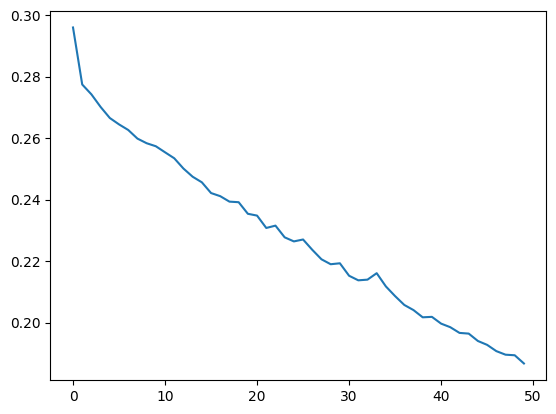

In [42]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

## Generate notes

To use the model to generate notes, you will first need to provide a starting sequence of notes. The function below generates one note from a sequence of notes. 

For note pitch, it draws a sample from the softmax distribution of notes produced by the model, and does not simply pick the note with the highest probability.
Always picking the note with the highest probability would lead to repetitive sequences of notes being generated.

The `temperature` parameter can be used to control the randomness of notes generated. You can find more details on temperature in [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation).

In [43]:
def predict_next_note(
    notes: np.ndarray, 
    model: tf.keras.Model, 
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']
 
  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

Now generate some notes. You can play around with temperature and the starting sequence in `next_notes` and see what happens.

In [44]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 435ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 42ms/step


In [45]:
generated_notes.head(10)

pitch      step  duration     start       end
0     47  0.062347  0.196192  0.062347  0.258539
1     80  0.131036  0.482011  0.193382  0.675394
2     84  0.122467  0.673442  0.315850  0.989292
3     84  0.128560  0.687731  0.444410  1.132141
4     89  0.147920  0.709013  0.592330  1.301342
5    101  0.167919  0.744889  0.760249  1.505138
6     92  0.151914  0.724595  0.912162  1.636757
7    104  0.162202  0.751651  1.074364  1.826016
8    101  0.160791  0.747137  1.235155  1.982291
9    104  0.164851  0.739460  1.400006  2.139466

In [46]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


You can also download the audio file by adding the two lines below:

```
from google.colab import files
files.download(out_file)
```

Visualize the generated notes.

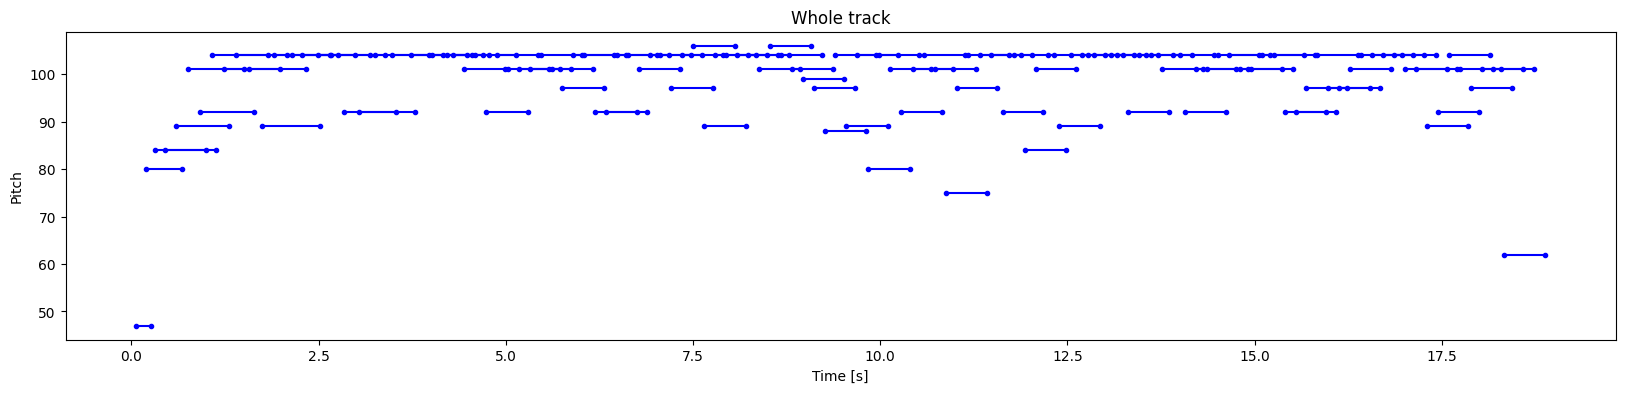

In [47]:
plot_piano_roll(generated_notes)

Check the distributions of `pitch`, `step` and `duration`.

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

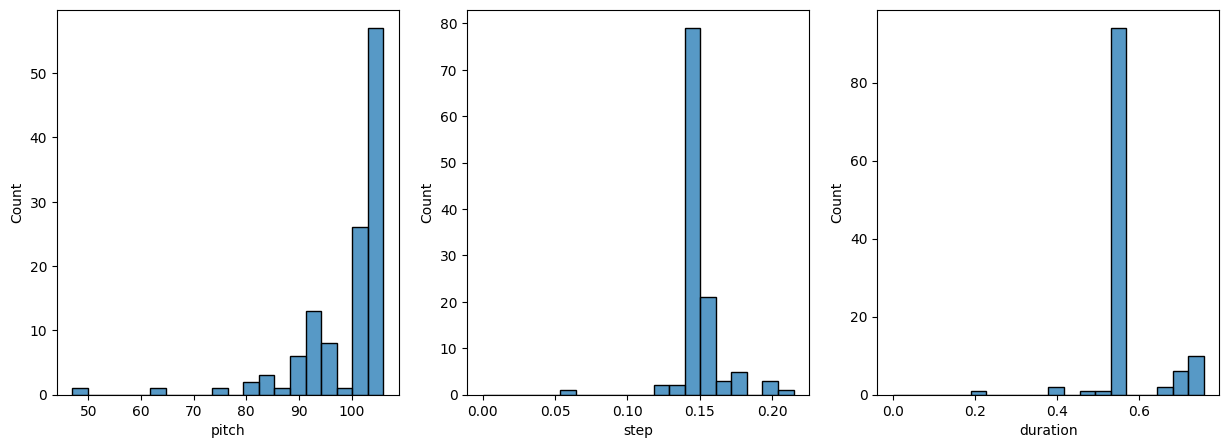

In [48]:
plot_distributions(generated_notes)

In the above plots, you will notice the change in distribution of the note variables.
Since there is a feedback loop between the model's outputs and inputs, the model tends to generate similar sequences of outputs to reduce the loss. 
This is particularly relevant for `step` and `duration`, which uses the MSE loss.
For `pitch`, you can increase the randomness by increasing the `temperature` in `predict_next_note`.


## Next steps

This tutorial demonstrated the mechanics of using an RNN to generate sequences of notes from a dataset of MIDI files. To learn more, you can visit the closely related [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial, which contains additional diagrams and explanations. 

One of the alternatives to using RNNs for music generation is using GANs. Rather than generating audio, a GAN-based approach can generate an entire sequence in parallel. The Magenta team has done impressive work on this approach with [GANSynth](https://magenta.tensorflow.org/gansynth). You can also find many wonderful music and art projects and open-source code on [Magenta project website](https://magenta.tensorflow.org/).